# Table of Contents
 <p><div class="lev1 toc-item"><a href="#All-simulations" data-toc-modified-id="All-simulations-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>All simulations</a></div><div class="lev2 toc-item"><a href="#A-few-examples" data-toc-modified-id="A-few-examples-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>A few examples</a></div><div class="lev2 toc-item"><a href="#now-do-all-of-them" data-toc-modified-id="now-do-all-of-them-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>now do all of them</a></div><div class="lev2 toc-item"><a href="#Distribution-of-fitted-hyperparameters" data-toc-modified-id="Distribution-of-fitted-hyperparameters-13"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Distribution of fitted hyperparameters</a></div><div class="lev1 toc-item"><a href="#Pushing-the-trend-into-the-kernel" data-toc-modified-id="Pushing-the-trend-into-the-kernel-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Pushing the trend into the kernel</a></div><div class="lev1 toc-item"><a href="#Other-simulations" data-toc-modified-id="Other-simulations-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Other simulations</a></div><div class="lev2 toc-item"><a href="#Quad" data-toc-modified-id="Quad-31"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Quad</a></div><div class="lev2 toc-item"><a href="#Cate-1" data-toc-modified-id="Cate-1-32"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Cate 1</a></div><div class="lev2 toc-item"><a href="#Cate-2" data-toc-modified-id="Cate-2-33"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Cate 2</a></div><div class="lev2 toc-item"><a href="#Cubic" data-toc-modified-id="Cubic-34"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Cubic</a></div><div class="lev2 toc-item"><a href="#Lee" data-toc-modified-id="Lee-35"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Lee</a></div><div class="lev2 toc-item"><a href="#Ludwig" data-toc-modified-id="Ludwig-36"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Ludwig</a></div><div class="lev2 toc-item"><a href="#Curvature" data-toc-modified-id="Curvature-37"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>Curvature</a></div><div class="lev1 toc-item"><a href="#Integrate-Squared-Exponential" data-toc-modified-id="Integrate-Squared-Exponential-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Integrate Squared Exponential</a></div>

In [1]:
using DataFrames
using GaussianProcesses
using Distributions
using GaussianProcesses: predict, get_params

using LaTeXStrings
import PyPlot; plt=PyPlot
plt.rc("figure", dpi=300.0)
# plt.rc("figure", figsize=(6,4))
# plt.rc("figure", autolayout=true)
plt.rc("savefig", dpi=300.0)
plt.rc("text", usetex=true)
plt.rc("font", family="serif")
plt.rc("font", serif="Palatino")
;

In [2]:
include("src/GeoRDD.jl")

GeoRDD

In [3]:
_simdata=readtable("saved_simData/lee_5.csv", header=true, names=[:i,:x,:y]);

In [4]:
lee_left(x::Real) = 0.48 + 1.27 * x + 7.18*x^2 + 20.21*x^3 + 21.54*x^4 + 7.33*x^5
lee_right(x::Real) = 0.52 + 0.84 * x - 3.00*x^2 + 7.99*x^3  - 9.01*x^4 + 3.56*x^5
lee_truth(x::Real) = x<zero(x) ? lee_left(x) : lee_right(x)

lee_truth (generic function with 1 method)

In [5]:
xx=linspace(-1.0,1.0,1000);

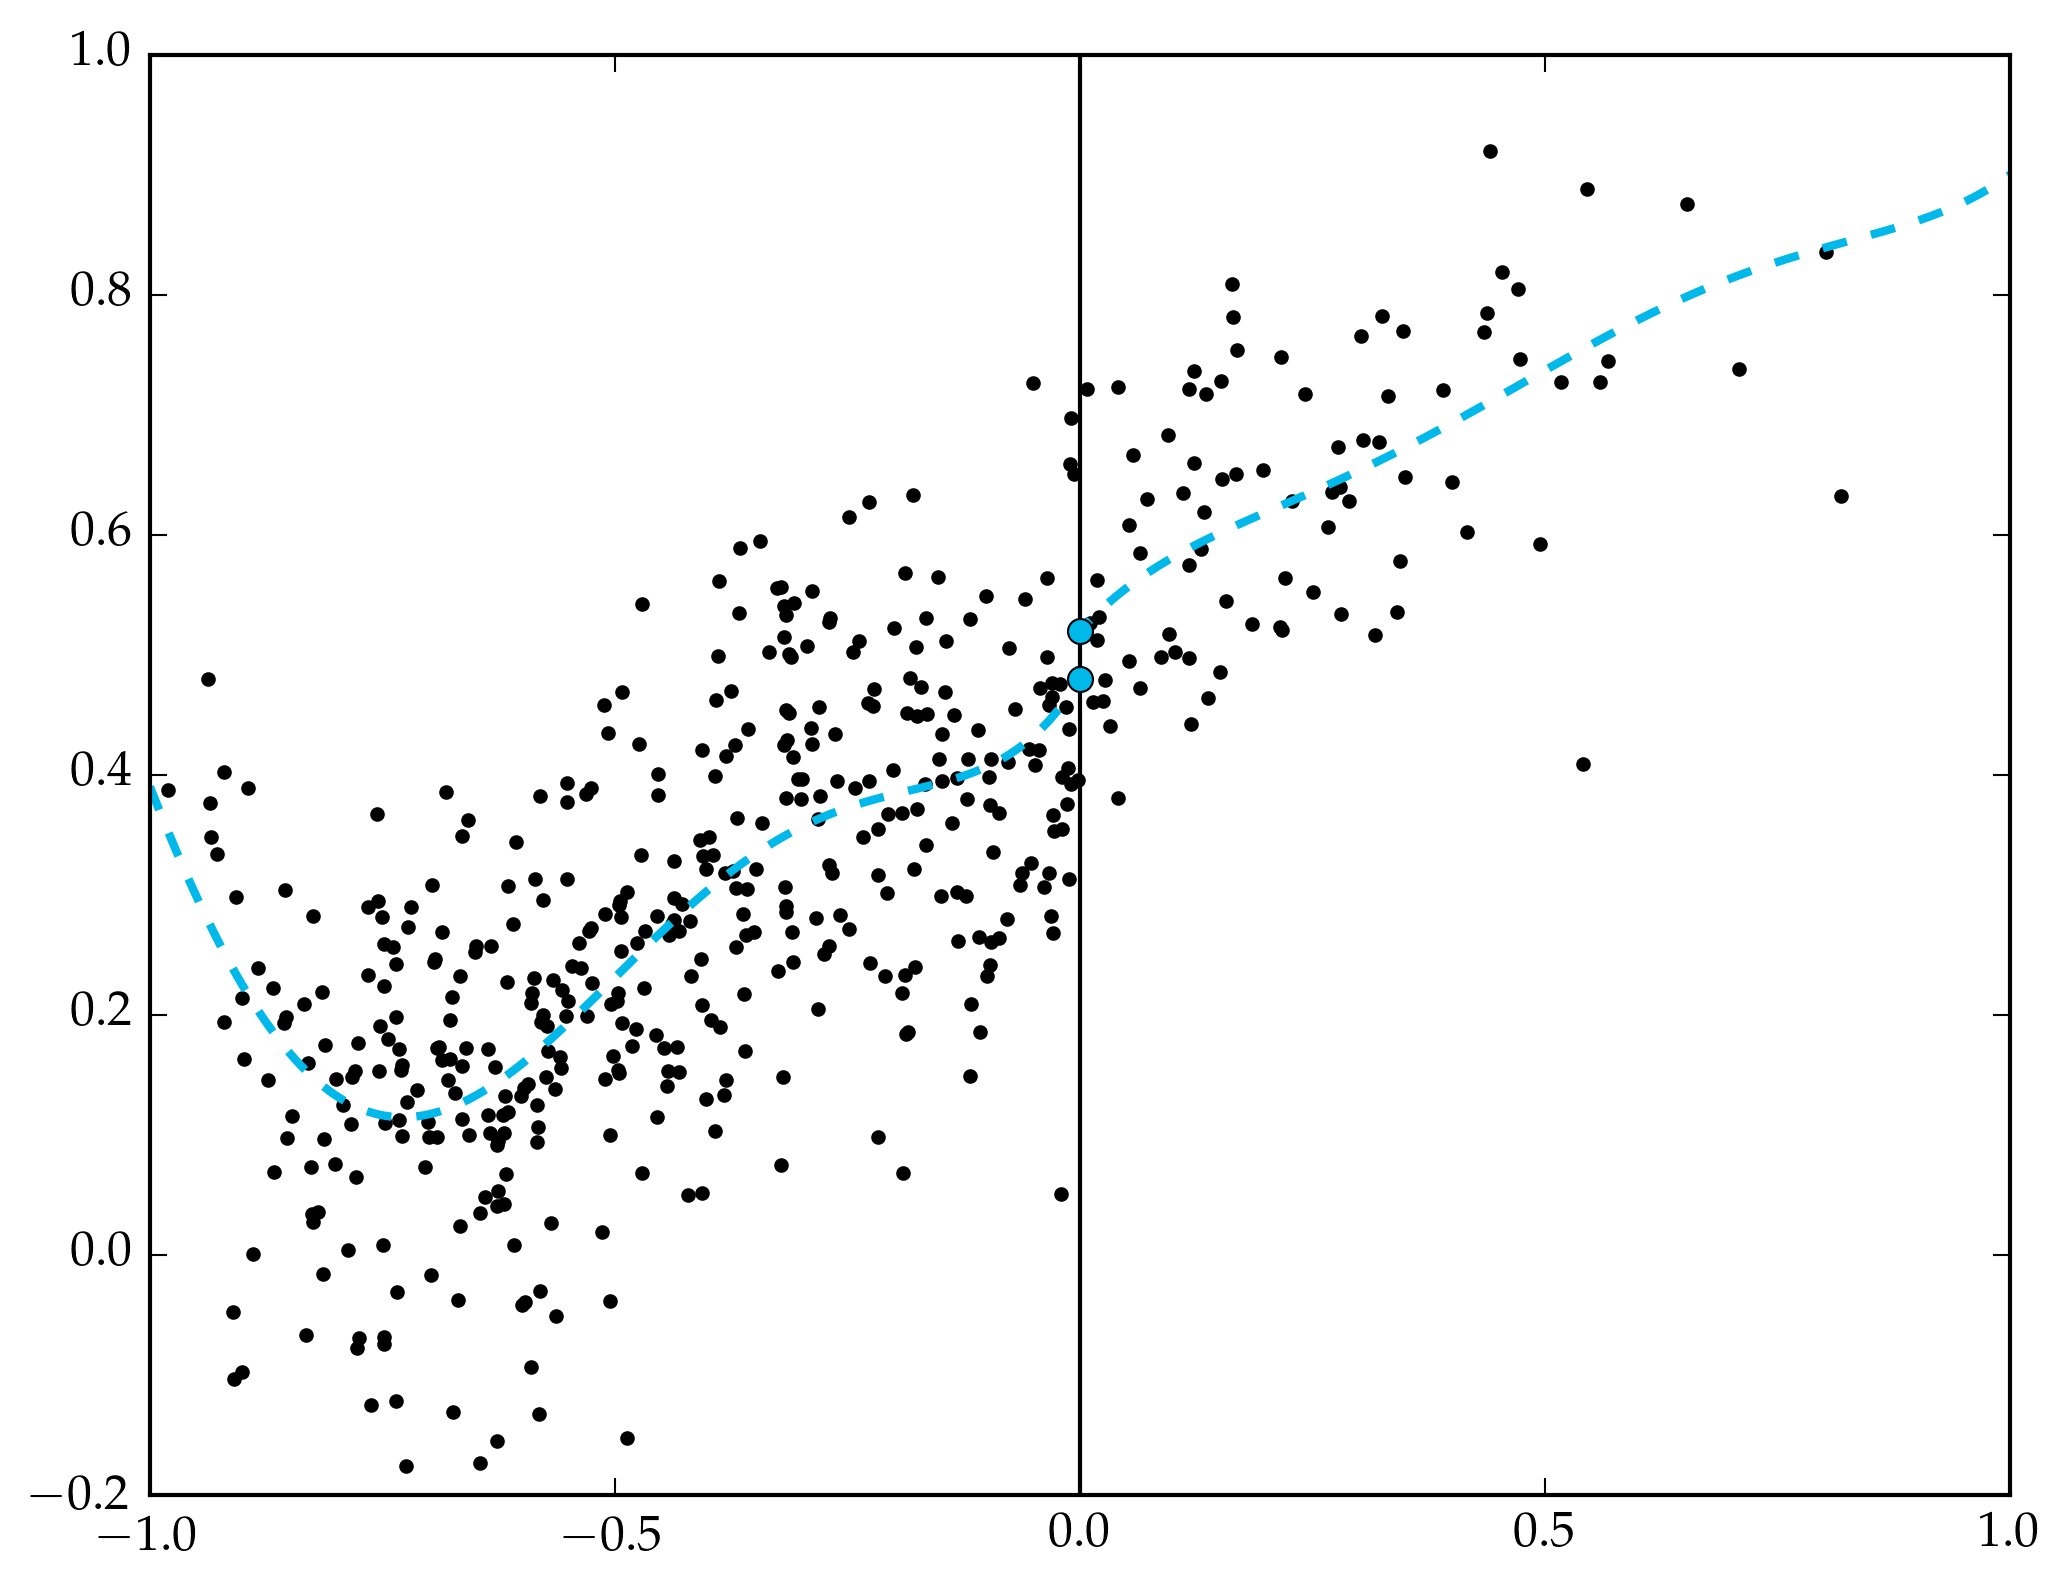

In [6]:
plt.plot(_simdata[:x].values, _simdata[:y].values, ".", color="black", label="simulated data")
plt.plot(xx, lee_truth.(xx), "--", color="#00B8EA", linewidth=2, label="truth")
plt.axvline(0.0, color="black")
plt.plot(0.0, lee_left(0.0), "o", color="#00B8EA")
plt.plot(0.0, lee_right(0.0), "o", color="#00B8EA")
;

In [7]:
_kern = SEIso(-3.0, -3.0)
_meanf1 = MeanLin([0.0])+MeanConst(0.0)
_meanf2 = MeanLin([0.0])+MeanConst(0.0)
_X = _simdata[:x].values'
_right= vec(_X) .> 0.0
_Y = _simdata[:y].values
_gp_right=GP(_X[:,_right],  _Y[_right],  _meanf1, _kern, 0.0)
_gp_left =GP(_X[:,!_right], _Y[!_right], _meanf2, _kern, 0.0)

GP object:
  Dim = 1
  Number of observations = 416
  Mean function:
    Type: GaussianProcesses.SumMean
      Type: GaussianProcesses.MeanLin, Params: [0.0]
      Type: GaussianProcesses.MeanConst, Params: [0.0]
  Kernel:
    Type: GaussianProcesses.SEIso, Params: [-3.0,-3.0]
  Input observations = 
[-0.980896 -0.937369 … -0.00681883 -0.00217726]
  Output observations = [0.386936,0.479321,0.376609,0.348104,0.334052,0.194024,0.401803,-0.0481022,-0.103552,0.298374  …  0.456425,0.375832,0.405334,0.438114,0.313108,0.658657,0.392569,0.696798,0.650467,0.395658]
  Variance of observation noise = 1.0
  Marginal Log-Likelihood = -401.407

In [8]:
_gp_left.k.σ2

0.0024787521766663585

In [9]:
_gp_left.k.ℓ2

0.0024787521766663585

In [10]:
_both_gps = GeoRDD.GPRealisations([_gp_right, _gp_left]);

In [11]:
using Calculus
using GaussianProcesses: update_mll_and_dmll!

In [12]:
update_mll_and_dmll!(_both_gps);

In [13]:
func=GeoRDD.get_optim_target(_both_gps)

Optim.OnceDifferentiable(GeoRDD.mll,GeoRDD.dmll!,GeoRDD.mll_and_dmll!)

In [14]:
Calculus.gradient(func.f, get_params(_both_gps))

7-element Array{Float64,1}:
 432.726  
 -13.6949 
 -51.1353 
  34.3727 
 -97.5952 
  -2.22474
  -3.68622

In [15]:
-_both_gps.dmLL

7-element Array{Float64,1}:
 432.726  
 -13.6949 
 -51.1353 
  34.3727 
 -97.5952 
  -2.22474
  -3.68622

In [16]:
_both_gps.k

Type: GaussianProcesses.SEIso, Params: [-3.0,-3.00002]


In [17]:
optimize!(_both_gps)

7-element Array{Float64,1}:
 -2.08703 
  0.301099
  0.559017
  0.313679
  0.419875
 -2.70297 
 -3.10195 

In [18]:
τtrue = lee_right(0.0)-lee_left(0.0)

0.040000000000000036

In [19]:
_τposterior2D=GeoRDD.cliff_face(_gp_right, _gp_left, zeros(1,1))
_μpost  = _τposterior2D[1][1]
_σ2post = _τposterior2D[2].mat[1]
_τposterior = Normal(_μpost, √_σ2post)

Distributions.Normal{Float64}(μ=0.10652198561965914, σ=0.03876490796726742)

In [20]:
quantile(_τposterior, 0.025) < τtrue < quantile(_τposterior, 0.975)

true

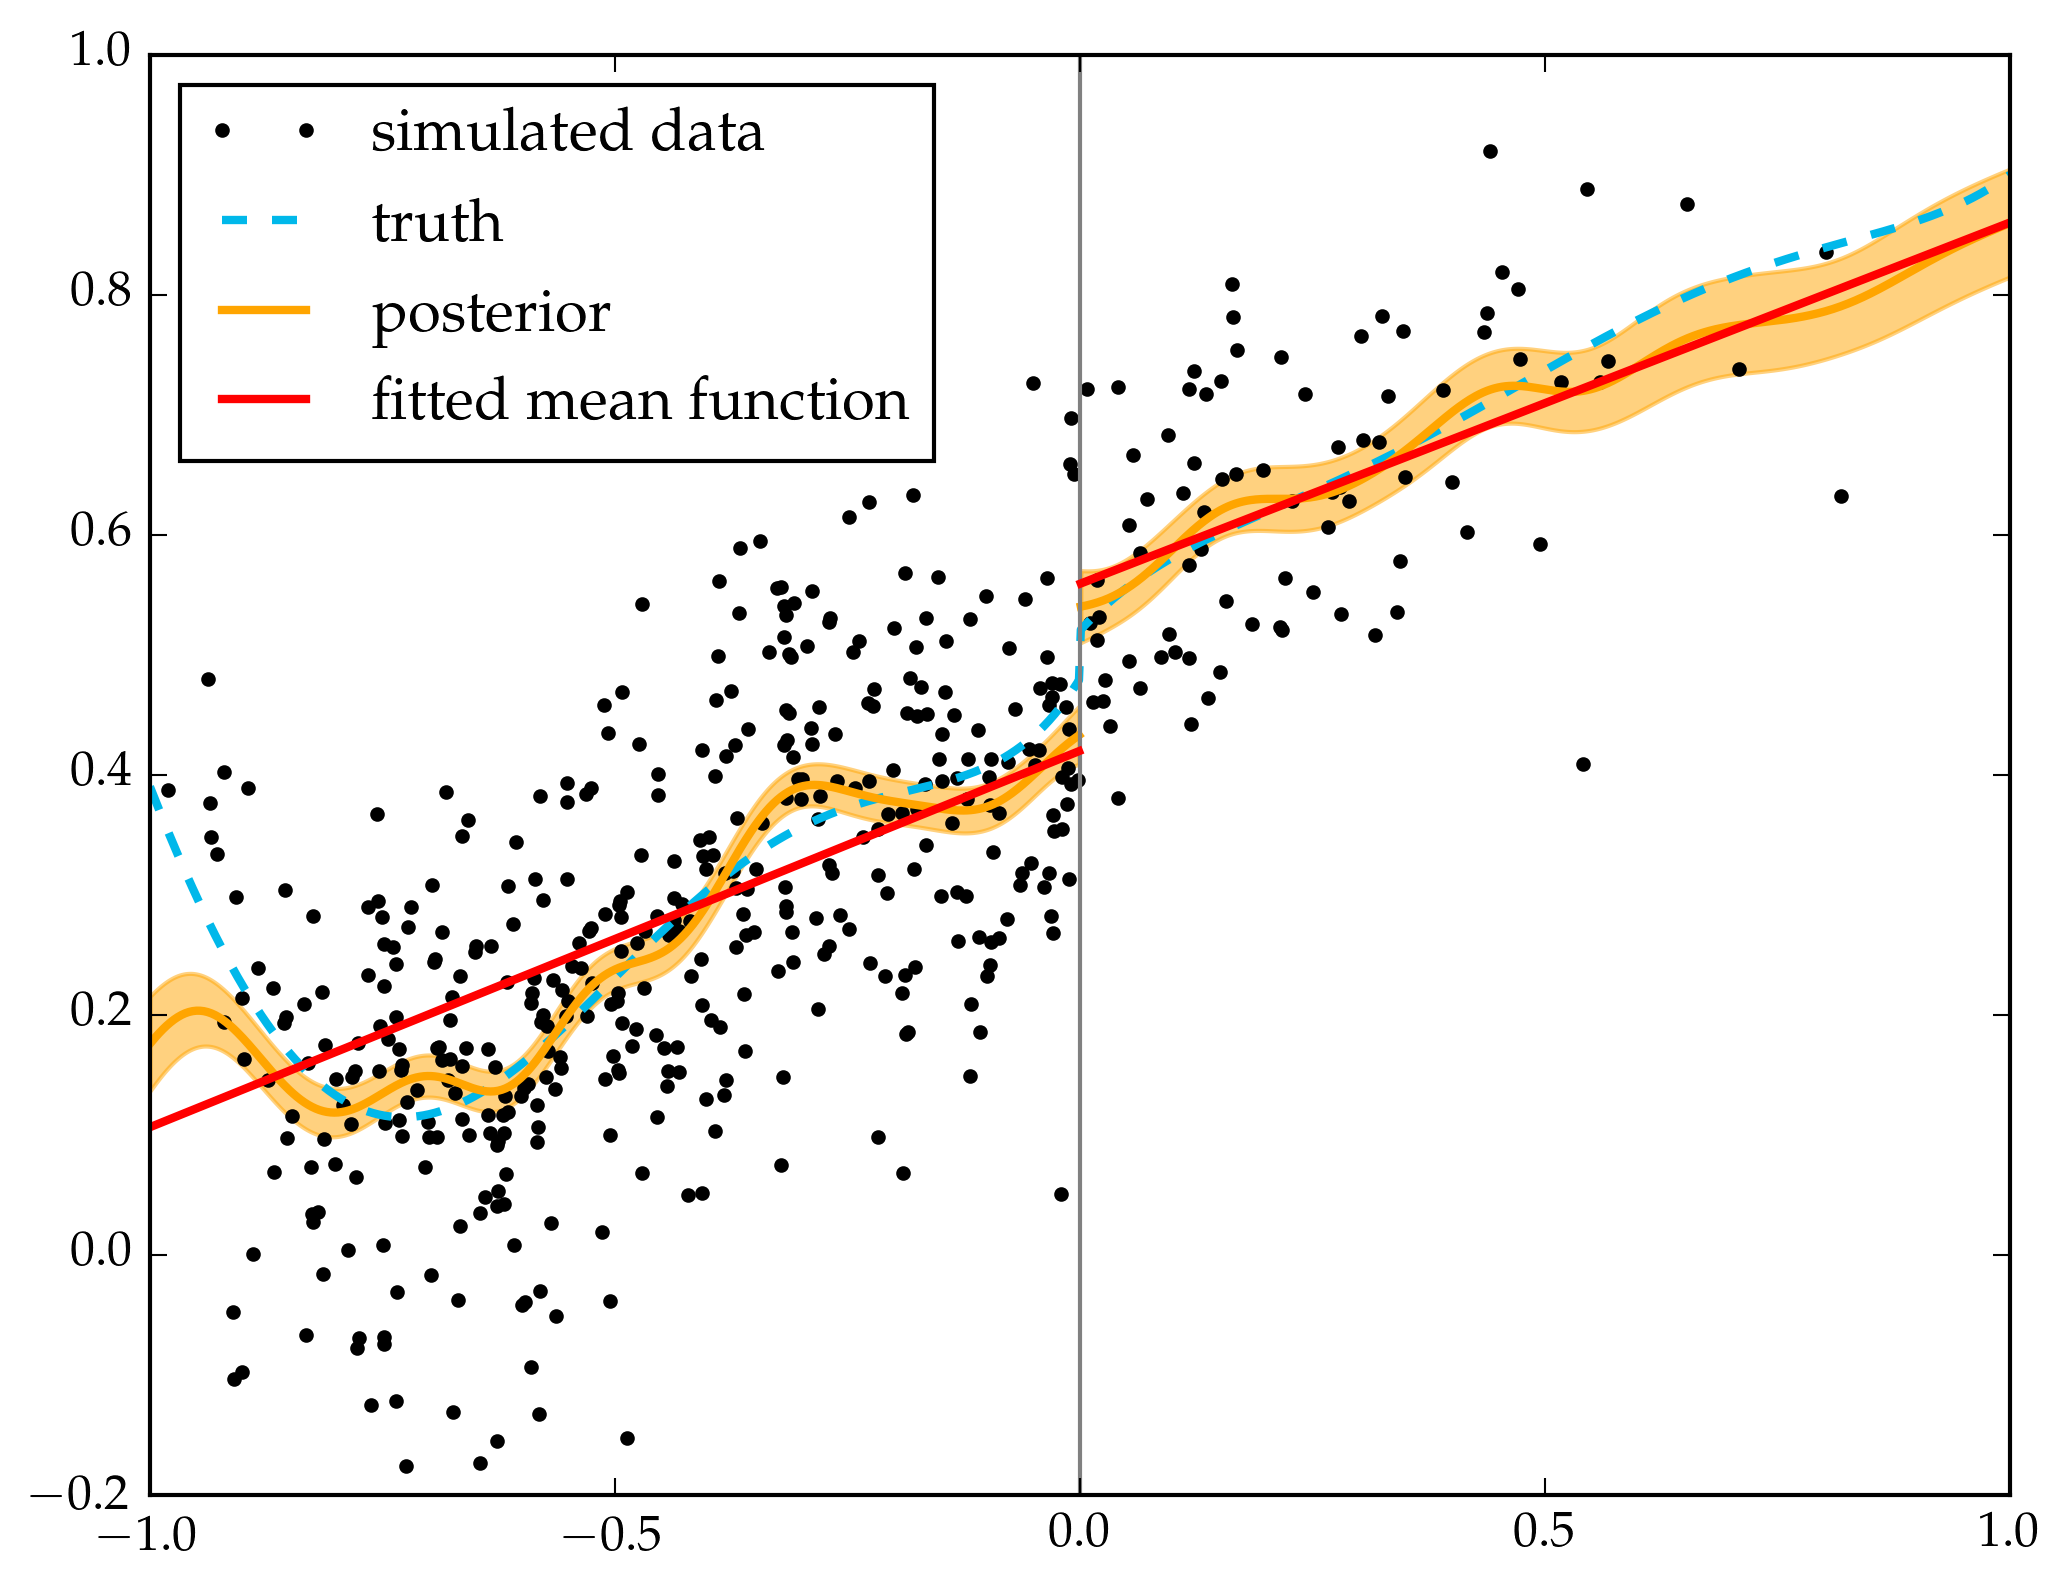

In [29]:
begin
    xx_left = xx[xx.<0]
    xx_right = xx[xx.>0]
    pred_left = predict(_gp_left, xx_left'; full_cov=false)
    pred_right = predict(_gp_right, xx_right'; full_cov=false)
    linear_left = mean(_gp_left.m, xx_left')
    linear_right = mean(_gp_right.m, xx_right')
    
    plt.plot(_simdata[:x].values, _simdata[:y].values, ".", color="black", label="simulated data")
    plt.plot(xx, lee_truth.(xx), "--", color="#00B8EA", linewidth=2, label="truth")
    plt.plot(xx_left, pred_left[1], 
        color="orange", linewidth=2, label="posterior")
    plt.fill_between(xx_left, pred_left[1].-√pred_left[2], pred_left[1].+√pred_left[2], 
        color="orange", alpha=0.5)
    plt.plot(xx_right, pred_right[1], color="orange", linewidth=2)
    plt.fill_between(xx_right, pred_right[1].-√pred_right[2], pred_right[1].+√pred_right[2], 
        color="orange", alpha=0.5)
    plt.axvline(0.0, color="grey")
    plt.plot(xx_left, linear_left, color="red", linestyle="-", linewidth=2, label="fitted mean function")
    plt.plot(xx_right, linear_right, color="red", linestyle="-", linewidth=2)
    plt.legend(loc="upper left")
end;

# All simulations

In [20]:
function fit_2GP(x::Vector, y::Vector, thresh::Real)
    # specify kernel and mean function
    kern = SEIso(-3.0, -3.0)
    right = x .> thresh
    meanf_l = MeanLin([0.0])+MeanConst(mean(y[!right]))
    meanf_r = MeanLin([0.0])+MeanConst(mean(y[right]))
    
    # create GPs for left and right
    gp_left  = GP(x[!right]', y[!right], meanf_l, kern, -3.0)
    gp_right = GP(x[right]',  y[right],  meanf_r, kern, -3.0)
    both_gps = GeoRDD.GPRealisations([gp_left, gp_right])
    
    # optimize hyperparameters
    optimize!(both_gps)
    return both_gps
end

fit_2GP (generic function with 1 method)

In [21]:
function get_τpost(gp_left::GP, gp_right::GP, thresh::Real)
    τposterior2D=GeoRDD.cliff_face(gp_left, gp_right, thresh*ones(1,1))
    μpost = τposterior2D[1][1]
    σ2post = τposterior2D[2].mat[1]
    τposterior = Normal(μpost, √σ2post)
    return τposterior
end
function get_τpost_2GP(x::Vector, y::Vector, thresh::Real)
    both_gps = fit_2GP(x,y,thresh)
    gp_left, gp_right = both_gps.reals
    # get treatment effect estimate at the boundary
    τposterior = get_τpost(gp_left, gp_right, thresh)
    return τposterior
end

get_τpost_2GP (generic function with 1 method)

In [22]:
type Fitted2GP
    τpost::Normal
    hyp::Vector{Float64}
end
    
function do_sim(sim::String, isim::Int, thresh::Real)
    simdata=readtable(@sprintf("saved_simData/%s_%d.csv", sim, isim), header=true, names=[:i,:x,:y]);
    both_gps = fit_2GP(simdata[:x].values, simdata[:y].values, thresh)
    gp_left, gp_right = both_gps.reals
    τpost = get_τpost(gp_left, gp_right, thresh)
    return Fitted2GP(τpost, get_params(both_gps))
end

do_sim (generic function with 1 method)

In [23]:
@time do_sim("lee", 1, 0.0)

  0.558098 seconds (347.40 k allocations: 23.255 MB, 1.16% gc time)


Fitted2GP(Distributions.Normal{Float64}(μ=0.034670986031473894, σ=0.029392136348423942),[-1.99828,0.380769,0.458251,0.440749,0.509505,-2.30349,-3.54551])

In [24]:
function plot_sim(sim::String, isim::Int, thresh::Real, truth::Function)
    simdata=readtable(@sprintf("saved_simData/%s_%d.csv", sim, isim), header=true, names=[:i,:x,:y]);
    x = simdata[:x].values
    y = simdata[:y].values
    both_gps = fit_2GP(x, y, thresh)
    gp_left, gp_right = both_gps.reals
    τpost = get_τpost(gp_left, gp_right, thresh)
    xx=linspace(-1.0,1.0,1000)
    xx_left = xx[xx.<thresh]
    xx_right = xx[xx.>thresh]
    pred_left = predict(gp_left, xx_left'; full_cov=false)
    pred_right = predict(gp_right, xx_right'; full_cov=false)
    τtrue = truth(thresh+1e-10)-truth(thresh-1e-10)

    plt.plot(x, y, ".", color="black", label="simulated data")
    plt.plot(xx, truth.(xx), "--", color="#00B8EA", linewidth=2, label="truth")
    plt.plot(xx_left, pred_left[1], 
        color="orange", linewidth=2, label="posterior")
    plt.fill_between(xx_left, pred_left[1].-2.0*√pred_left[2], pred_left[1].+2.0*√pred_left[2], 
        color="orange", alpha=0.5)
    plt.plot(xx_right, pred_right[1], color="orange", linewidth=2)
    plt.fill_between(xx_right, pred_right[1].-2.0*√pred_right[2], pred_right[1].+2.0*√pred_right[2], 
        color="orange", alpha=0.5)
    plt.plot(0.0, truth(thresh-1e-10), "o", color="#00B8EA")
    plt.plot(0.0, truth(thresh+1e-10), "o", color="#00B8EA")    
    plt.axvline(0.0, color="grey")
    plt.legend(loc="upper left")
    plt.text(0.2, 0.0, latexstring(@sprintf("\$\\tau \\mid Y \\sim \\mathcal{N}(%.3f,\\sigma=%.3f)\$", mean(τpost), std(τpost))))
    cover = quantile(τpost, 0.025) < τtrue < quantile(τpost, 0.975)
    plt.text(0.2, 0.1, @sprintf("covers? %s", cover ? "yes" : "no"))
end

plot_sim (generic function with 1 method)

## A few examples

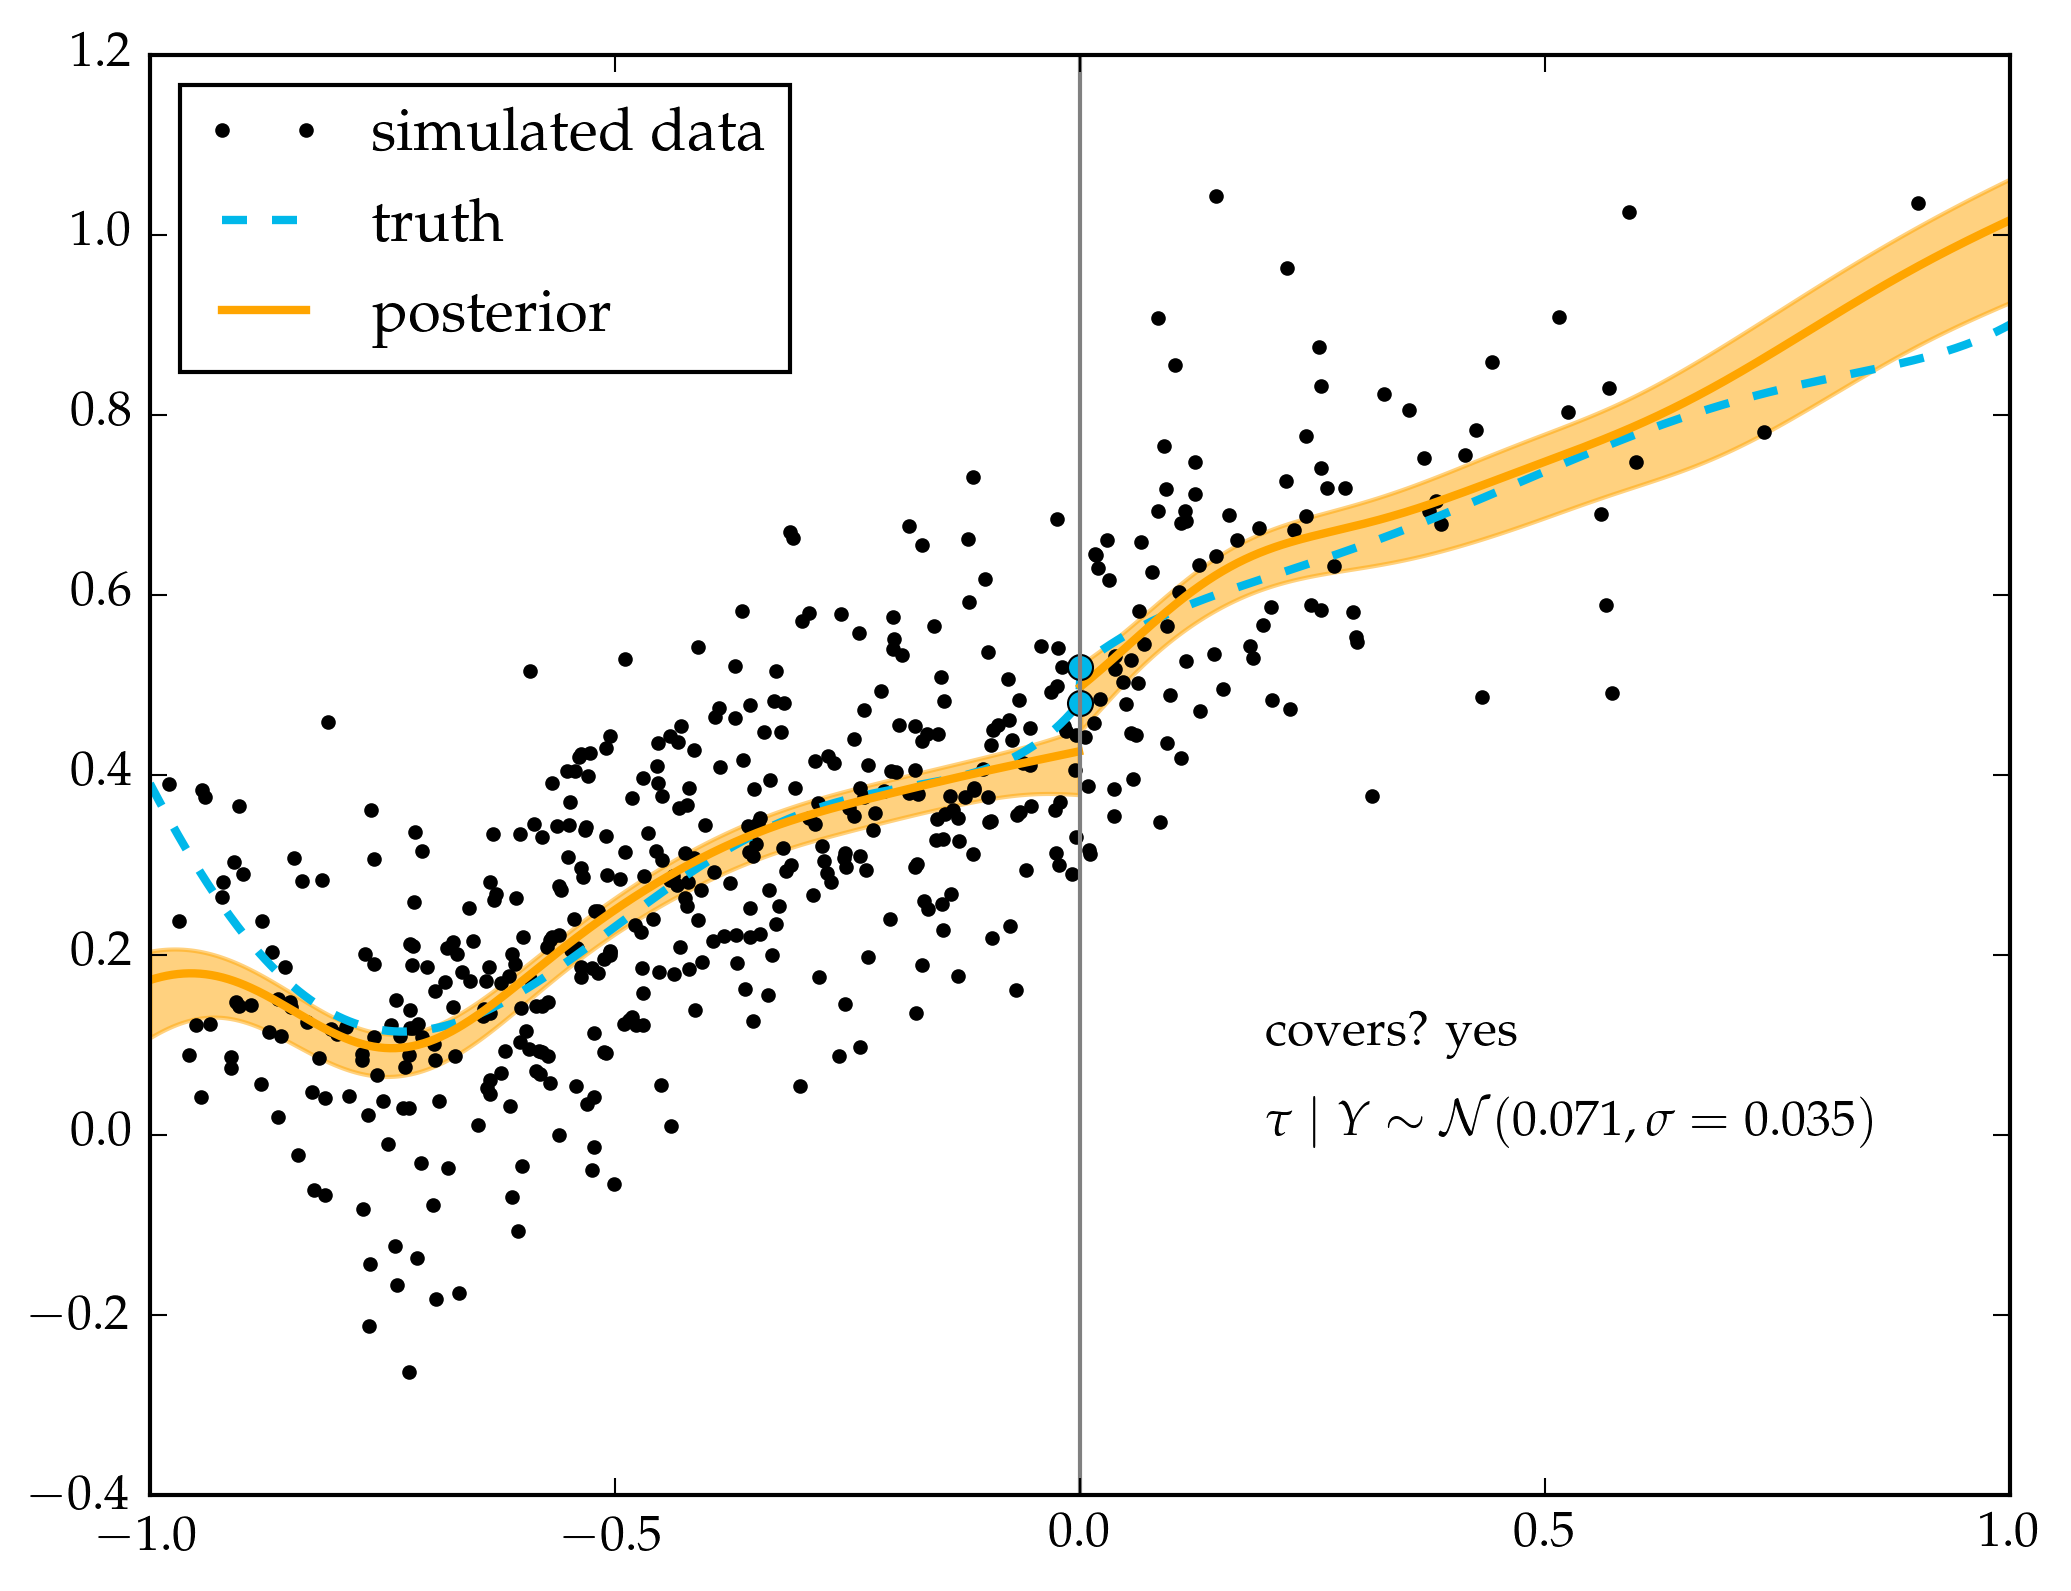

PyObject <matplotlib.text.Text object at 0x326d9b990>

In [25]:
plot_sim("lee", 3, 0.0, lee_truth)

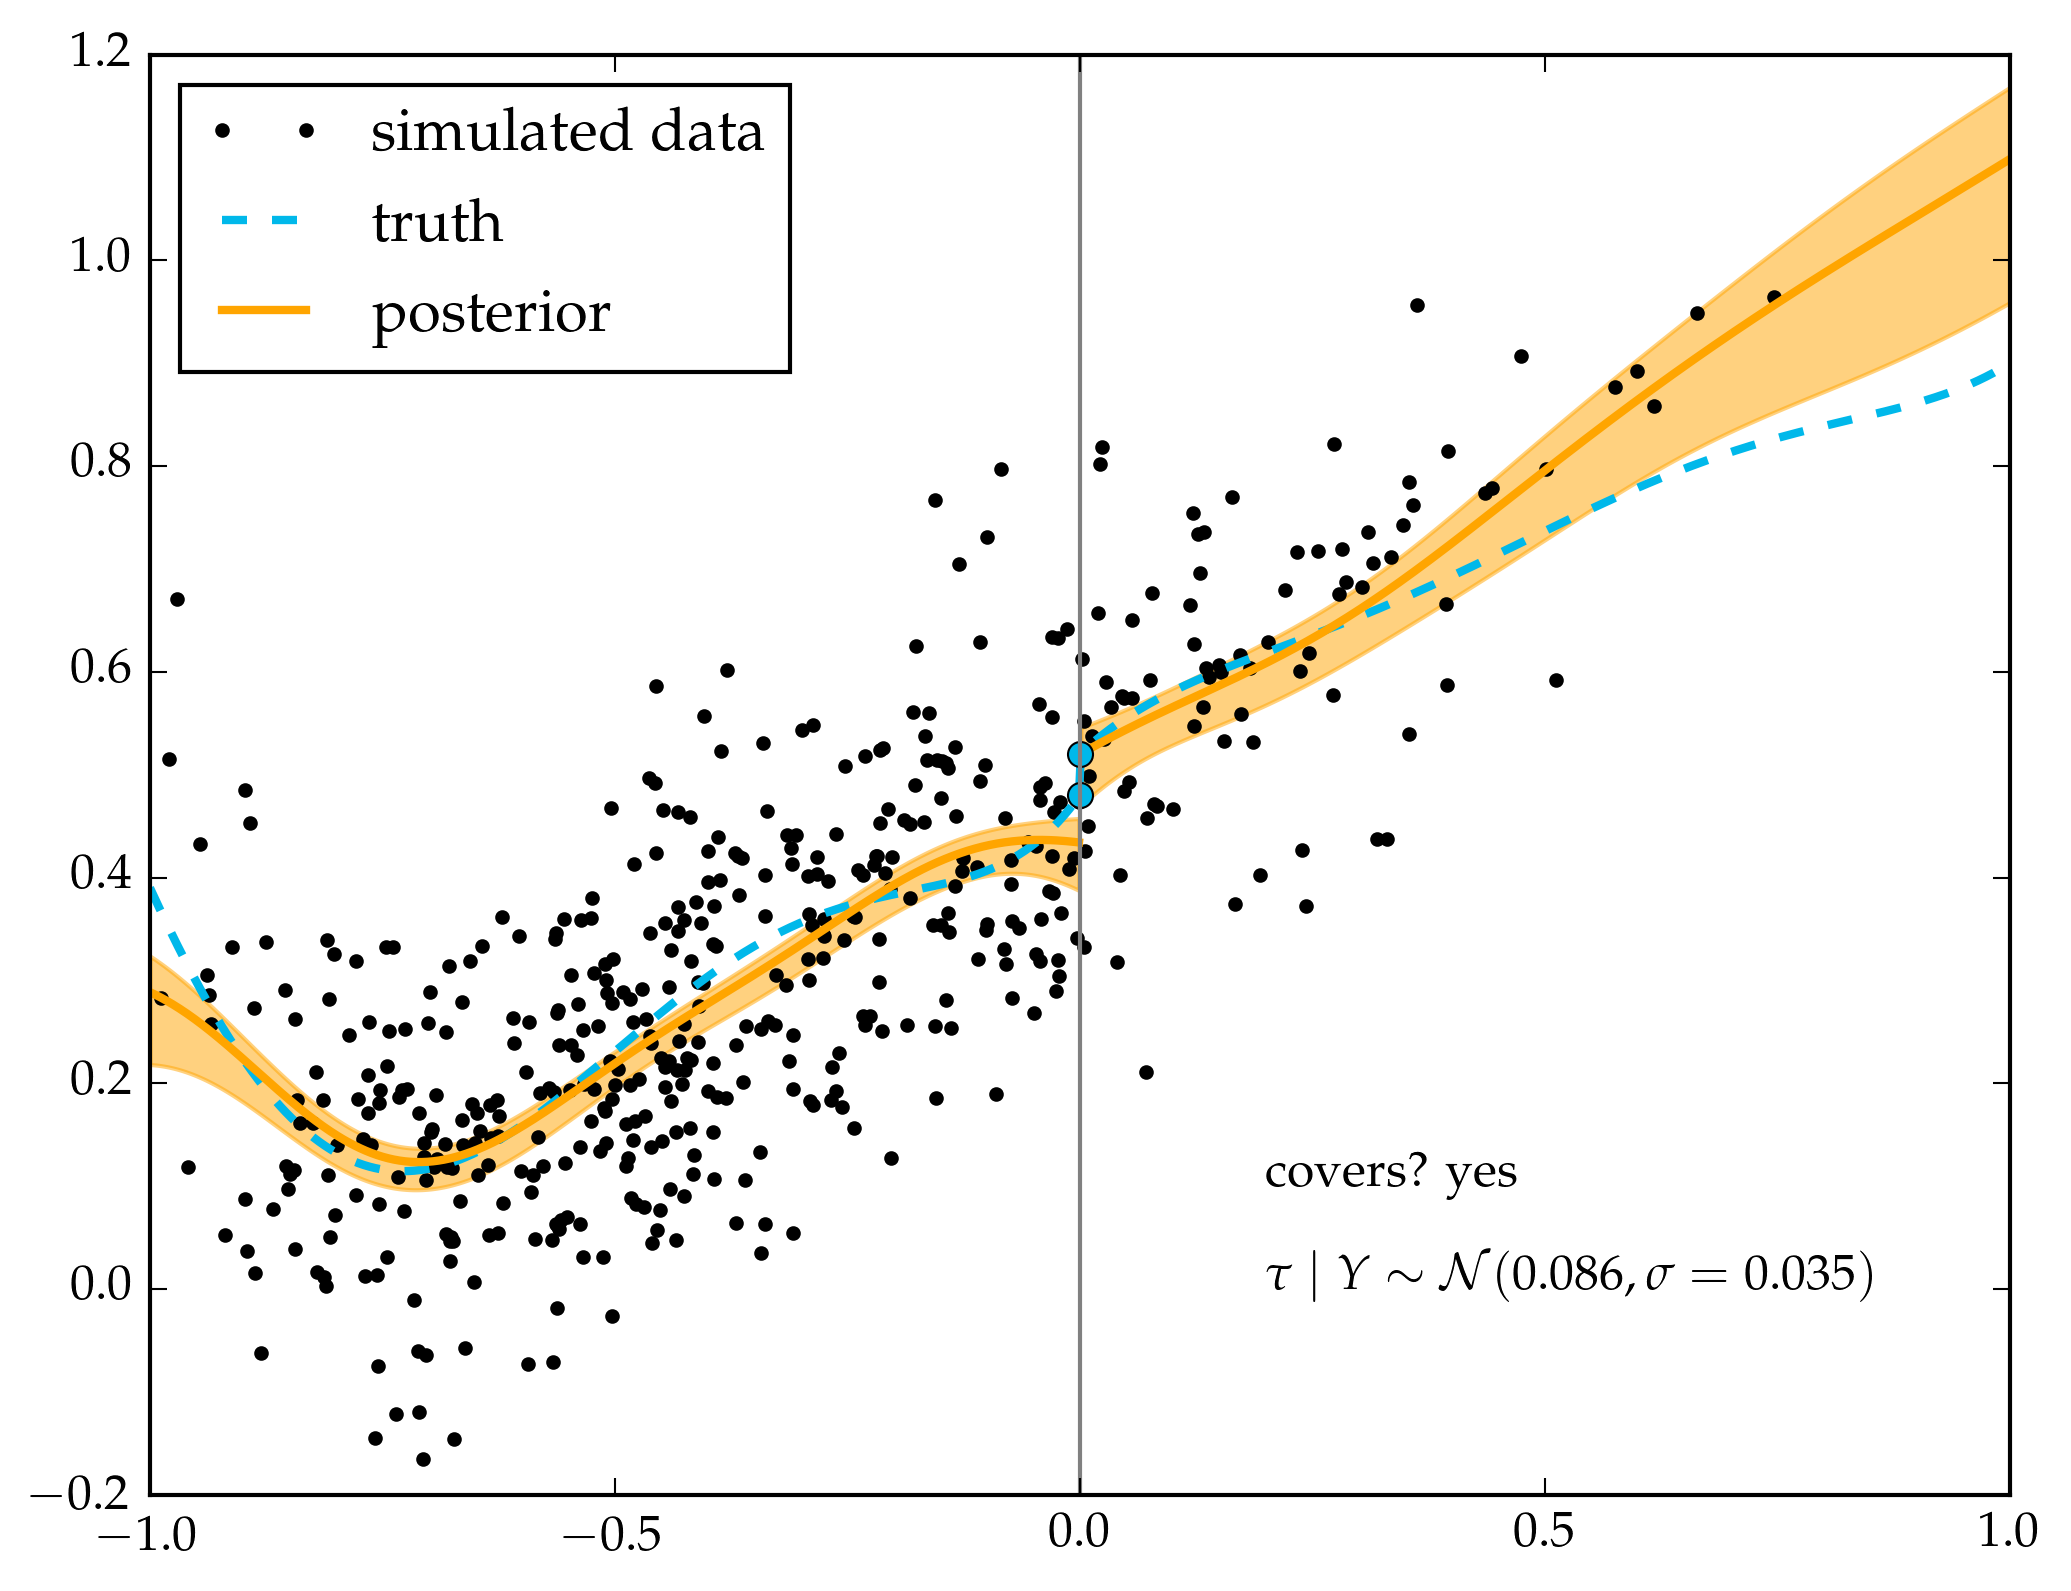

  likely near /Users/imolk/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /Users/imolk/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /Users/imolk/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /Users/imolk/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /Users/imolk/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /Users/imolk/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /Users/imolk/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /Users/imolk/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /Users/imolk/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /Users/imolk/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /Users/imolk/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /Users/imolk/.julia/v0.5/IJulia/src/kernel.jl:31
  likely near /Users/imolk/.julia/v0.5/IJulia/src/kernel.jl:31
in show at /Users/imolk/.julia/v0.5/PyCall/src/PyCall.jl
  likely near /Users/imolk/.julia/v0.5/IJulia/src/kernel.jl:31
in show at /Users/imolk/.julia/v0.5/PyCall/src/PyCall.jl
  li

PyObject <matplotlib.text.Text object at 0x327222690>

In [26]:
plot_sim("lee", 4, 0.0, lee_truth)

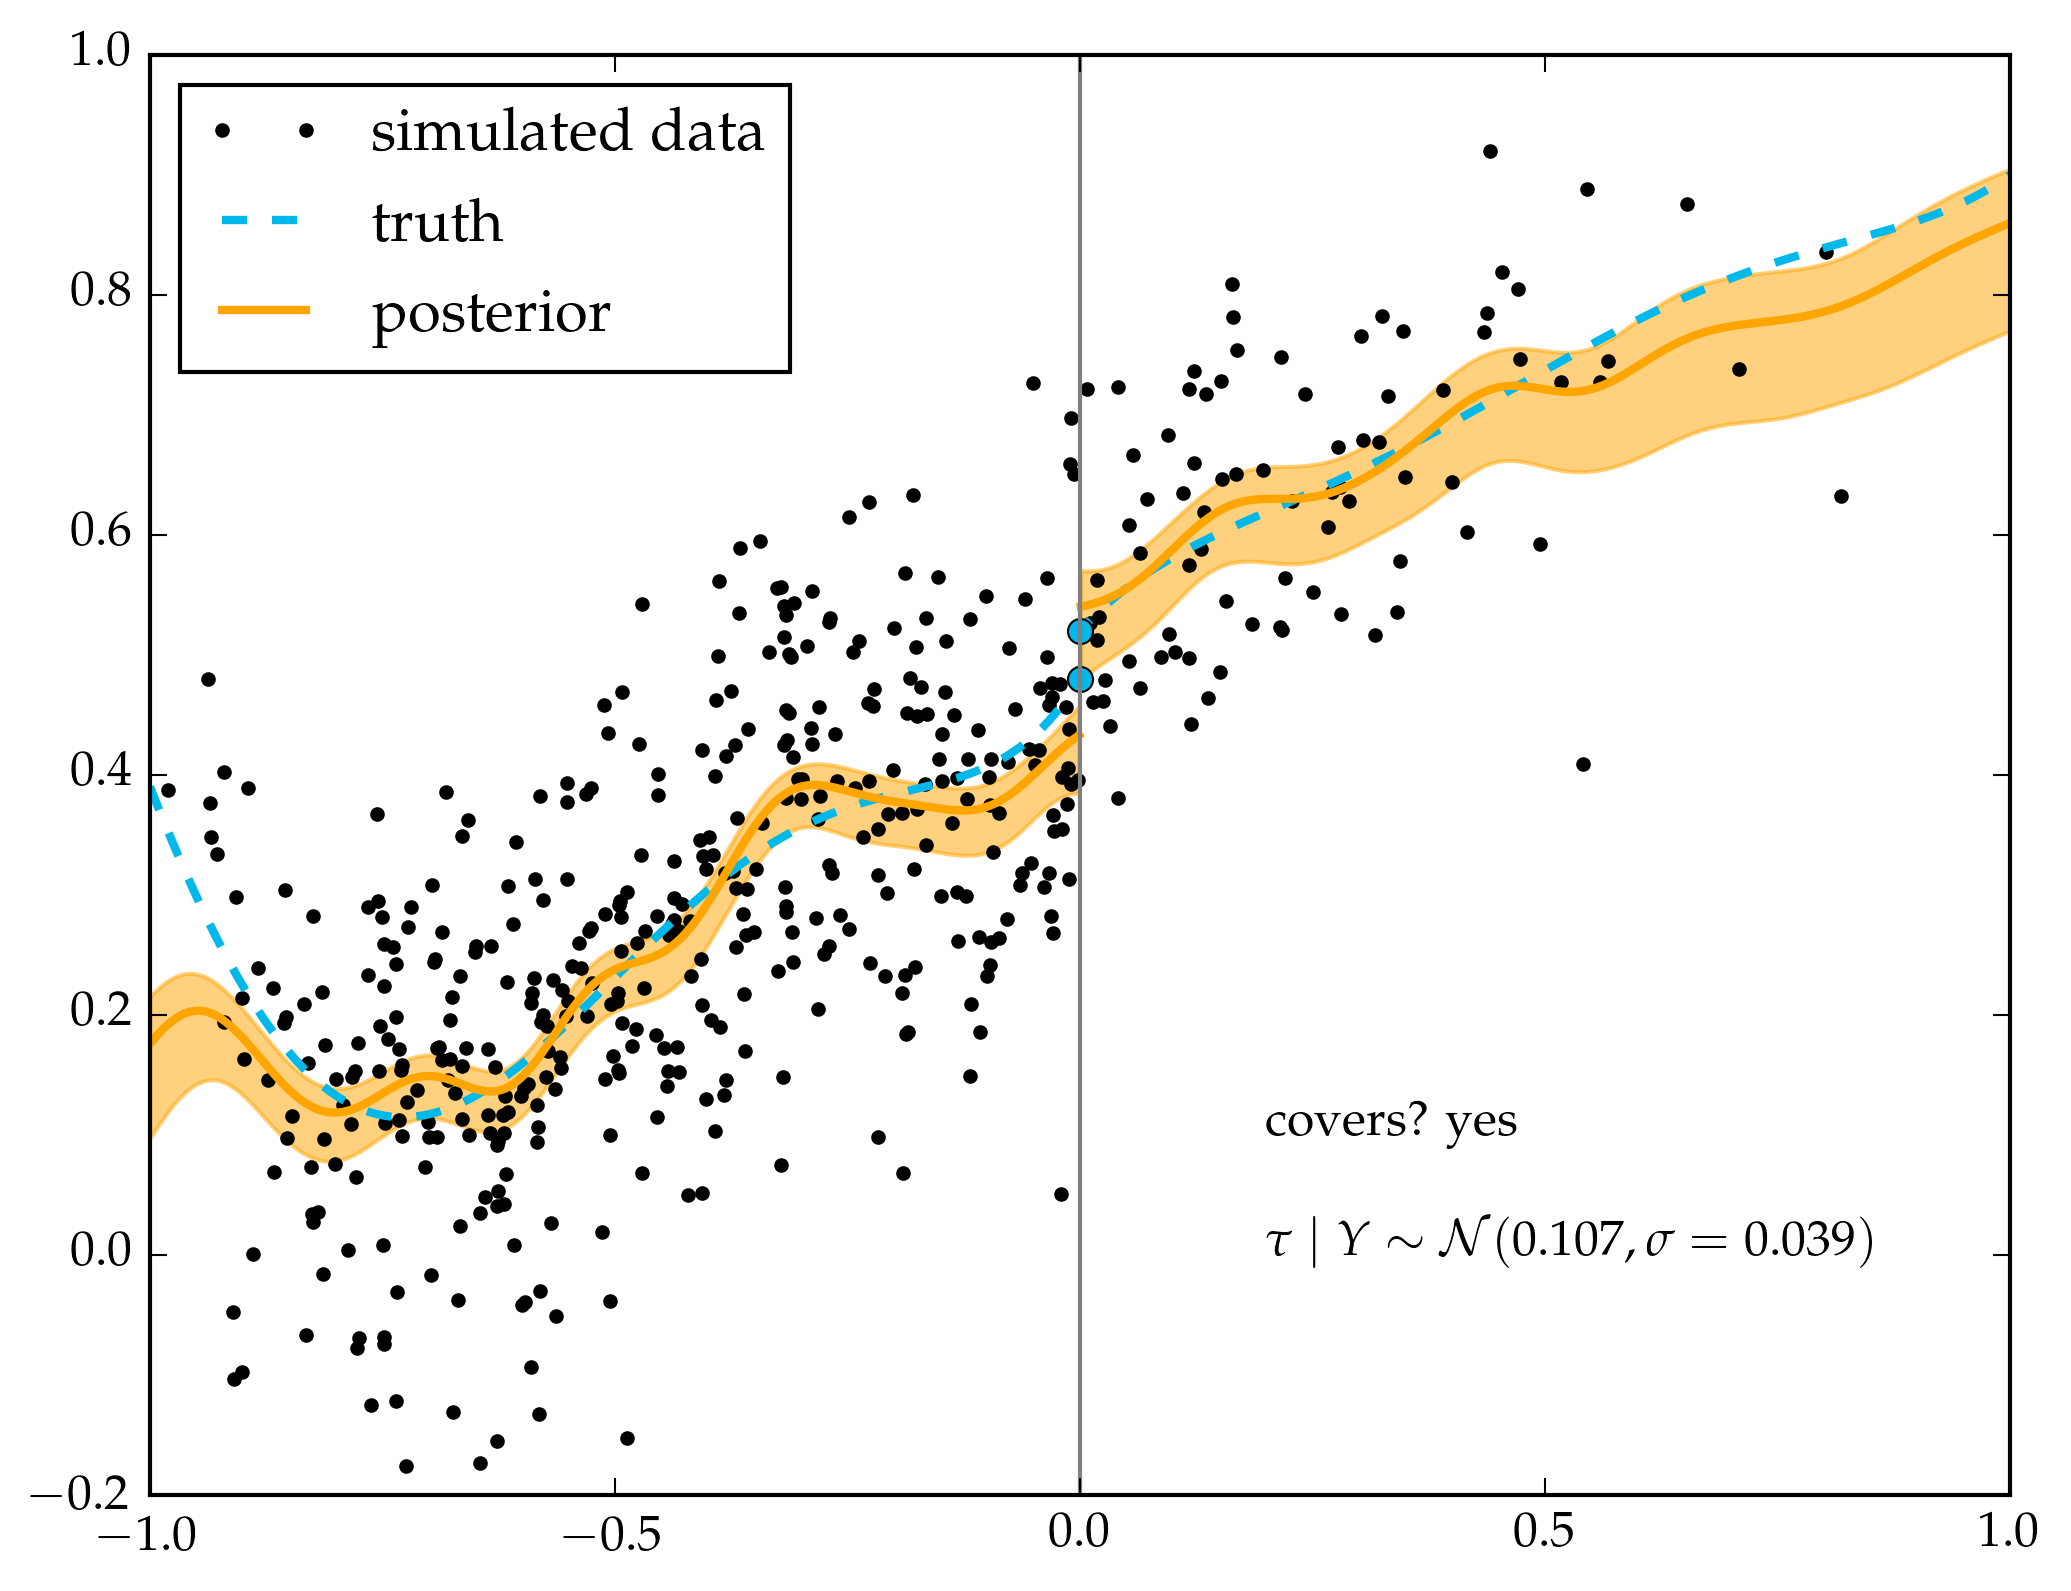

PyObject <matplotlib.text.Text object at 0x329172750>

In [27]:
plot_sim("lee", 5, 0.0, lee_truth)

## now do all of them

In [35]:
nsims = 10
τtrue = lee_right(0.0)-lee_left(0.0)
lee_biases=Array(Float64, nsims)
lee_covers=Array(Bool, nsims)
lee_τpost = Array(Normal, nsims)
lee_hyps = Array(Float64, 8, nsims)
for isim in 1:nsims
    sim_result = do_sim("lee", isim, 0.0)
    τpost = sim_result.τpost
    cover = quantile(τpost, 0.025) < τtrue < quantile(τpost, 0.975)
    bias = mean(τpost)-τtrue
    
    lee_biases[isim] = bias
    lee_covers[isim] = cover
    lee_τpost[isim] = τpost
    lee_hyps[:,isim] = sim_result.hyp
end

In [36]:
_τpost = do_sim("lee", 5, 0.0).τpost
print(_τpost)
quantile(_τpost, 0.025) < τtrue < quantile(_τpost, 0.975)

Distributions.Normal{Float64}(μ=0.10652220018659264, σ=0.03876486006619328)

true

In [37]:
@printf("bias=%.3f", mean(lee_biases))

bias=0.037

In [38]:
@printf("RMSE=%.3f", √( mean(lee_biases.^2) ))

RMSE=0.044

In [39]:
@printf("%.1f%% coverage", mean(lee_covers)*100) # coverage

100.0% coverage

In [40]:
get_τpost_2GP(_simdata[:x].values, _simdata[:y].values, 0.0)

Distributions.Normal{Float64}(μ=0.10652220018659264, σ=0.03876486006619328)

## Distribution of fitted hyperparameters

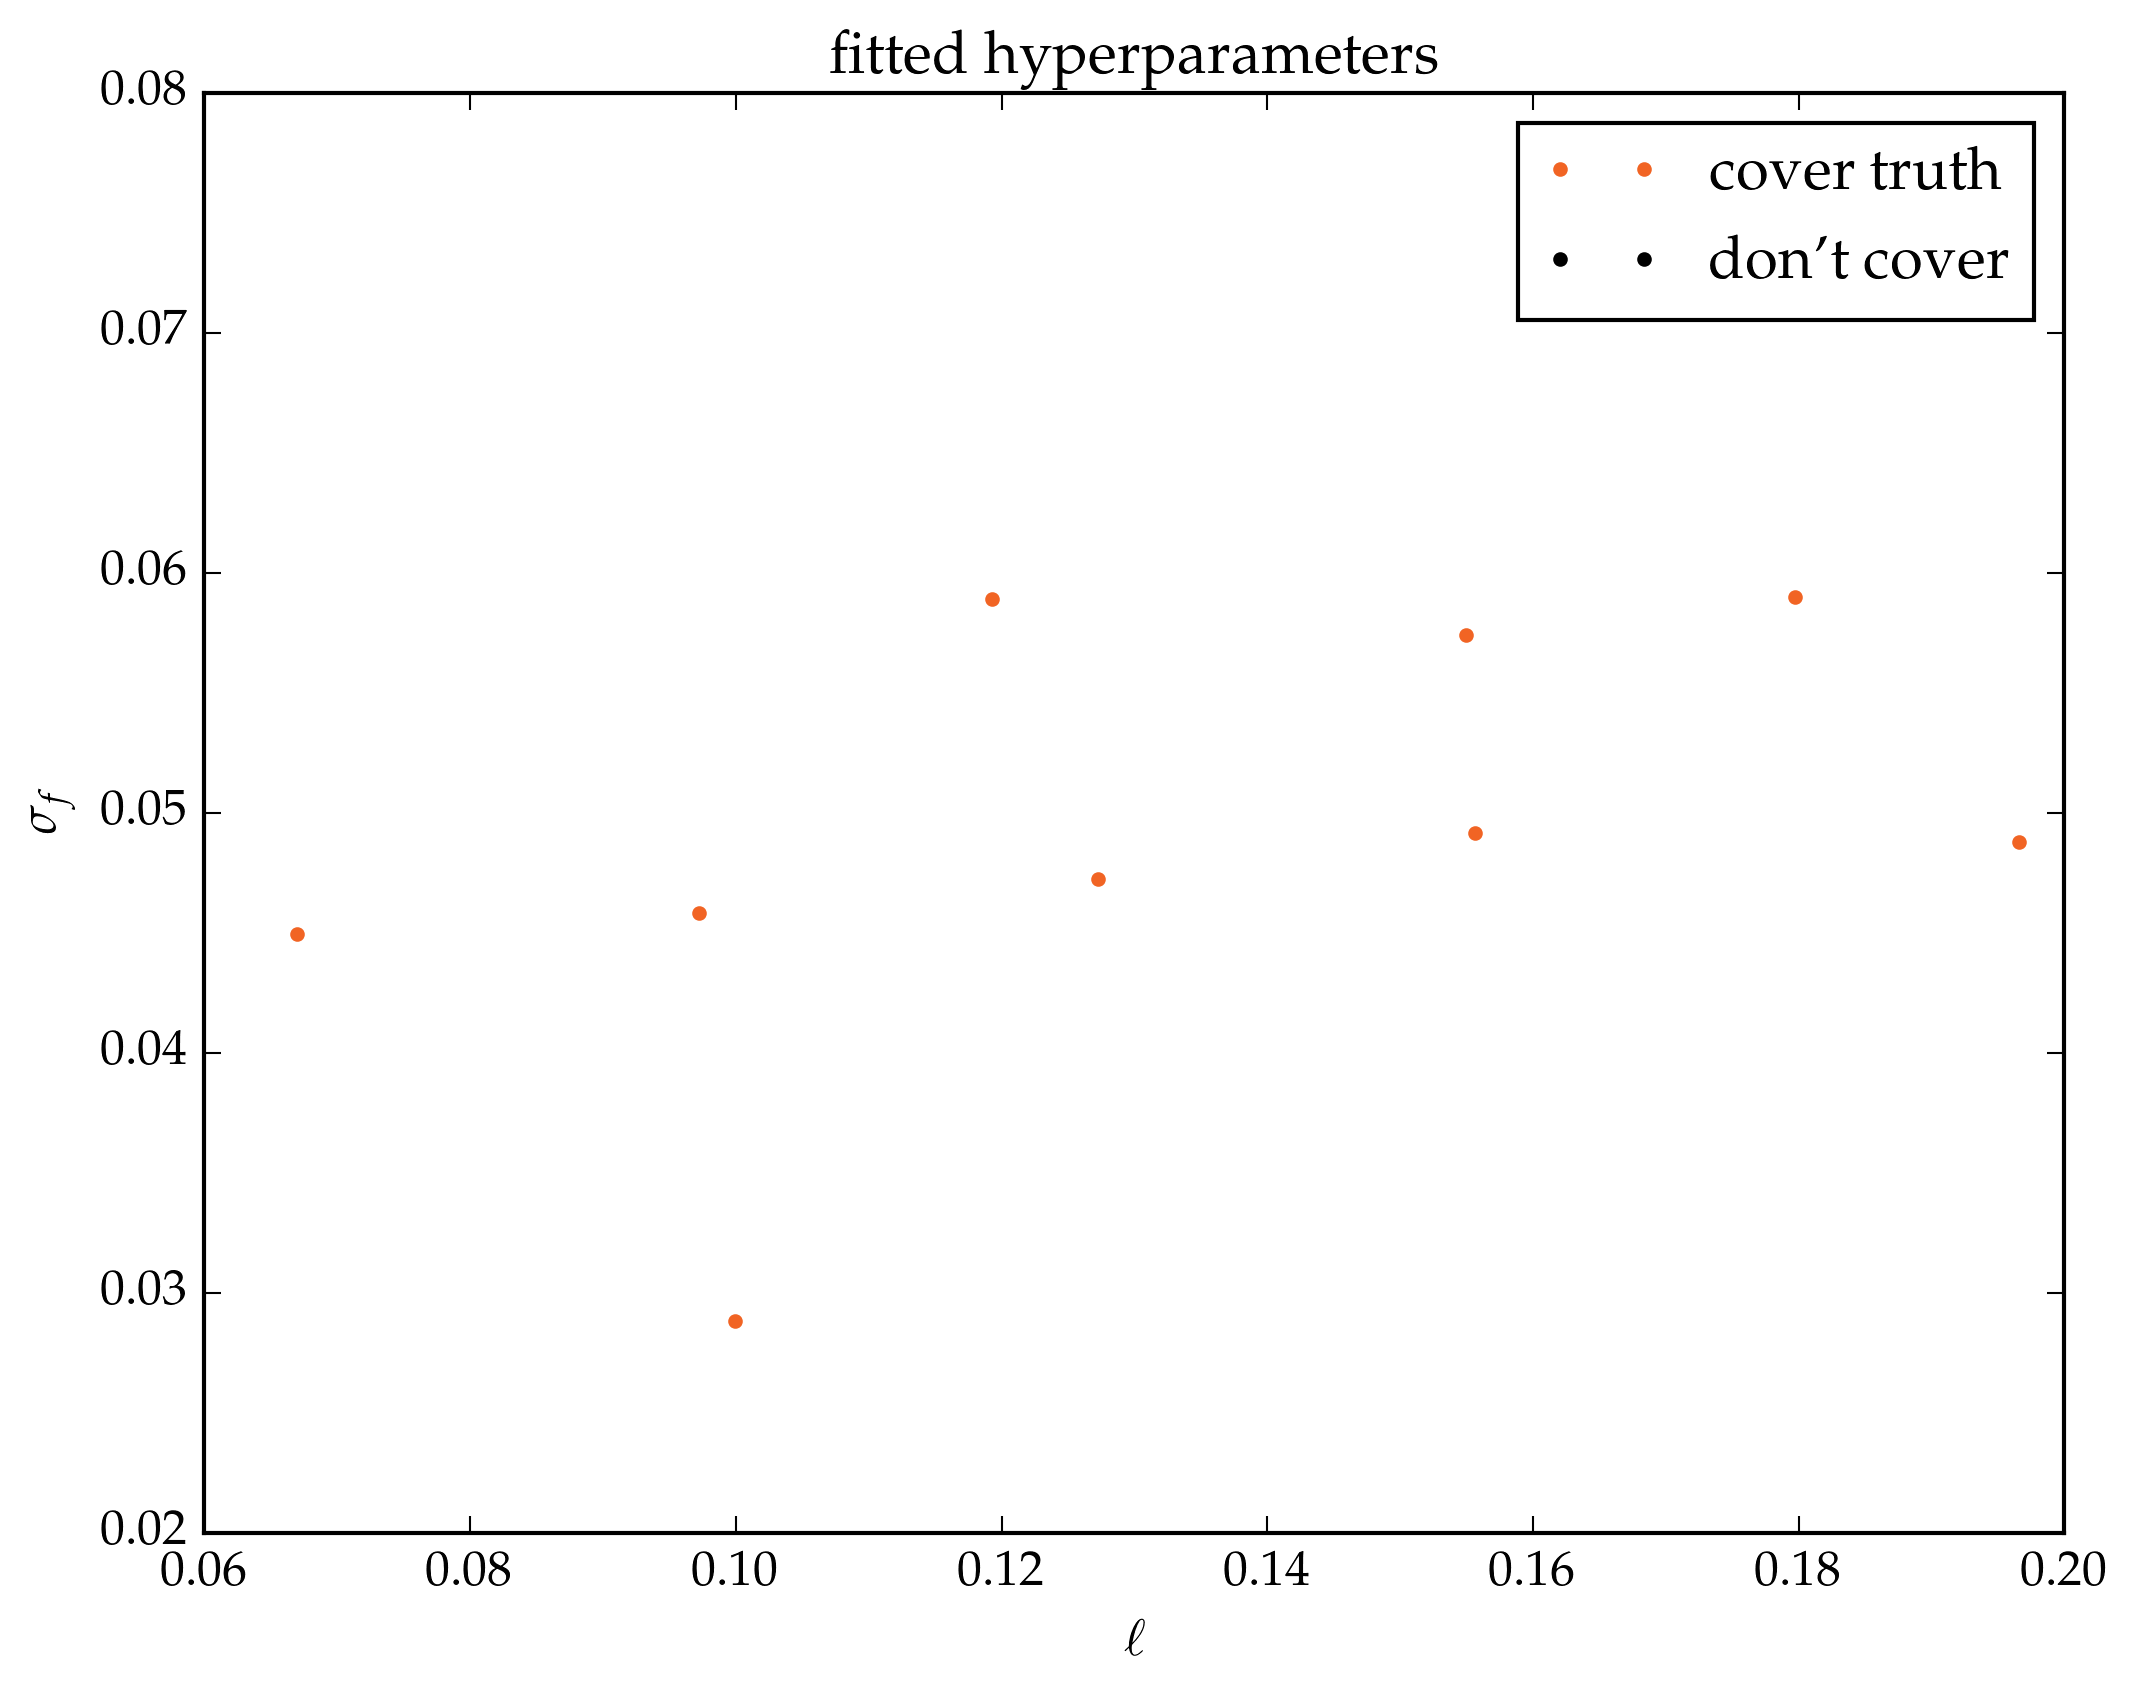

PyObject <matplotlib.legend.Legend object at 0x30fcae610>

In [34]:
plt.plot(exp(lee_hyps[end-1,lee_covers]),  exp(lee_hyps[end,lee_covers]),  ".", color="#F16424", label="cover truth")
plt.plot(exp(lee_hyps[end-1,!lee_covers]), exp(lee_hyps[end,!lee_covers]), ".", color="black",   label="don't cover")
plt.xlabel(L"$\ell$")
plt.ylabel(L"$\sigma_f$")
plt.title("fitted hyperparameters")
plt.legend()

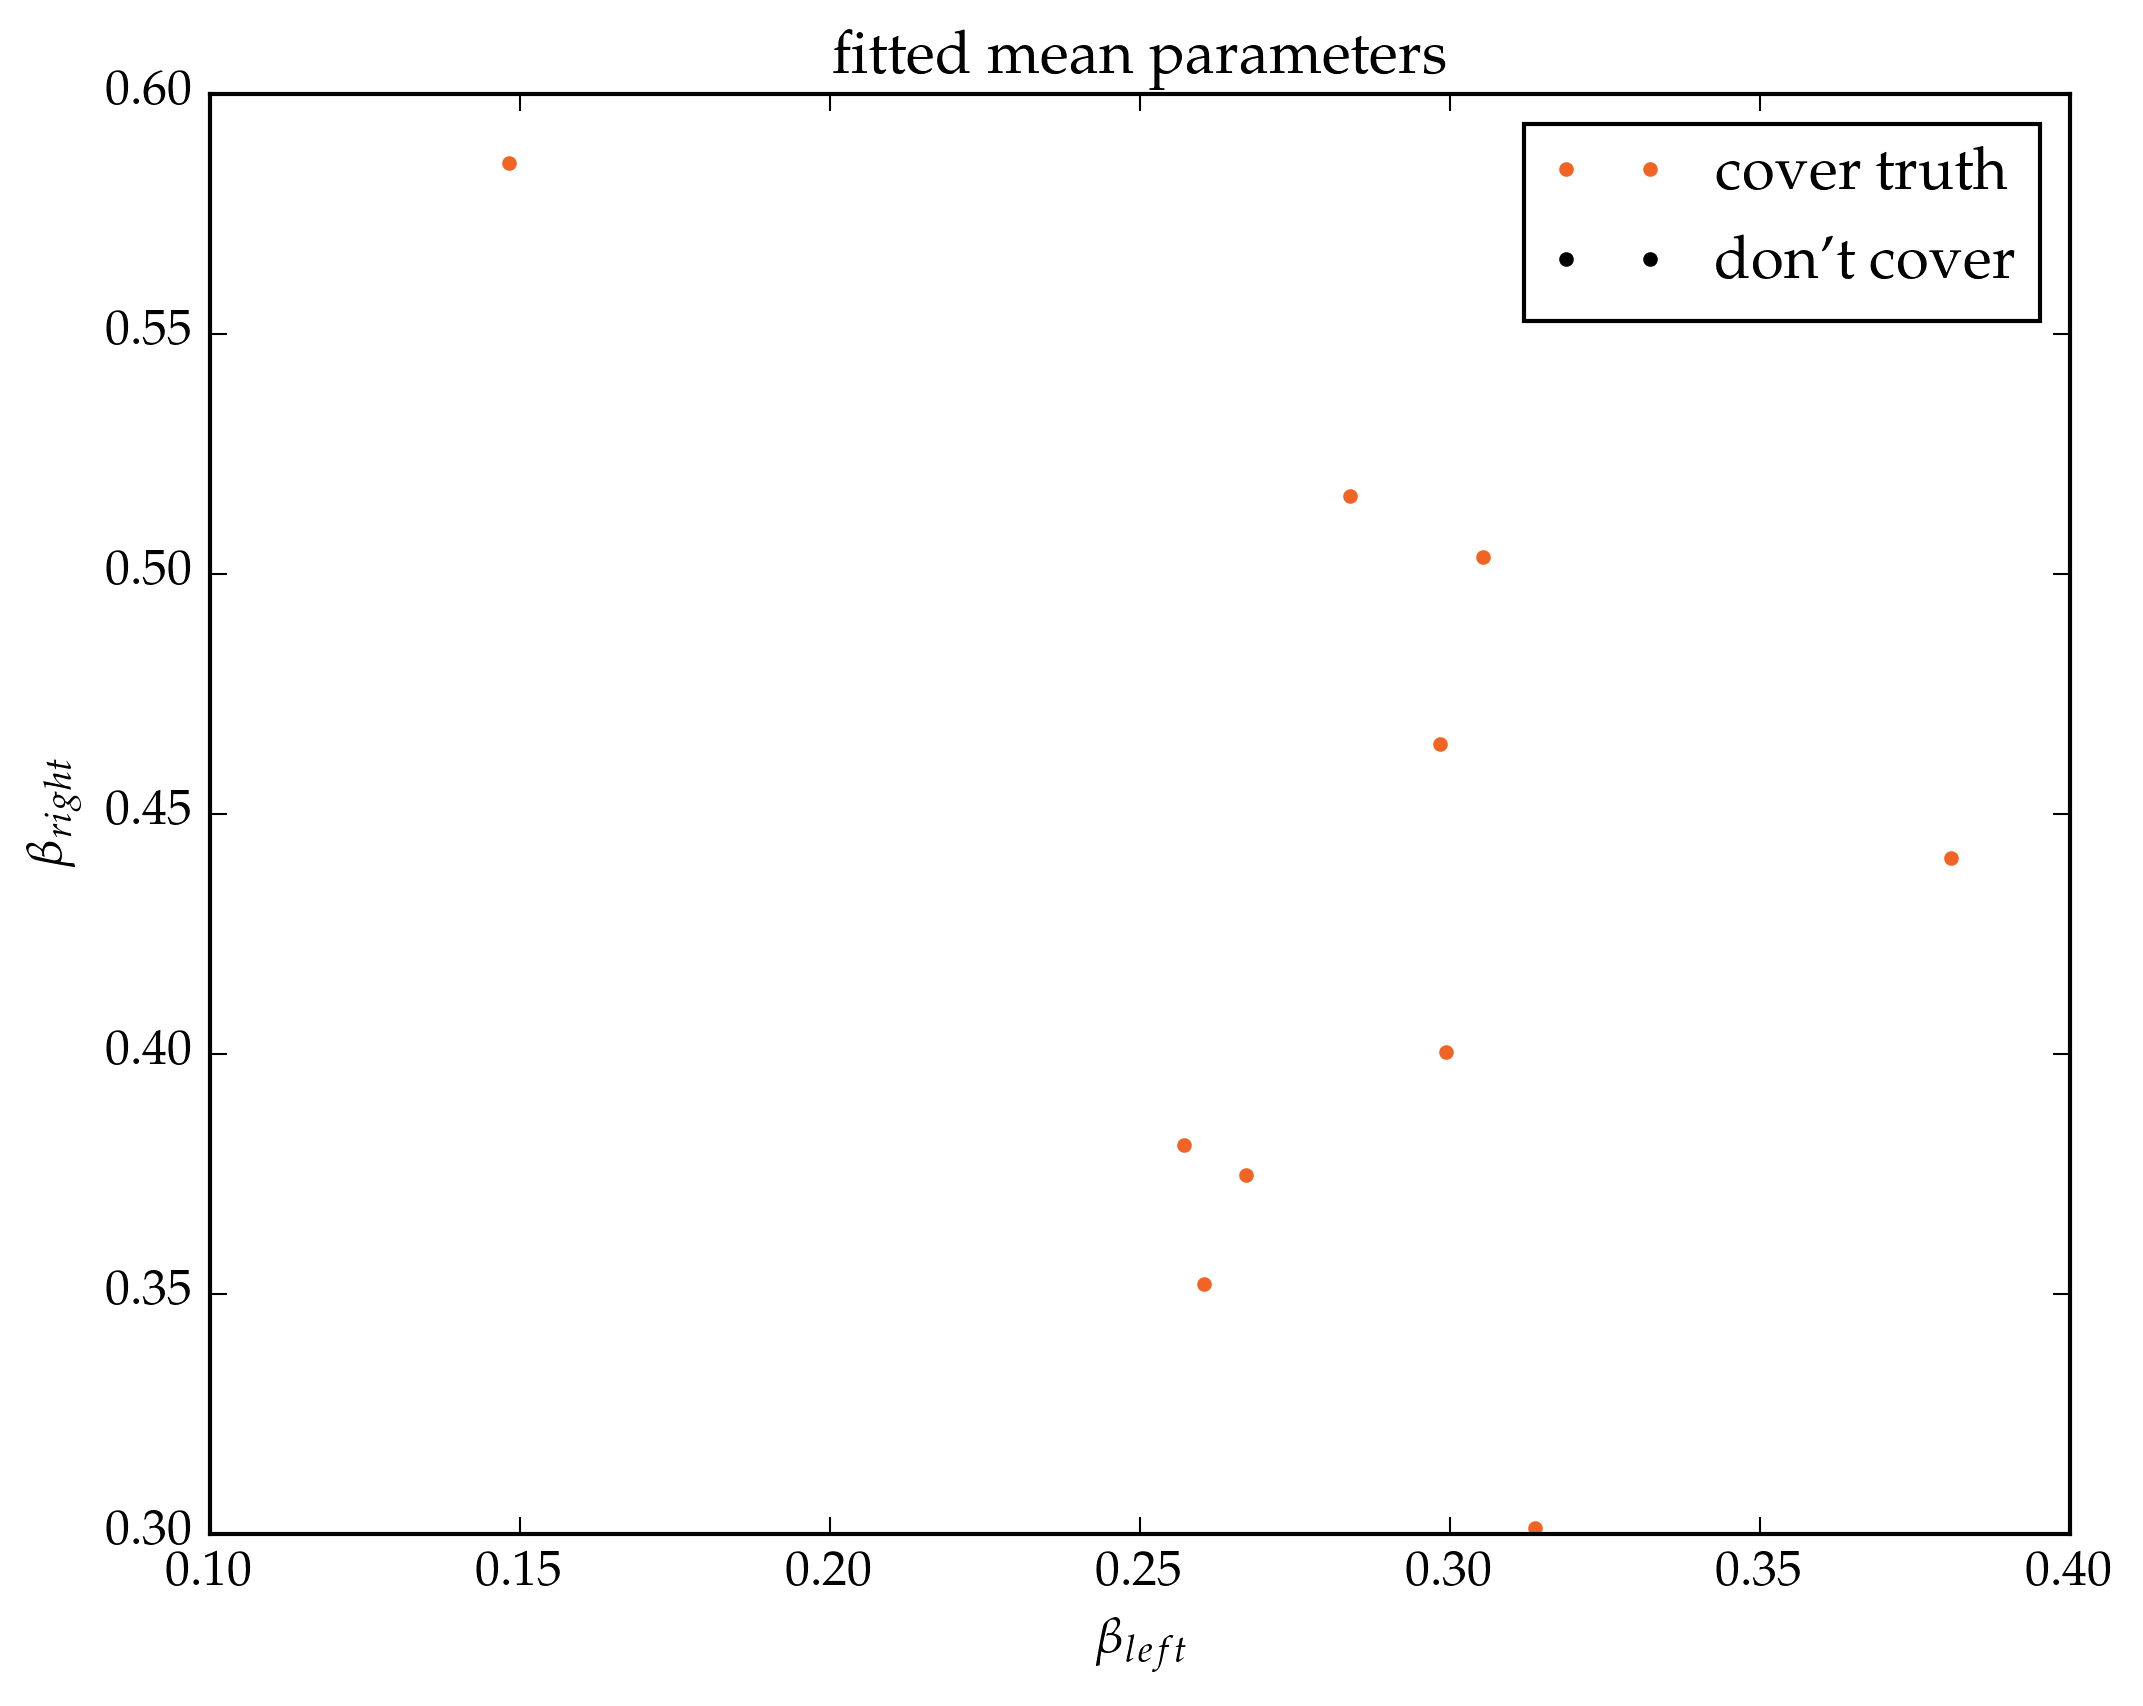

PyObject <matplotlib.legend.Legend object at 0x322fa7750>

In [35]:
plt.plot(lee_hyps[2,lee_covers],  lee_hyps[4,lee_covers],  ".", color="#F16424", label="cover truth")
plt.plot(lee_hyps[2,!lee_covers], lee_hyps[4,!lee_covers], ".", color="black",   label="don't cover")
plt.xlabel(L"$\beta_{left}$")
plt.ylabel(L"$\beta_{right}$")
plt.title("fitted mean parameters")
plt.legend()

# Pushing the trend into the kernel

Besides the hyperparameters, another source of uncertainty that isn't being accounted for is the mean parameters $\mu$ and $\beta$ on either side of the discontinuity. In the full Bayesian approach, we can just put a prior on them, and carry through their uncertainty. In the optimization approach, what we can do is add the covariance induced by the prior on $\mu$ and $\beta$ to the covariance matrix. Their uncertainty is then propagated automatically by the Gaussian Process machinery.

In [28]:
using GaussianProcesses: Stationary, MatF64, VecF64, StationaryData, EmptyData
import GaussianProcesses: cov, cov!, addcov!, kernel_data_key, get_params, set_params!, get_param_names, num_params

In [29]:
type ConstantKernel <: Stationary
    σ2::Float64
    ConstantKernel(lσ::Float64) = new(exp(2*lσ))
end
function set_params!(k::ConstantKernel, hyp::Vector{Float64})
    k.σ2 = exp(2*hyp[1])
end
get_params(k::ConstantKernel) = [0.5*log(k.σ2)]
get_param_names(::ConstantKernel) = [:lσ]
GaussianProcesses.num_params(k::ConstantKernel) = 1
GaussianProcesses.kernel_data_key{M<:MatF64}(k::ConstantKernel, X::M) = "ConstData"
cov(k::ConstantKernel, r::Float64) = k.σ2
cov{V1<:VecF64,V2<:VecF64}(k::ConstantKernel, x::V1, y::V2) = k.σ2

@inline function dk_dθp(k::ConstantKernel, r::Float64, p::Int)
    if p==1
        return dk_dlσ(se, r)
    else
        return NaN
    end
end
distance{M<:MatF64}(k::ConstantKernel, X::M) = ones(Float64, size(X,2), size(X,2))
distance{M1<:MatF64,M2<:MatF64}(k::ConstantKernel, X::M1, Y::M2) = ones(Float64, size(X,2), size(Y,2))
distance{V1<:VecF64,V2<:VecF64}(k::ConstantKernel, x::V1, y::V2) = 1.0
function GaussianProcesses.cov!{M<:MatF64}(cK::MatF64, k::ConstantKernel, X::M, data::EmptyData)
    fill!(cK, k.σ2)
end
function GaussianProcesses.addcov!{M<:MatF64}(cK::MatF64, k::ConstantKernel, X::M, data::EmptyData)
    cK[:,:] += k.σ2
end   

In [30]:
function fit_2GP_meankern(x::Vector, y::Vector, thresh::Real)
    # specify kernel and mean function
    kern = SEIso(-3.0, -3.0) + fix(ConstantKernel(3.0)+LinIso(-3.0))
    right = x .> thresh
    meanf_l = MeanZero()
    meanf_r = MeanZero()
    
    # create GPs for left and right
    gp_left  =GP(x[!right]', y[!right], meanf_l, kern, -3.0)
    gp_right =GP(x[right]',  y[right],  meanf_r, kern, -3.0)
    both_gps = GeoRDD.GPRealisations([gp_left, gp_right])
    
    # optimize hyperparameters
    optimize!(both_gps, mean=false)
    return both_gps
end

fit_2GP_meankern (generic function with 1 method)

In [31]:
_both_gps=fit_2GP_meankern(_simdata[:x].values, _simdata[:y].values, 0.0)

GeoRDD.GPRealisations(GaussianProcesses.GP[GP object:
  Dim = 1
  Number of observations = 416
  Mean function:
    Type: GaussianProcesses.MeanConst, Params: [0.0]
  Kernel:
    Type: GaussianProcesses.SumKernel
      Type: GaussianProcesses.SEIso, Params: [-2.50381,-2.81623]
      Type: GaussianProcesses.FixedKern, Params: Float64[]
  Input observations = 
[-0.980896 -0.937369 … -0.00681883 -0.00217726]
  Output observations = [0.386936,0.479321,0.376609,0.348104,0.334052,0.194024,0.401803,-0.0481022,-0.103552,0.298374  …  0.456425,0.375832,0.405334,0.438114,0.313108,0.658657,0.392569,0.696798,0.650467,0.395658]
  Variance of observation noise = 0.01538775525908112
  Marginal Log-Likelihood = 242.543,GP object:
  Dim = 1
  Number of observations = 84
  Mean function:
    Type: GaussianProcesses.MeanConst, Params: [0.0]
  Kernel:
    Type: GaussianProcesses.SumKernel
      Type: GaussianProcesses.SEIso, Params: [-2.50381,-2.81623]
      Type: GaussianProcesses.FixedKern, Params: Float

In [32]:
function do_sim(sim::String, isim::Int, thresh::Real, method::Symbol)
    simdata=readtable(@sprintf("saved_simData/%s_%d.csv", sim, isim), header=true, names=[:i,:x,:y]);
    if method == :fixedmean
        both_gps = fit_2GP(simdata[:x].values, simdata[:y].values, thresh)
    elseif method == :meankern
        both_gps = fit_2GP_meankern(simdata[:x].values, simdata[:y].values, thresh)
    elseif method == :integse
        both_gps = fit_2GP_integse(simdata[:x].values, simdata[:y].values, thresh)
    else
        throw(ArgumentError("invalid method"))
    end
    gp_left, gp_right = both_gps.reals
    τpost = get_τpost(gp_left, gp_right, thresh)
    if method == :fixedmean
        hyp = get_params(both_gps)
    elseif method == :meankern
        hyp = get_params(both_gps, mean=false)
    elseif method == :integse
        hyp = get_params(both_gps, mean=false)
    else
        throw(ArgumentError("invalid method"))
    end
    return Fitted2GP(τpost, hyp)
end

do_sim (generic function with 2 methods)

In [56]:
function plot_sim(sim::String, isim::Int, thresh::Real, method::Symbol, truth::Function)
    simdata=readtable(@sprintf("saved_simData/%s_%d.csv", sim, isim), header=true, names=[:i,:x,:y]);
    x = simdata[:x].values
    y = simdata[:y].values
    if method == :fixedmean
        both_gps = fit_2GP(simdata[:x].values, simdata[:y].values, thresh)
    elseif method == :meankern
        both_gps = fit_2GP_meankern(simdata[:x].values, simdata[:y].values, thresh)
    elseif method == :integse
        both_gps = fit_2GP_integse(simdata[:x].values, simdata[:y].values, thresh)
    else
        throw(ArgumentError("invalid method"))
    end
    gp_left, gp_right = both_gps.reals
    τpost = get_τpost(gp_left, gp_right, thresh)
    xx=linspace(-1.0,1.0,1000)
    xx_left = xx[xx.<thresh]
    xx_right = xx[xx.>thresh]
    pred_left = predict(gp_left, xx_left'; full_cov=false)
    pred_right = predict(gp_right, xx_right'; full_cov=false)

    plt.plot(x, y, ".", color="black", label="simulated data")
    plt.plot(xx, truth.(xx), "--", color="#00B8EA", linewidth=2, label="truth")
    plt.plot(xx_left, pred_left[1], 
        color="orange", linewidth=2, label="posterior")
    plt.fill_between(xx_left, pred_left[1].-2.0*√pred_left[2], pred_left[1].+√pred_left[2], 
        color="orange", alpha=0.5)
    plt.plot(xx_right, pred_right[1], color="orange", linewidth=2)
    plt.fill_between(xx_right, pred_right[1].-2.0*√pred_right[2], pred_right[1].+√pred_right[2], 
        color="orange", alpha=0.5)
    plt.axvline(0.0, color="grey")
    plt.plot(0.0, truth(thresh-1e-10), "o", color="#00B8EA")
    plt.plot(0.0, truth(thresh+1e-10), "o", color="#00B8EA")
    plt.legend(loc="upper left")
    
    τtrue = truth(thresh+1e-10)-truth(thresh-1e-10)
    cover = quantile(τpost, 0.025) < τtrue < quantile(τpost, 0.975)
    plt.text(0.9, 0.2, 
        latexstring(@sprintf("\$\\tau \\mid Y \\sim \\mathcal{N}(%.3f,\\sigma=%.3f)\$ \n covers? %s", 
        mean(τpost), 
        std(τpost),
        (cover ? "yes" : "no")
        )),
        horizontalalignment="right",
        transform = plt.gca()[:transAxes]
        )
end

plot_sim (generic function with 2 methods)

Here's a cherry-picked example where the wider credible interval on the treatment effect now covers the truth.

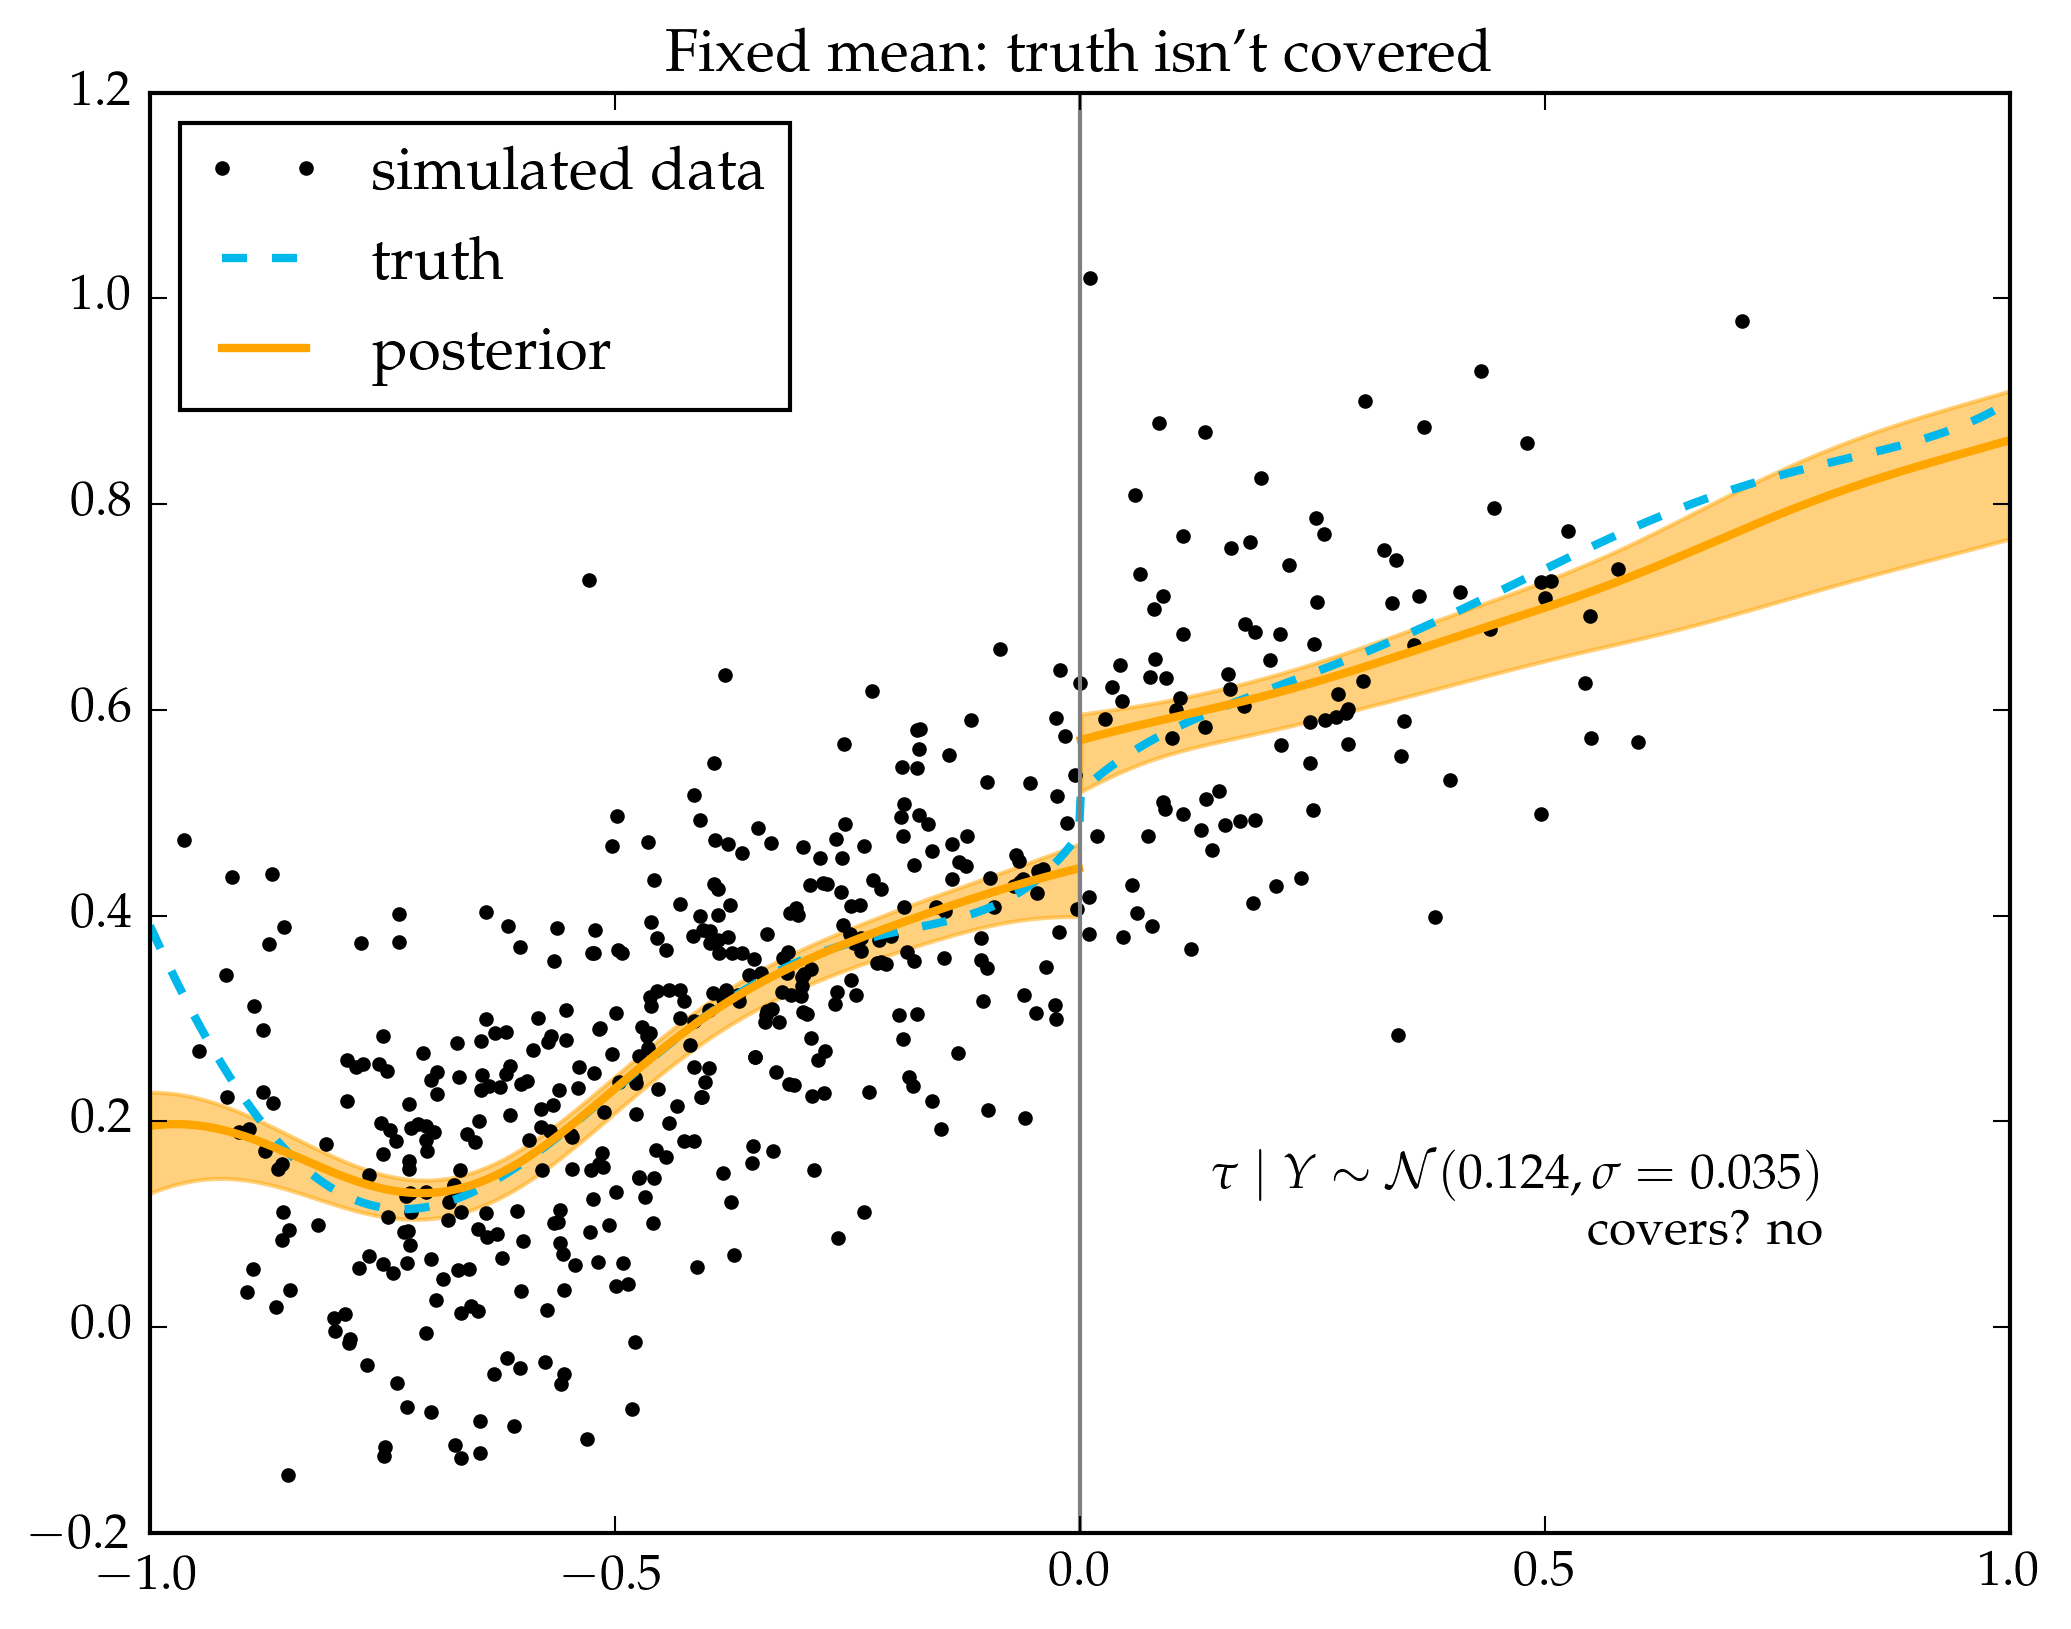

In [34]:
plot_sim("lee", 31, 0.0, :fixedmean, lee_truth)
plt.title("Fixed mean: truth isn't covered")
;

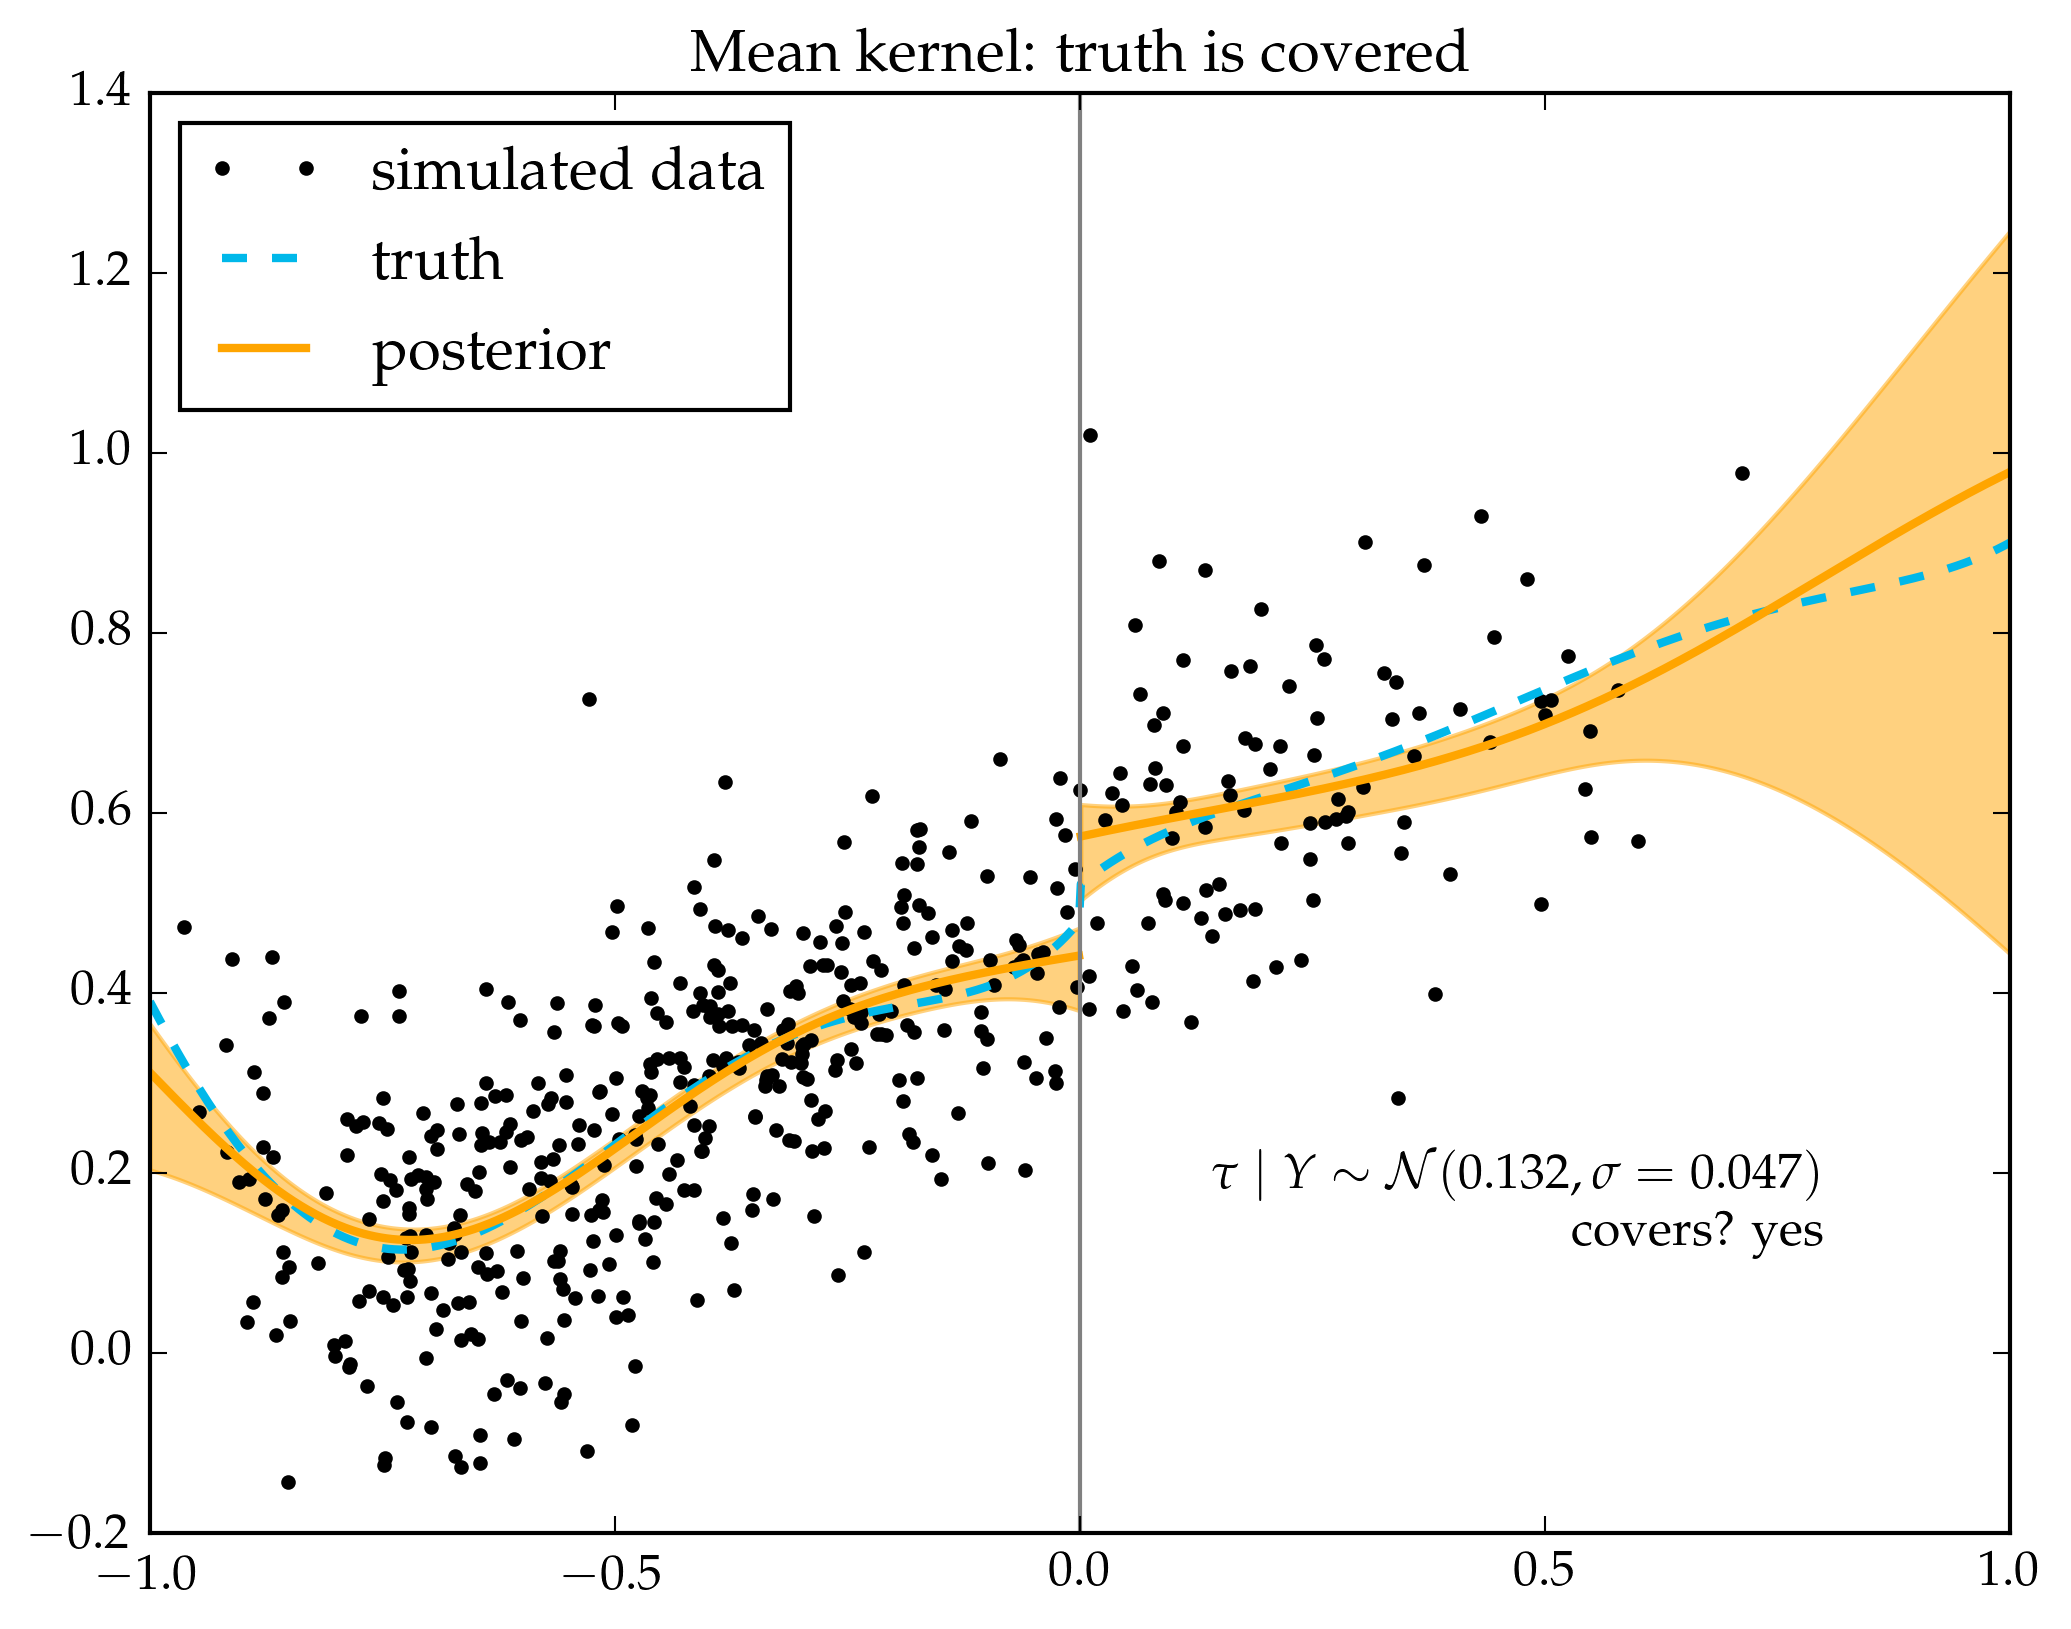

In [35]:
plot_sim("lee", 31, 0.0, :meankern, lee_truth)
plt.title("Mean kernel: truth is covered")
;

# Other simulations

In [36]:
function loops_sims(sim::String, thresh::Real, truth_left::Function, truth_right::Function, method::Symbol)
    nsims = 1000
    τtrue = truth_right(thresh)-truth_left(thresh)
    biases=Array(Float64, nsims)
    covers=Array(Bool, nsims)
    τposts = Array(Normal, nsims)
    if method == :fixedmean
        nhyps=4+num_params(SEIso(0.0,0.0))
    else
        nhyps=1+num_params(SEIso(0.0,0.0))
    end
    hyps = Array(Float64, nhyps, nsims)
    for isim in 1:nsims
        if isim%10==0
            println(isim, "...")
        end
        sim_result = do_sim(sim, isim, 0.0, method)
        τpost = sim_result.τpost
        cover = quantile(τpost, 0.025) < τtrue < quantile(τpost, 0.975)
        bias = mean(τpost)-τtrue

        biases[isim] = bias
        covers[isim] = cover
        τposts[isim] = τpost
        hyps[:,isim] = sim_result.hyp
    end
    results = DataFrame(
        bias=biases, 
        tauhat=mean.(τposts), 
        Vtau=var.(τposts),
        cover=covers)
    writetable(@sprintf("saved_simResults/results_%s_500_%s.csv", sim, method), 
        results, 
        separator = ',', 
        header = true)
    writecsv(@sprintf("saved_simResults/hyperparameters_%s_500_%s.csv", sim, method), hyps)
    @printf("bias=%.4f\n", mean(biases))
    @printf("RMSE=%.3f\n", √( mean(biases.^2) ))
    @printf("%.1f%% coverage\n", mean(covers)*100) # coverage
end

loops_sims (generic function with 1 method)

## Quad

In [37]:
quad_left(x::Real) = 3*x^2
quad_right(x::Real) = 4*x^2
quad_truth(x::Real) = x<zero(x) ? quad_left(x) : quad_right(x)

quad_truth (generic function with 1 method)

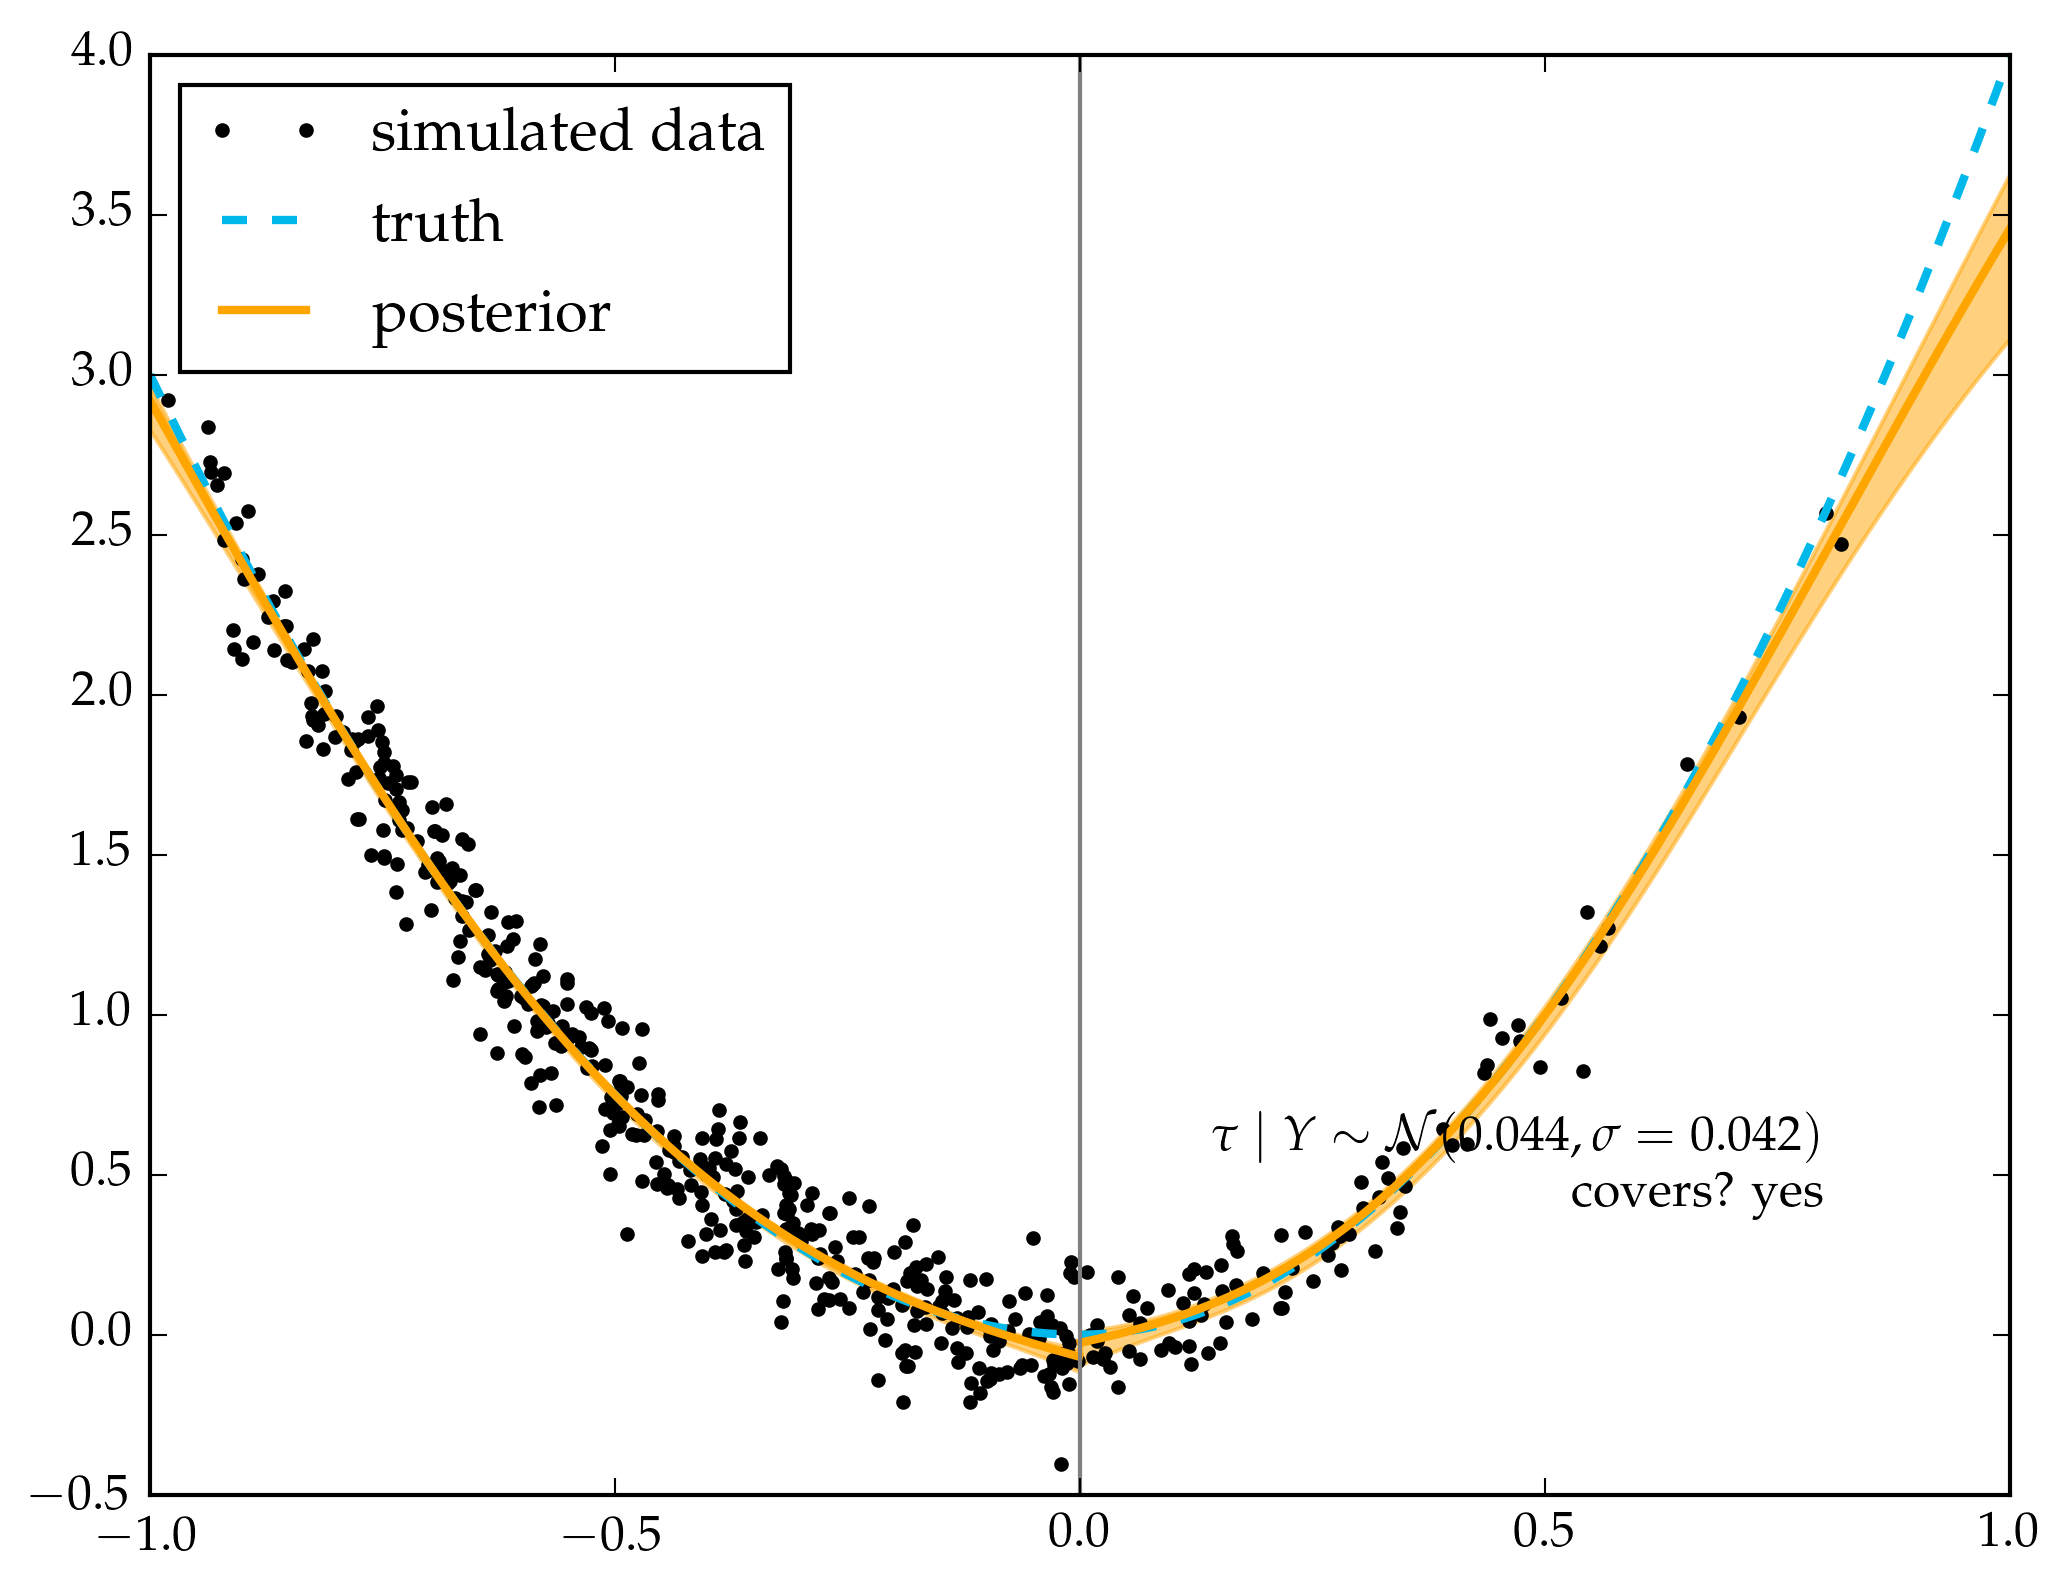

PyObject <matplotlib.text.Text object at 0x32331d210>

In [38]:
plot_sim("quad", 5, 0.0, :fixedmean, quad_truth)

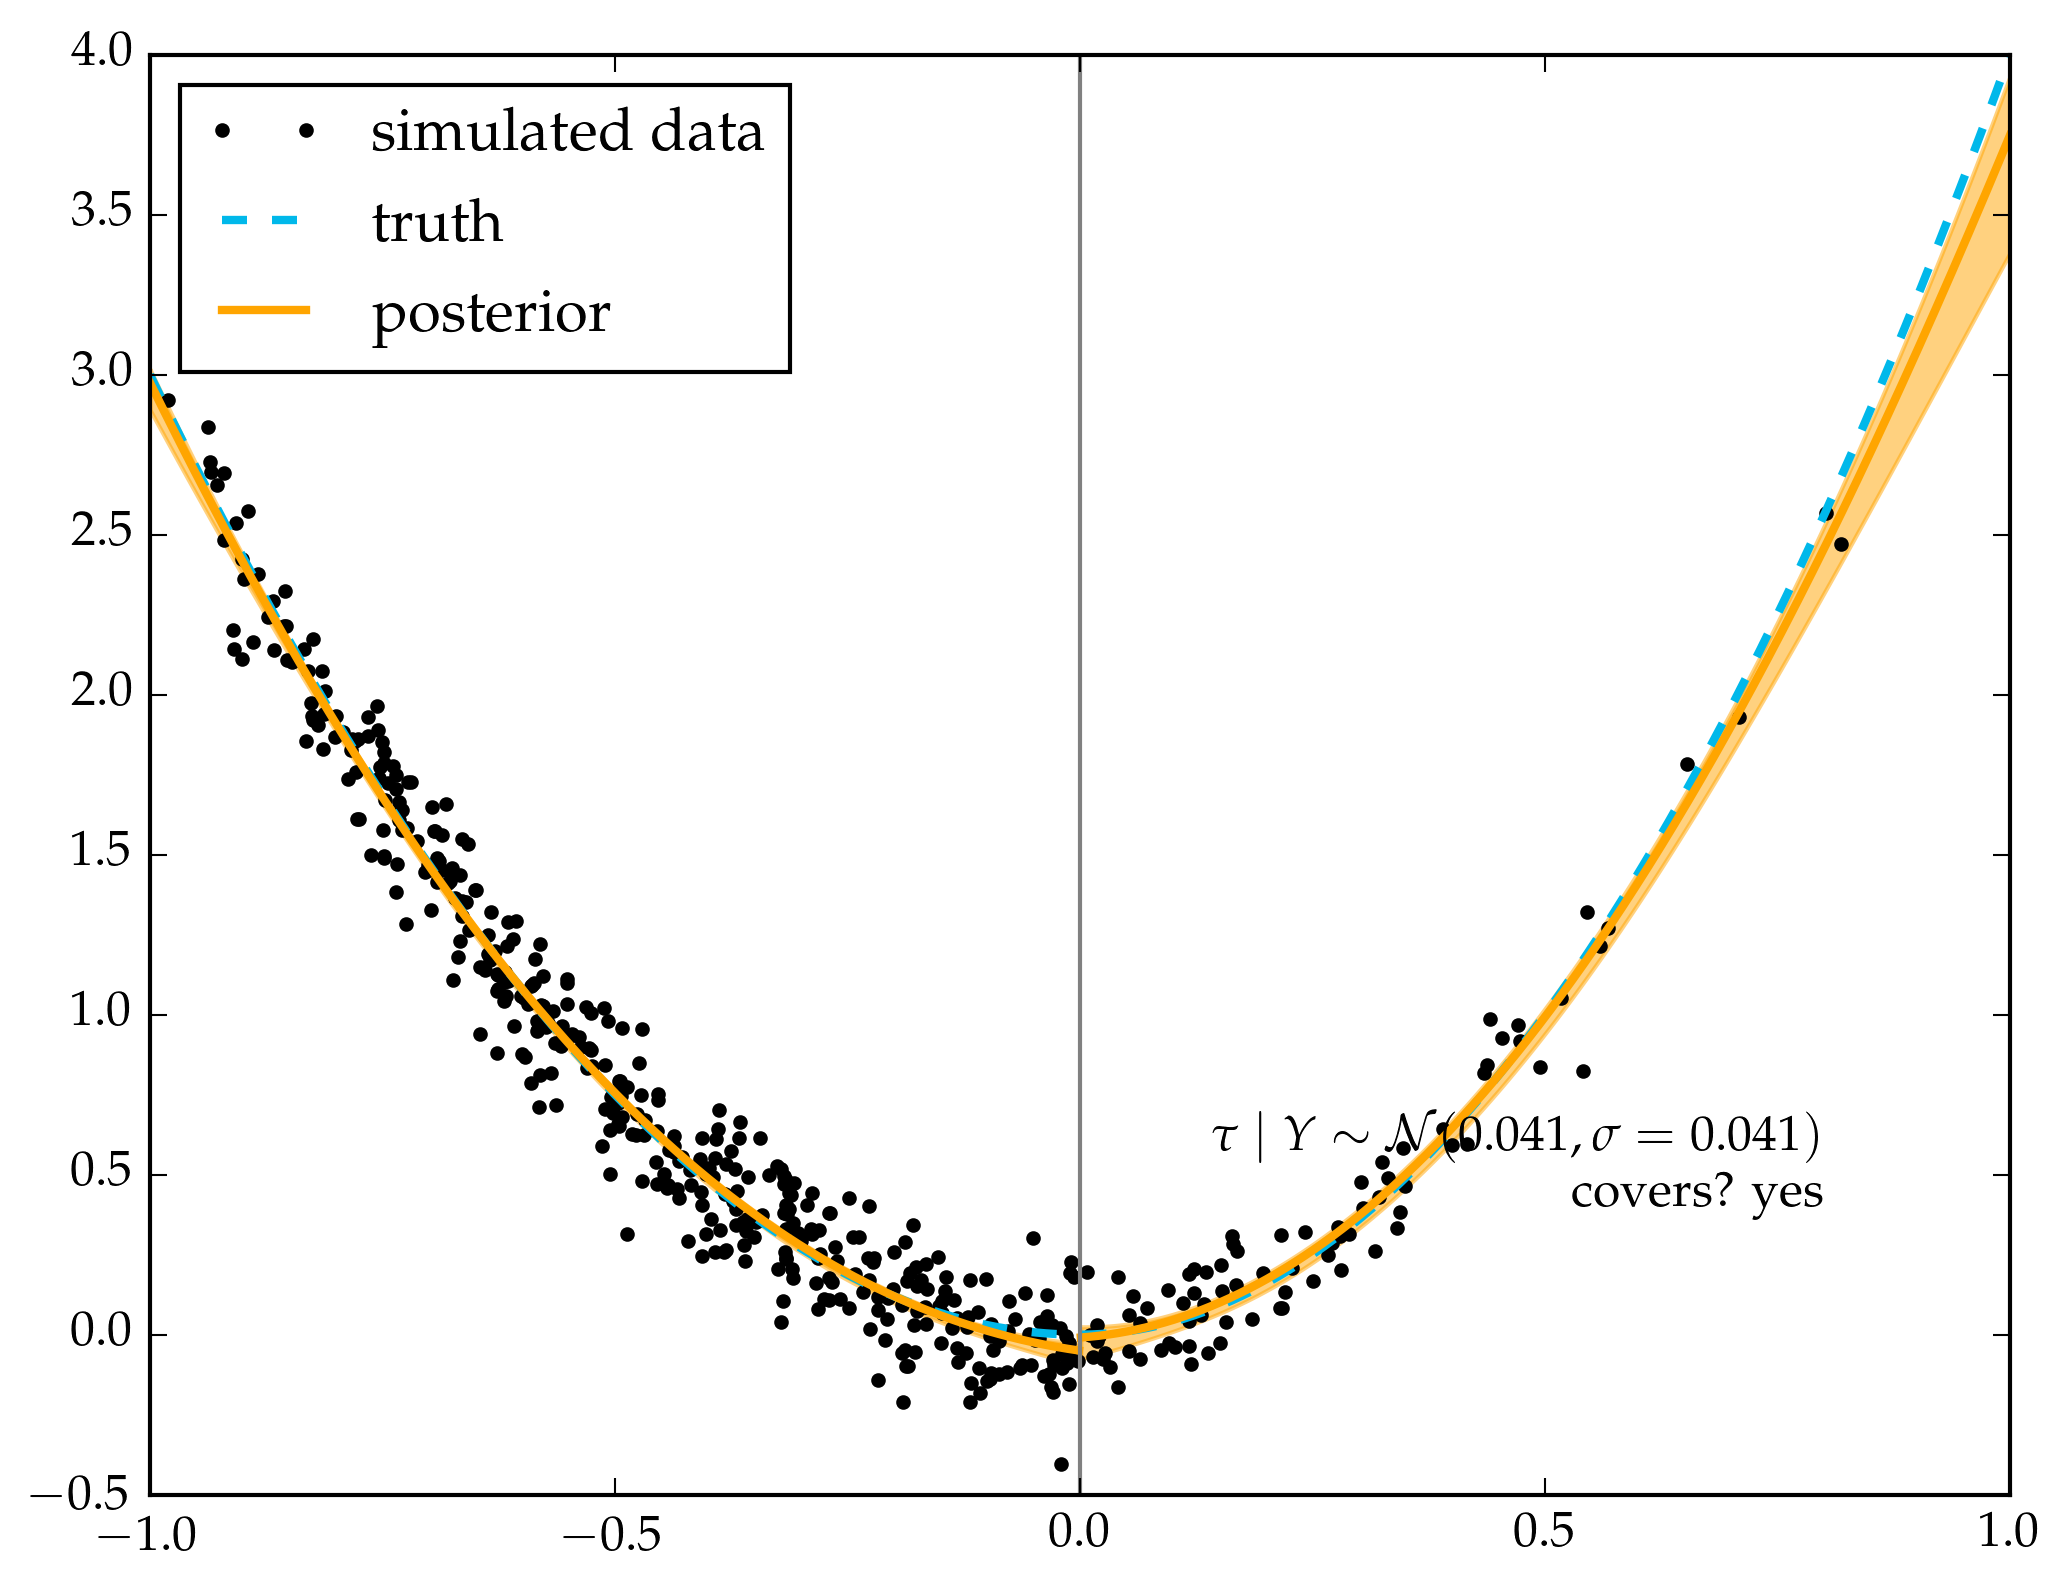

PyObject <matplotlib.text.Text object at 0x3234492d0>

In [39]:
plot_sim("quad", 5, 0.0, :meankern, quad_truth)

In [130]:
@time loops_sims("quad", 0.0, quad_left, quad_right, :fixedmean)

10...
20...
in callback catch
30...
40...
50...
60...
70...
80...
90...
100...
110...
120...
130...
140...
150...
160...
170...
180...
190...
200...
in callback catch
210...
220...
230...
240...
250...
in callback catch
260...
270...
280...
290...
300...
310...
320...
330...
340...
350...
360...
370...
380...
390...
400...
410...
420...
430...
440...
450...
460...
470...
in callback catch
480...
490...
500...
510...
520...
530...
540...
550...
560...
570...
580...
590...
600...
610...
620...
630...
640...
650...
660...
in callback catch
670...
680...
690...
700...
710...
720...
730...
740...
in callback catch
750...
760...
770...
780...
790...
800...
810...
820...
830...
840...
850...
860...
870...
880...
890...
900...
910...
920...
930...
940...
950...
960...
970...
980...
990...
1000...
bias=0.0004
RMSE=0.047
95.9% coverage
486.897387 seconds (209.94 M allocations: 18.007 GB, 0.64% gc time)


In [131]:
@time loops_sims("quad", 0.0, quad_left, quad_right, :meankern)

10...
20...
30...
40...
50...
60...
70...
80...
90...
100...
110...
120...
130...
140...
150...
160...
170...
180...
190...
200...
210...
220...
230...
240...
250...
260...
270...
280...
290...
300...
310...
320...
330...
340...
350...
360...
370...
380...
390...
400...
410...
420...
430...
440...
450...
460...
470...
480...
490...
500...
510...
520...
530...
540...
550...
560...
570...
580...
590...
600...
610...
620...
630...
640...
650...
660...
670...
680...
690...
700...
710...
720...
730...
740...
750...
760...
770...
780...
790...
800...
810...
820...
830...
840...
850...
860...
870...
880...
890...
900...
910...
920...
930...
940...
950...
960...
970...
980...
990...
1000...
bias=0.0002
RMSE=0.044
96.3% coverage
792.456683 seconds (119.40 M allocations: 437.311 GB, 5.86% gc time)


## Cate 1

In [84]:
cate1_left(x::Real) = 0.42 + 0.84 * x - 3.00 * x^2 + 7.99 * x^3 - 9.01 * x^4 + 3.56 * x^5
cate1_right(x::Real) = 0.1+cate1_left(x)
cate1_truth(x::Real) = x<zero(x) ? cate1_left(x) : cate1_right(x)

cate1_truth (generic function with 1 method)

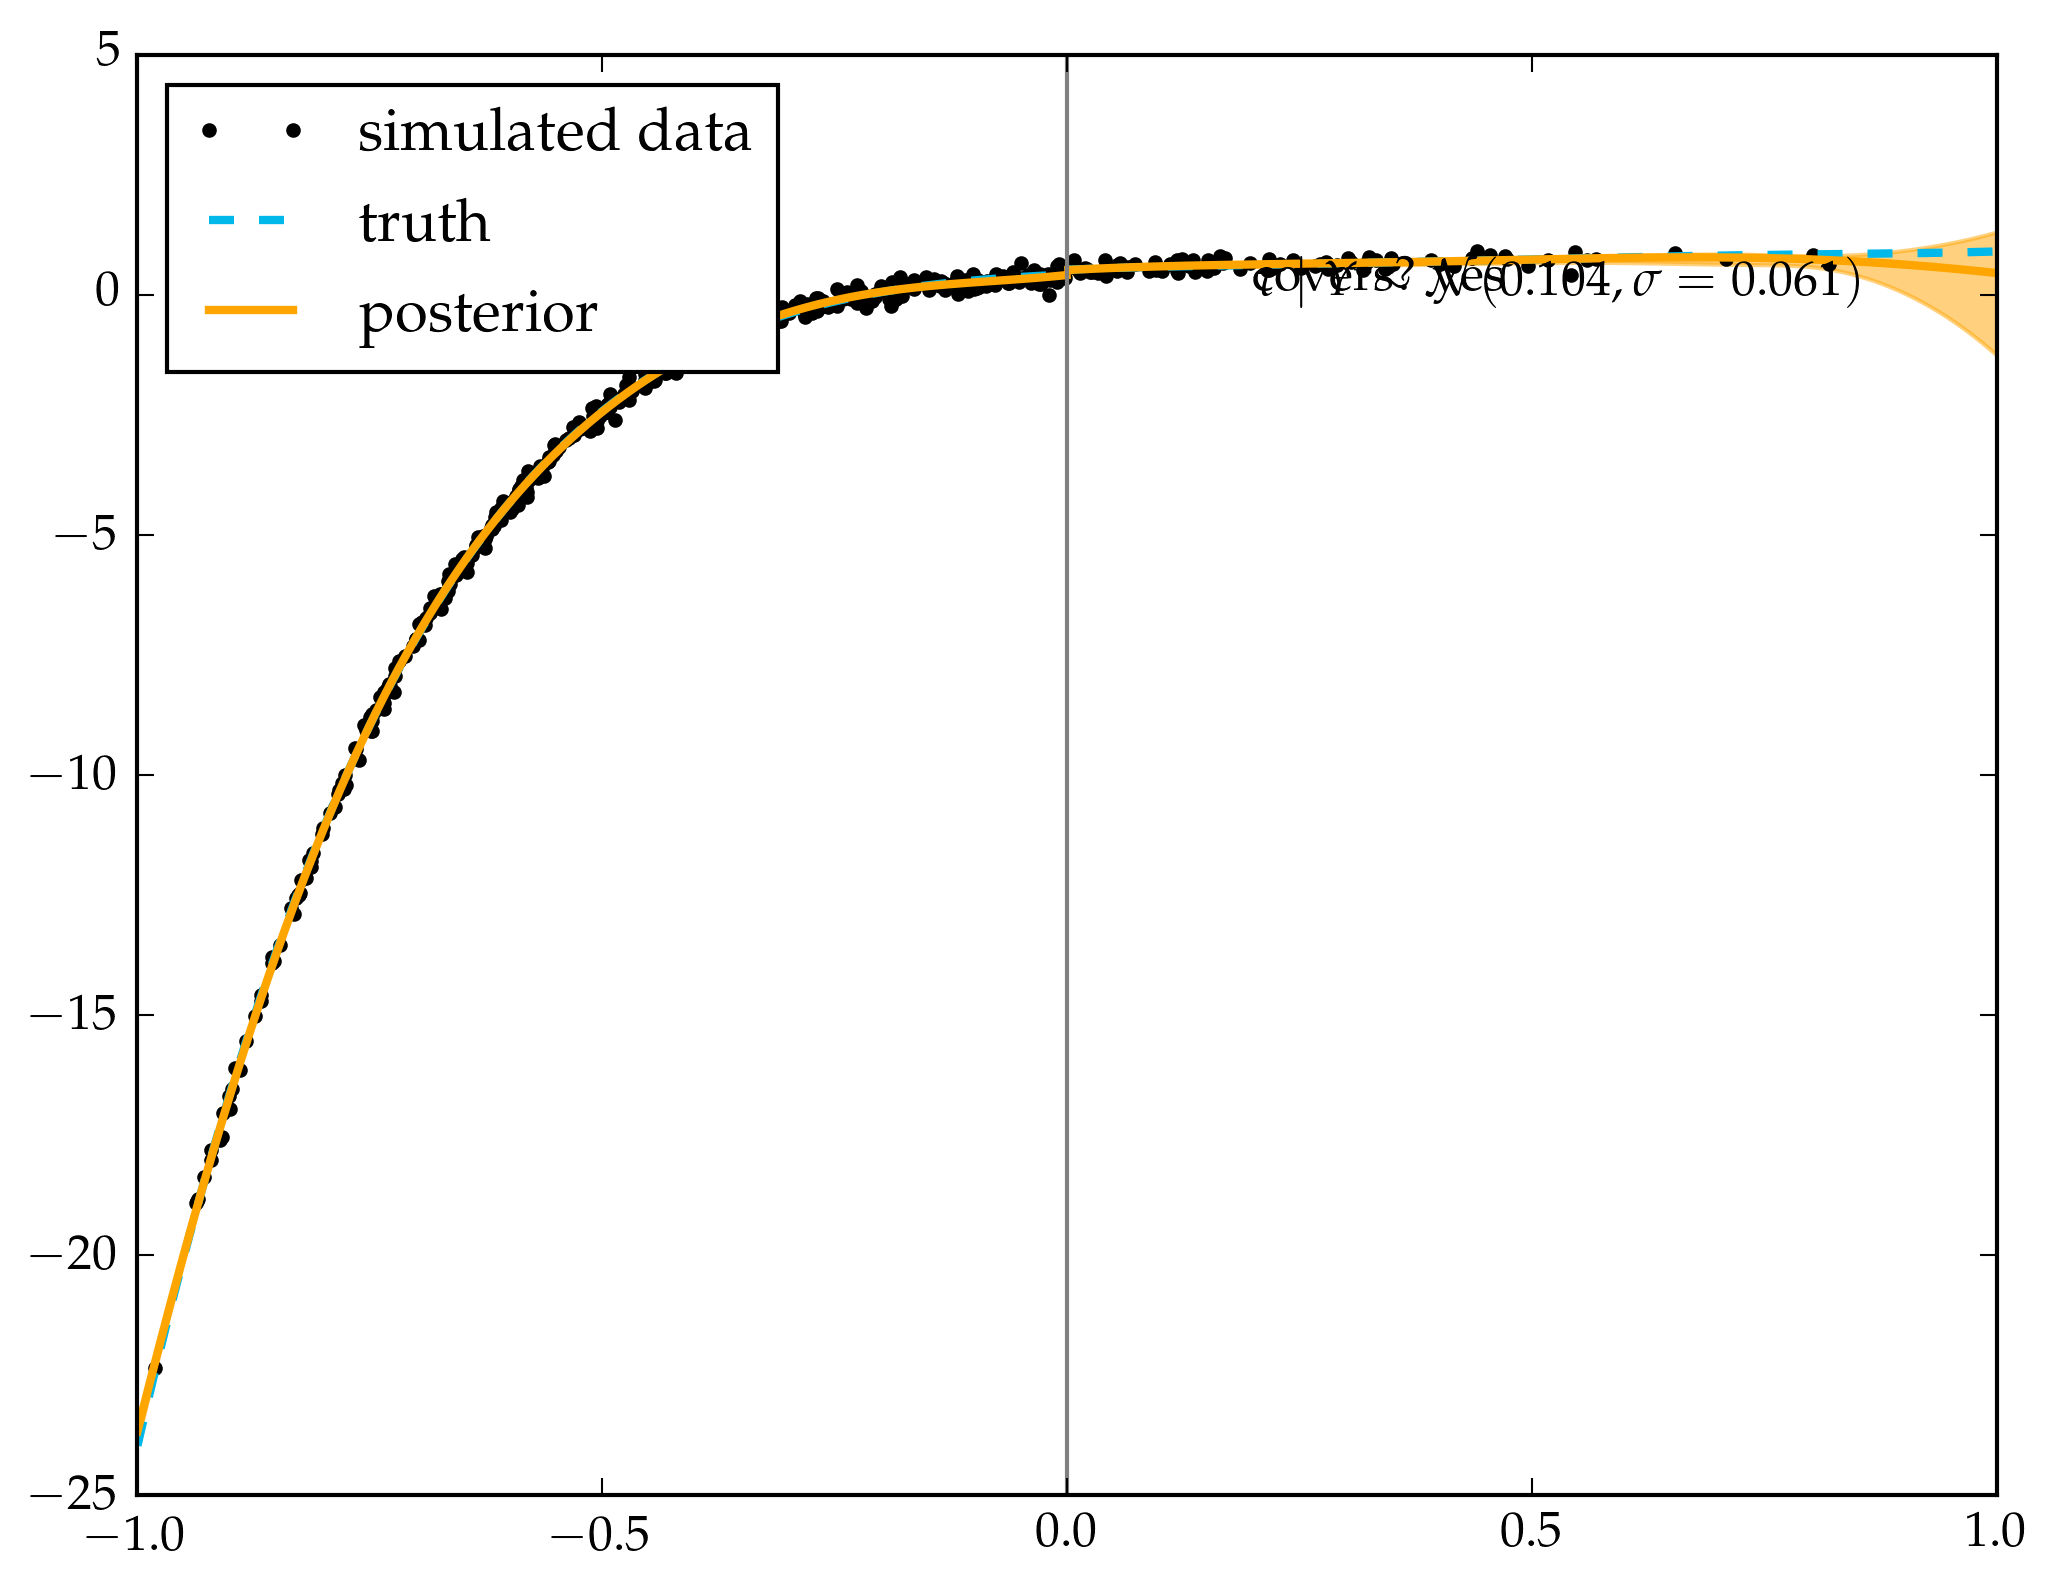

in callback catch


PyObject <matplotlib.text.Text object at 0x320c80390>

In [123]:
plot_sim("cate1", 5, 0.0, :fixedmean, cate1_truth)

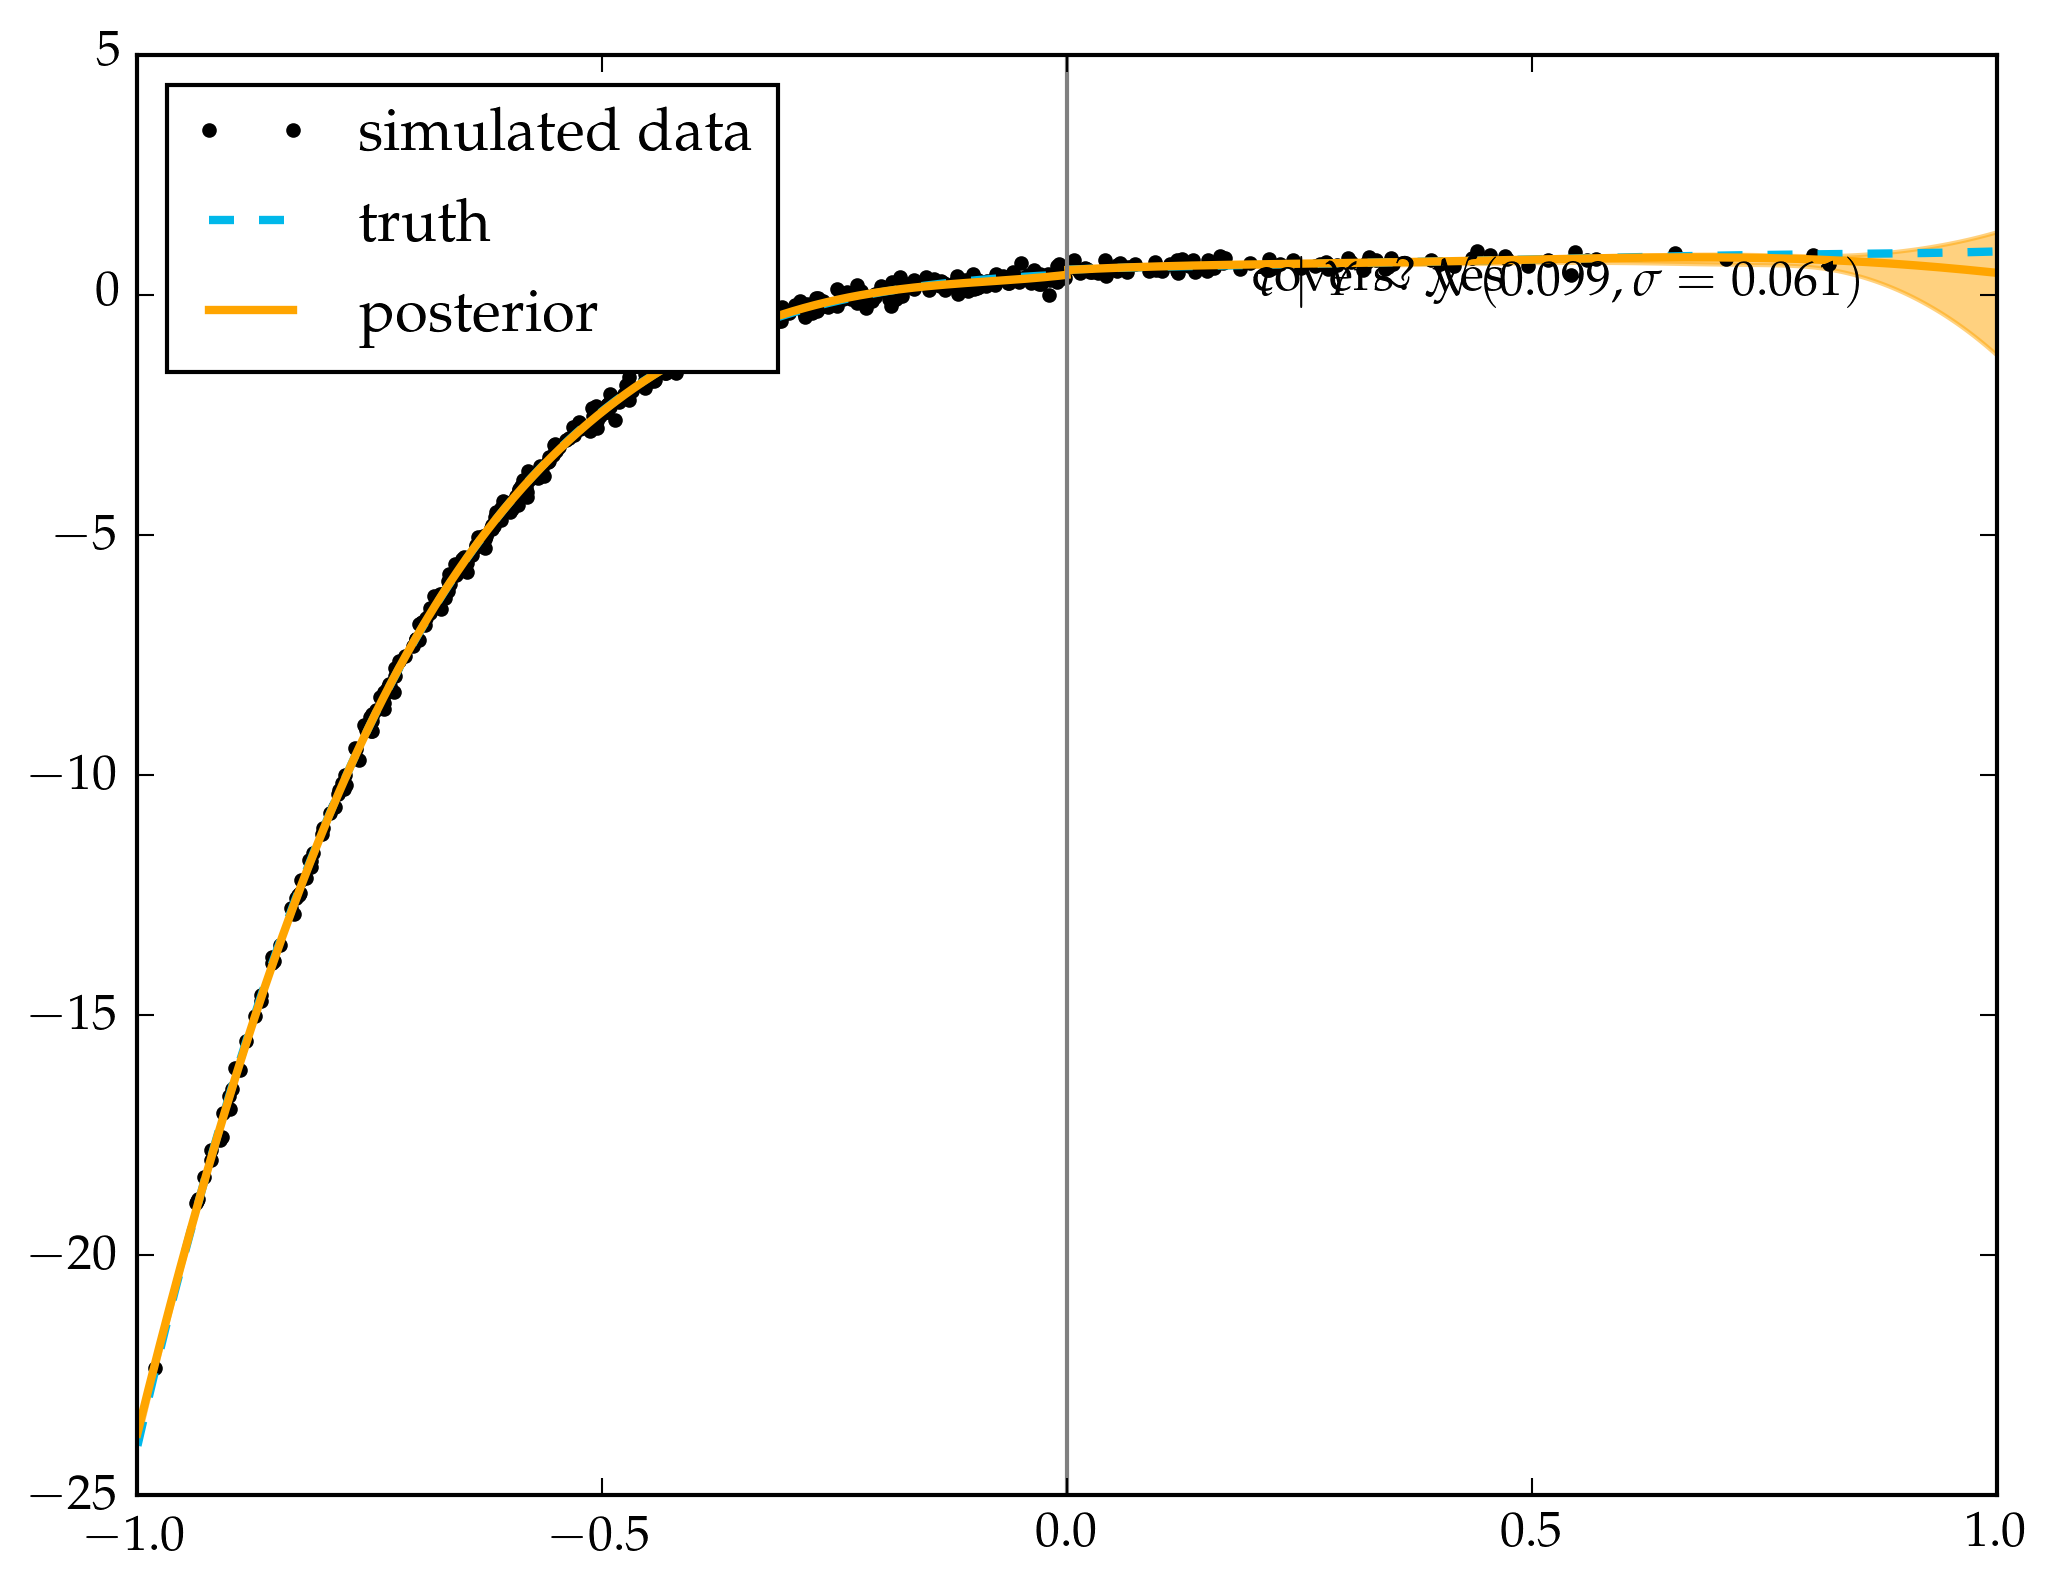

PyObject <matplotlib.text.Text object at 0x31c00aad0>

In [89]:
plot_sim("cate1", 5, 0.0, :meankern, cate1_truth)

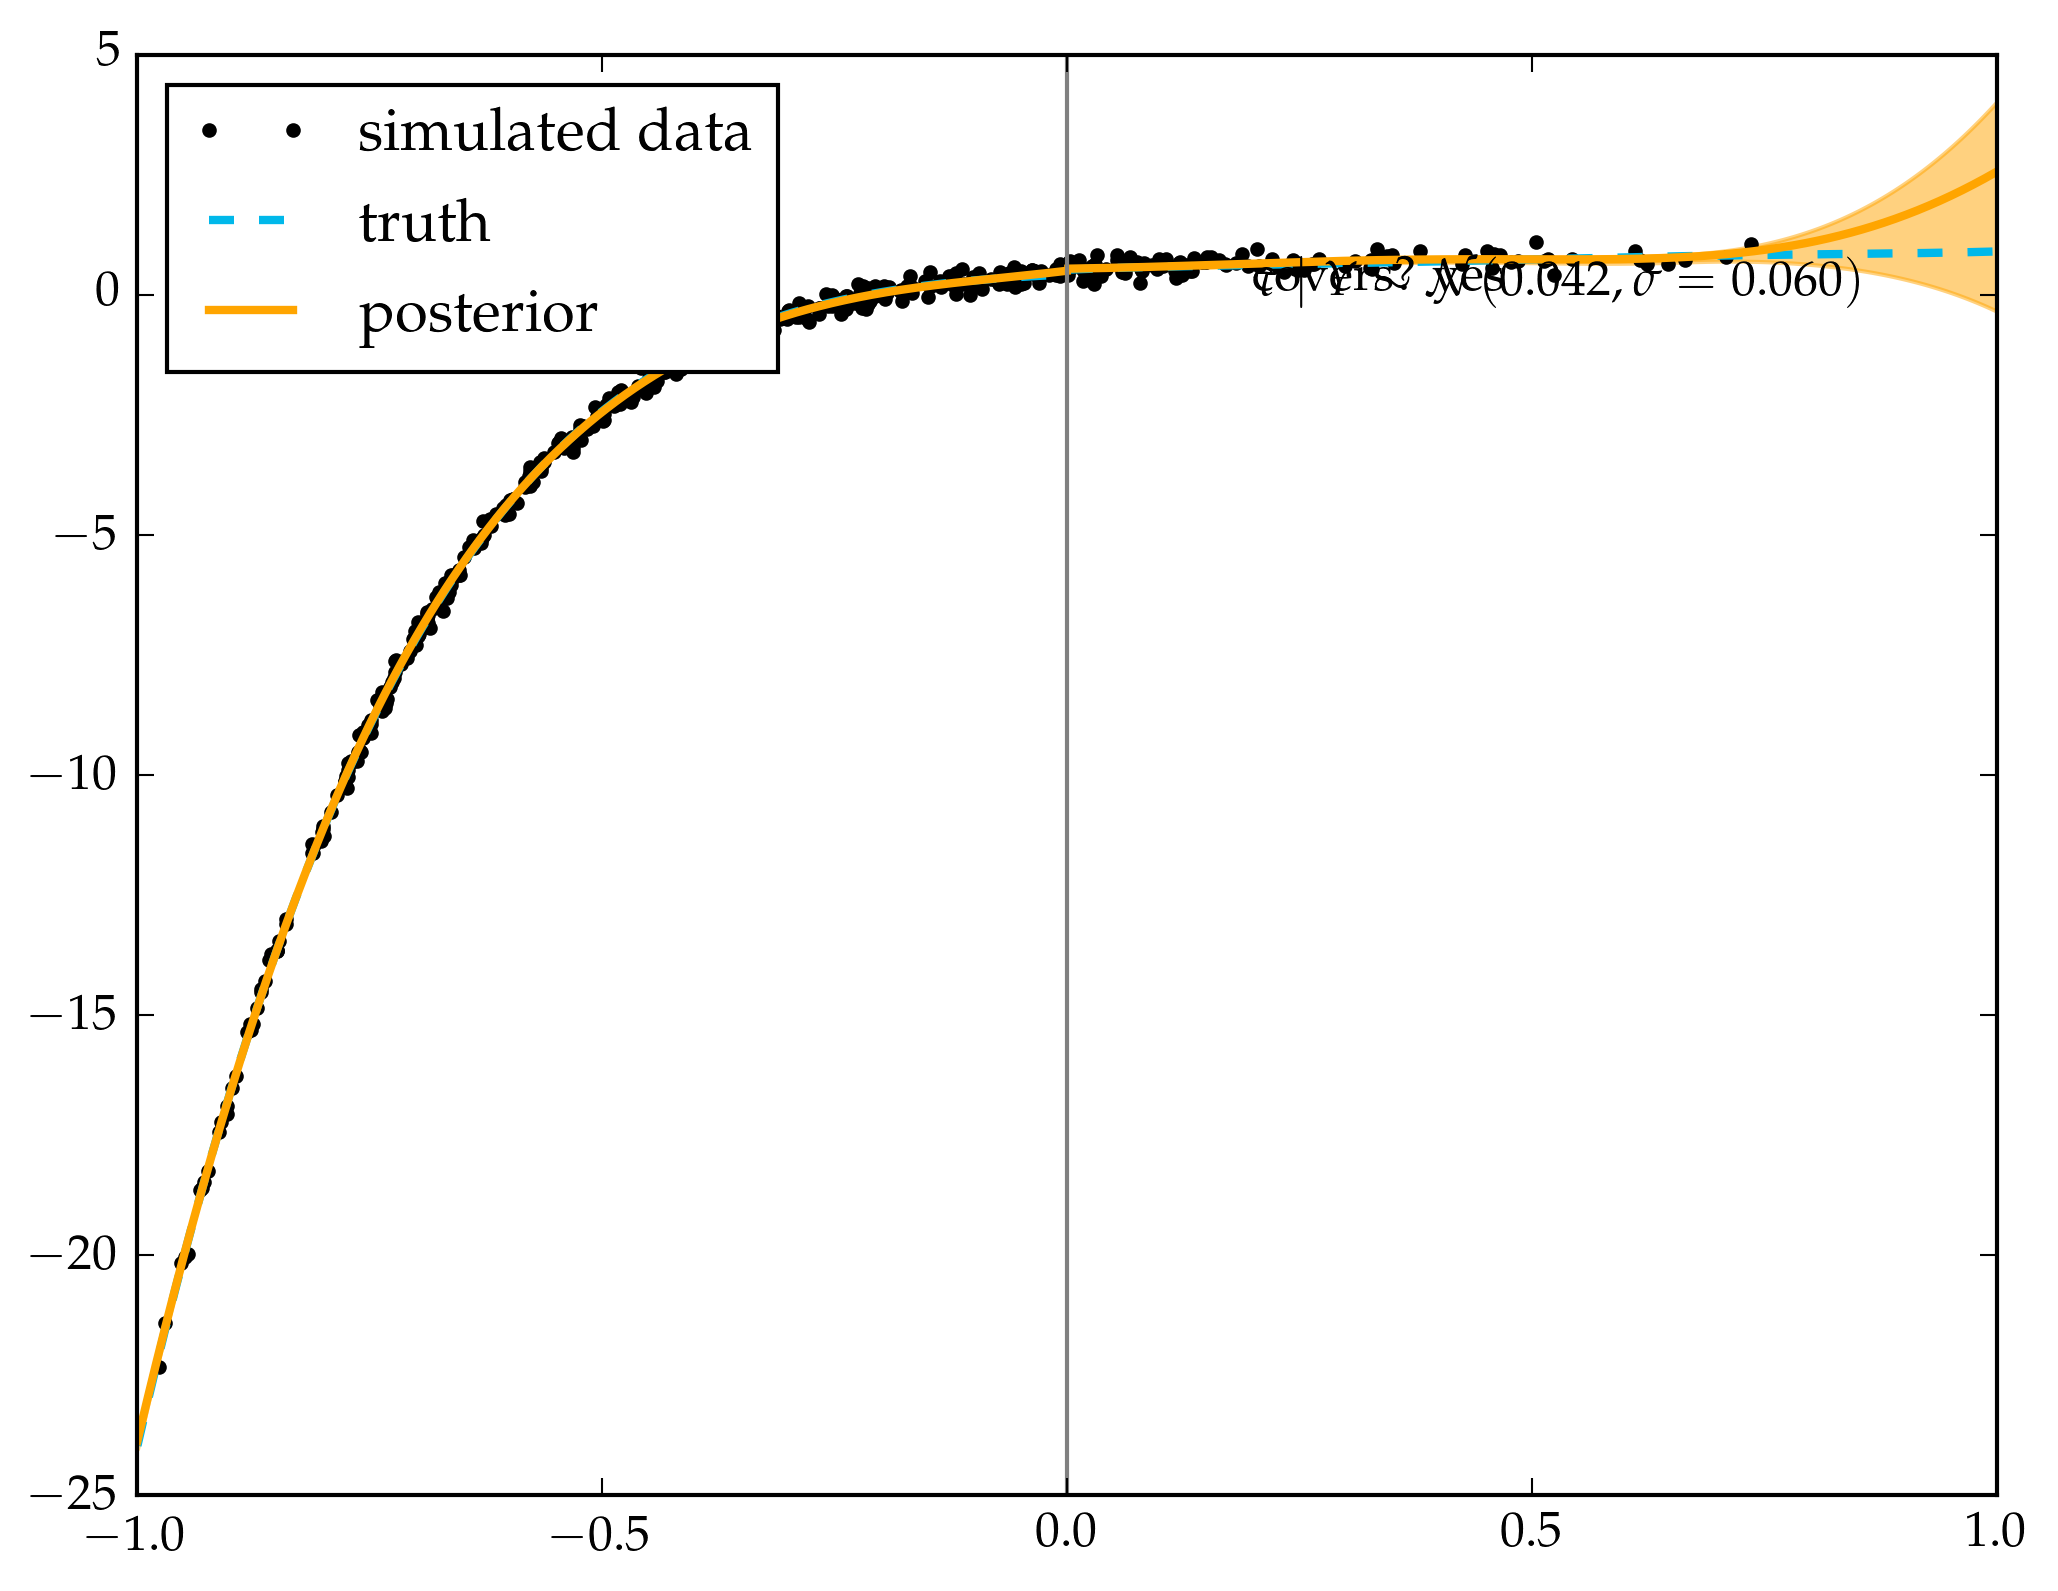

PyObject <matplotlib.text.Text object at 0x31c754890>

In [91]:
plot_sim("cate1", 38, 0.0, :meankern, cate1_truth)

In [124]:
@time loops_sims("cate1", 0.0, cate1_left, cate1_right, :fixedmean)

in callback catch
in callback catch
in callback catch
in callback catch
in callback catch
in callback catch
in callback catch
in callback catch
in callback catch
10...
in callback catch
in callback catch
in callback catch
in callback catch
in callback catch
in callback catch
in callback catch
in callback catch
in callback catch
in callback catch
20...
in callback catch
in callback catch
in callback catch
in callback catch
in callback catch
in callback catch
in callback catch
in callback catch
in callback catch
in callback catch
30...
in callback catch
in callback catch
in callback catch
in callback catch
in callback catch
in callback catch
in callback catch
in callback catch
in callback catch
in callback catch
40...
in callback catch
in callback catch
in callback catch
in callback catch
in callback catch
in callback catch
in callback catch
in callback catch
in callback catch
in callback catch
50...
in callback catch
in callback catch
in callback catch
in callback catch
in callback catc

In [125]:
@time loops_sims("cate1", 0.0, cate1_left, cate1_right, :meankern)

10...
20...
30...
40...
50...
60...
70...
80...
90...
100...
110...
120...
130...
140...
150...
160...
170...
180...
190...
200...
210...
220...
230...
240...
250...
260...
270...
280...
290...
300...
310...
320...
330...
340...
350...
360...
370...
380...
390...
400...
410...
420...
430...
440...
450...
460...
470...
480...
490...
500...
510...
520...
530...
540...
550...
560...
570...
580...
590...
600...
610...
620...
630...
640...
650...
660...
670...
680...
690...
700...
710...
720...
730...
740...
750...
760...
770...
780...
790...
800...
810...
820...
830...
840...
850...
860...
870...
880...
890...
900...
in callback catch
910...
920...
930...
940...
950...
960...
970...
980...
990...
1000...
bias=-0.0082
RMSE=0.066
93.8% coverage
593.279646 seconds (87.27 M allocations: 313.207 GB, 6.87% gc time)


## Cate 2

In [94]:
cate2_left(x::Real) = 0.42 + 0.84 * x + 7.99 * x^3 - 9.01 * x^4 + 3.56 * x^5
cate2_right(x::Real) = 0.1+cate2_left(x)
cate2_truth(x::Real) = x<zero(x) ? cate2_left(x) : cate2_right(x)

cate2_truth (generic function with 1 method)

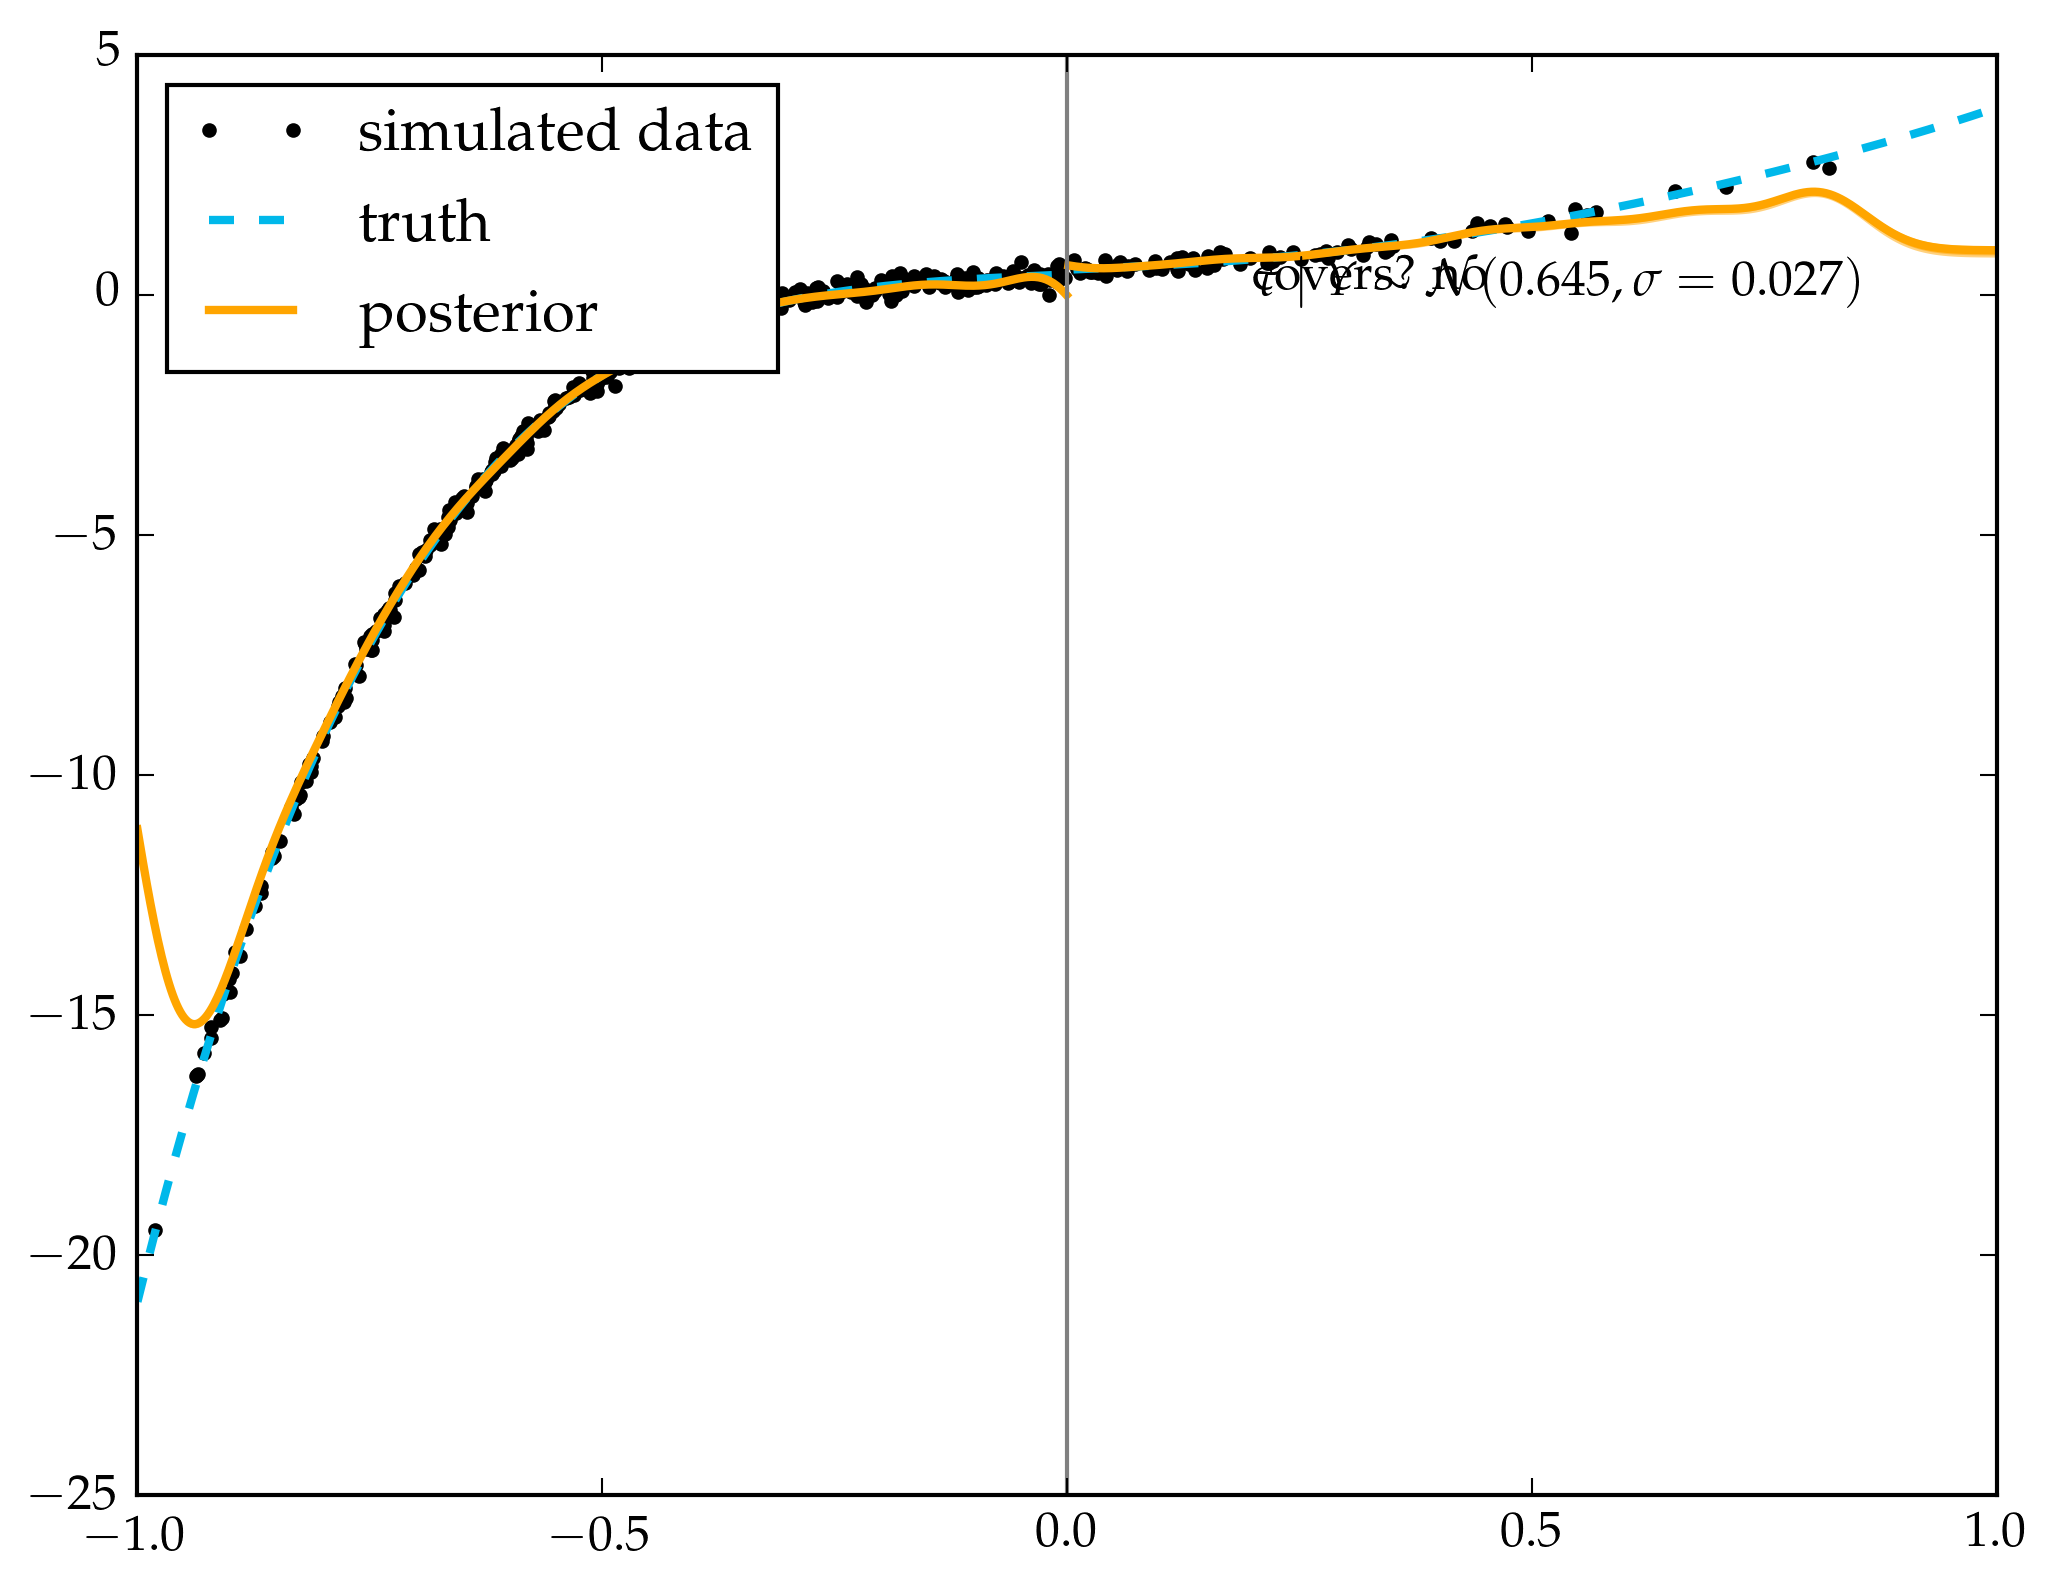

in callback catch


PyObject <matplotlib.text.Text object at 0x321526f50>

In [95]:
plot_sim("cate2", 5, 0.0, :fixedmean, cate2_truth)

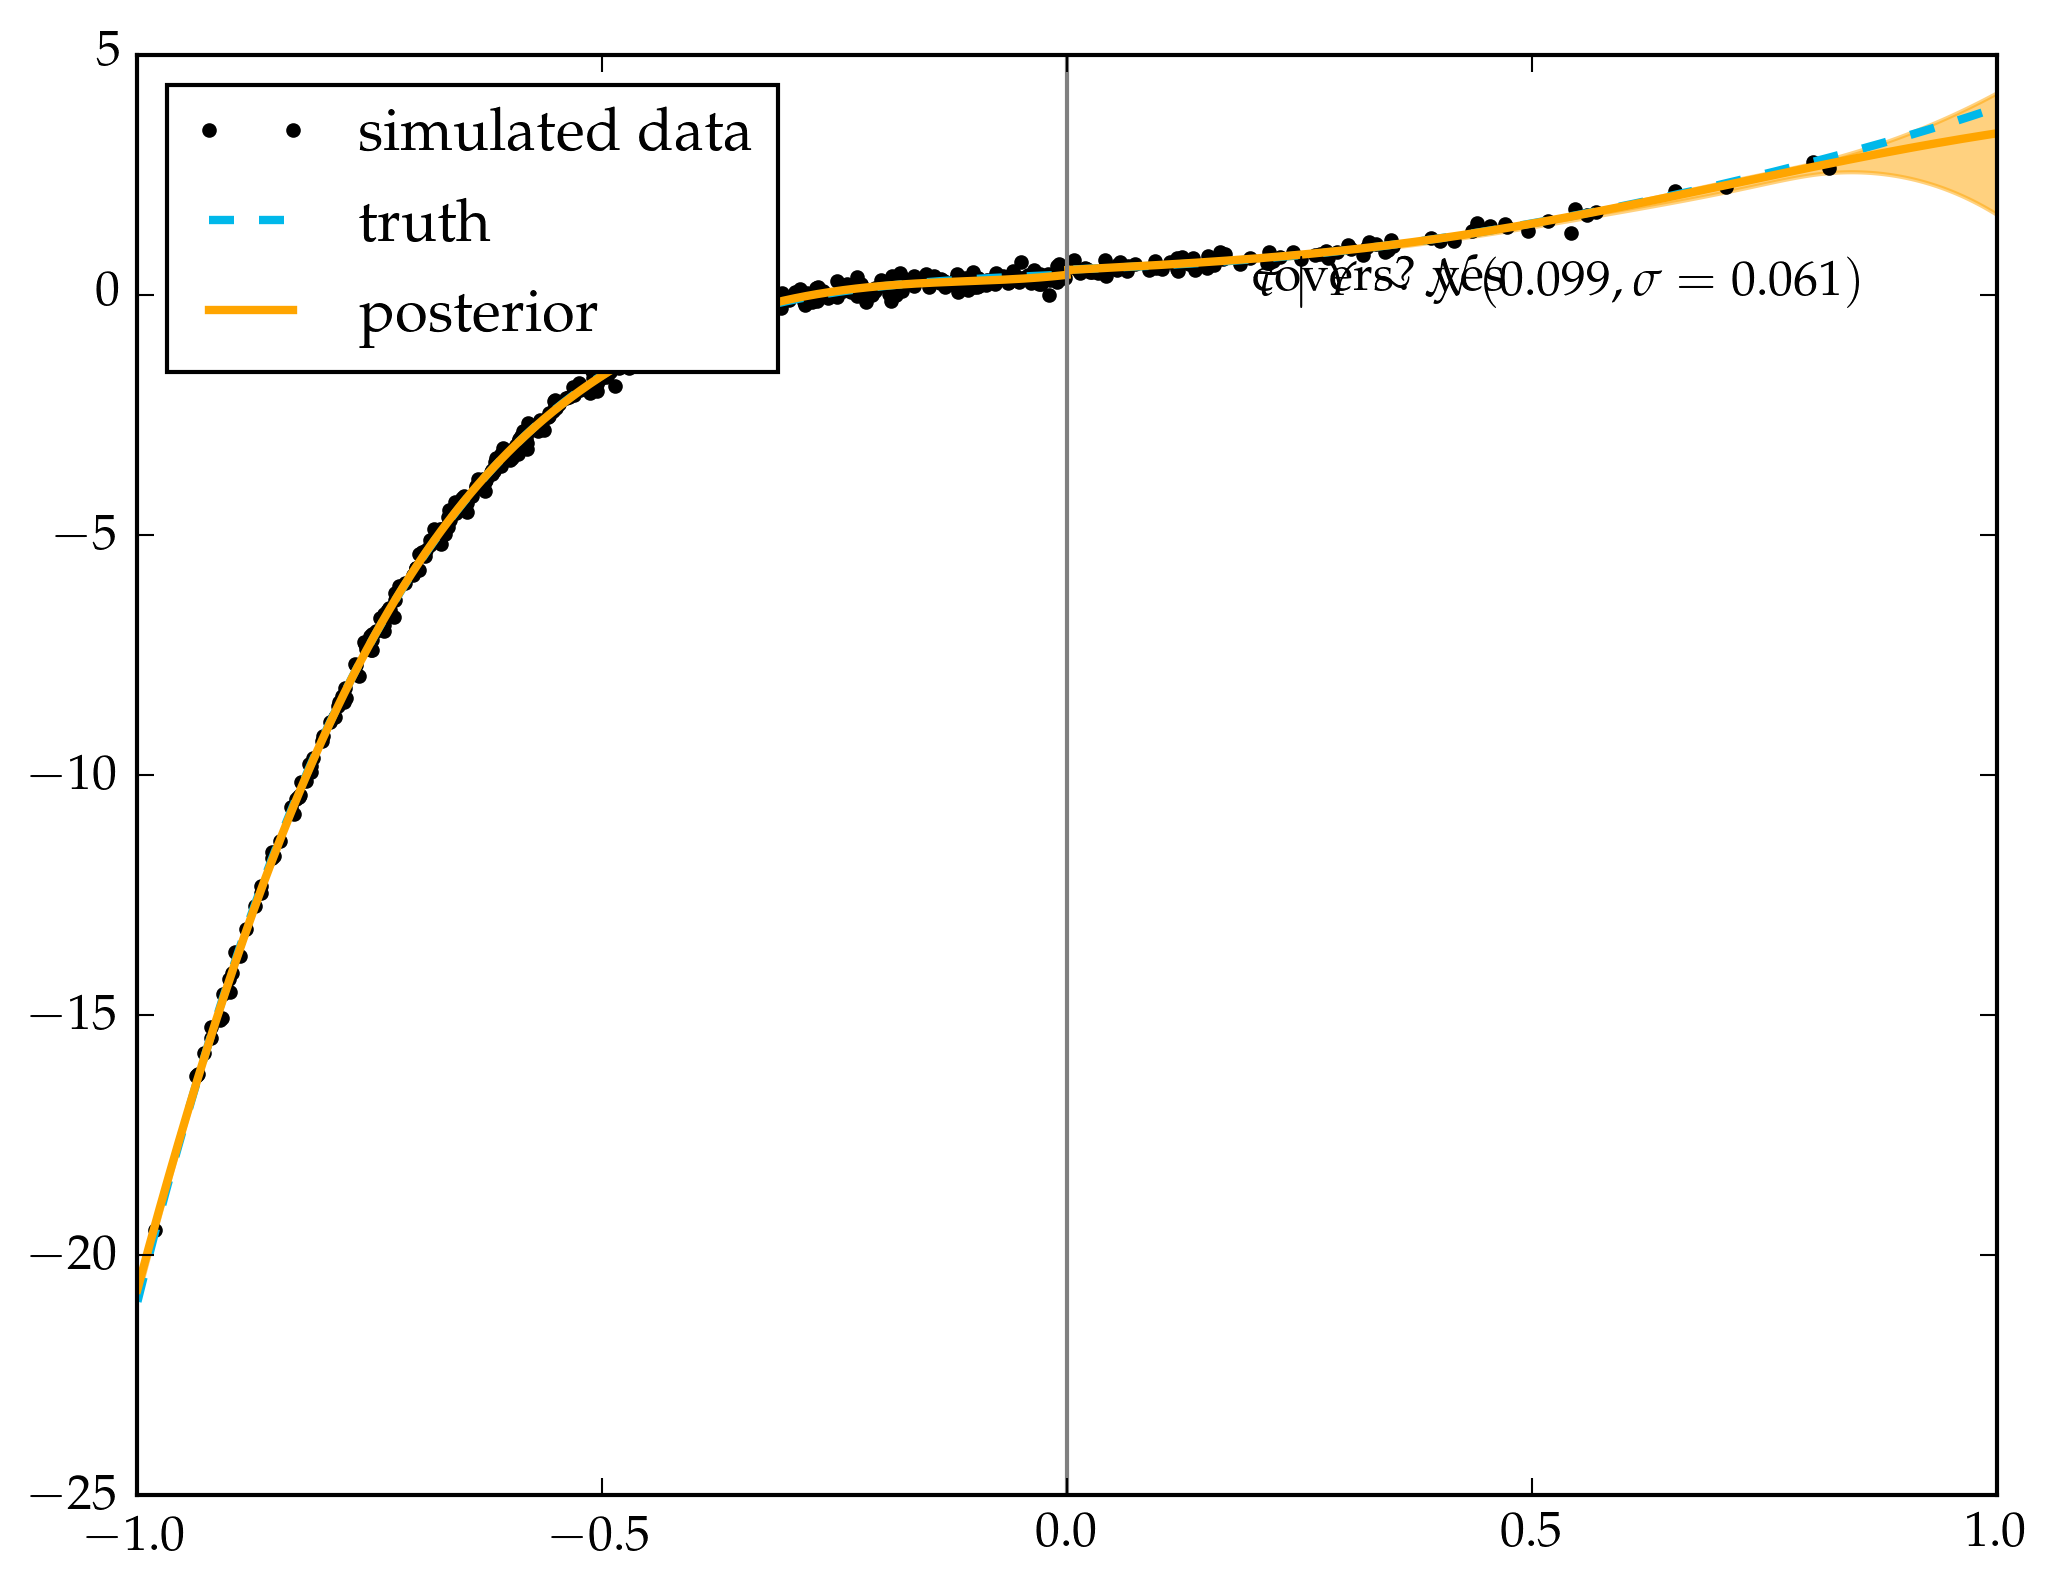

PyObject <matplotlib.text.Text object at 0x320835650>

In [96]:
plot_sim("cate2", 5, 0.0, :meankern, cate2_truth)

In [128]:
@time loops_sims("cate2", 0.0, cate2_left, cate2_right, :fixedmean)

in callback catch
in callback catch
in callback catch
in callback catch
in callback catch
in callback catch
in callback catch
in callback catch
in callback catch
10...
in callback catch
in callback catch
in callback catch
in callback catch
in callback catch
in callback catch
in callback catch
in callback catch
in callback catch
in callback catch
20...
in callback catch
in callback catch
in callback catch
in callback catch
in callback catch
in callback catch
in callback catch
in callback catch
in callback catch
in callback catch
30...
in callback catch
in callback catch
in callback catch
in callback catch
in callback catch
in callback catch
in callback catch
in callback catch
in callback catch
in callback catch
40...
in callback catch
in callback catch
in callback catch
in callback catch
in callback catch
in callback catch
in callback catch
in callback catch
in callback catch
in callback catch
50...
in callback catch
in callback catch
in callback catch
in callback catch
in callback catc

In [129]:
@time loops_sims("cate2", 0.0, cate1_left, cate1_right, :meankern)

10...
20...
30...
40...
50...
60...
70...
80...
90...
100...
110...
120...
130...
140...
150...
160...
170...
180...
190...
200...
210...
220...
230...
240...
250...
260...
270...
in callback catch
in callback catch
280...
290...
300...
310...
320...
330...
340...
350...
360...
370...
380...
390...
400...
410...
420...
430...
440...
450...
460...
470...
480...
490...
500...
510...
520...
530...
540...
550...
560...
570...
580...
590...
600...
610...
620...
630...
640...
650...
660...
670...
680...
690...
700...
710...
720...
730...
740...
750...
760...
770...
780...
790...
800...
810...
820...
830...
840...
850...
860...
870...
880...
890...
900...
910...
920...
930...
940...
950...
960...
970...
980...
990...
1000...
bias=-0.0084
RMSE=0.065
93.9% coverage
571.669308 seconds (87.43 M allocations: 313.790 GB, 6.87% gc time)


## Cubic

In [47]:
cubic_left(x::Real) = 3*x^3
cubic_right(x::Real) = 4*x^3
cubic_truth(x::Real) = x<zero(x) ? cubic_left(x) : cubic_right(x)

cubic_truth (generic function with 1 method)

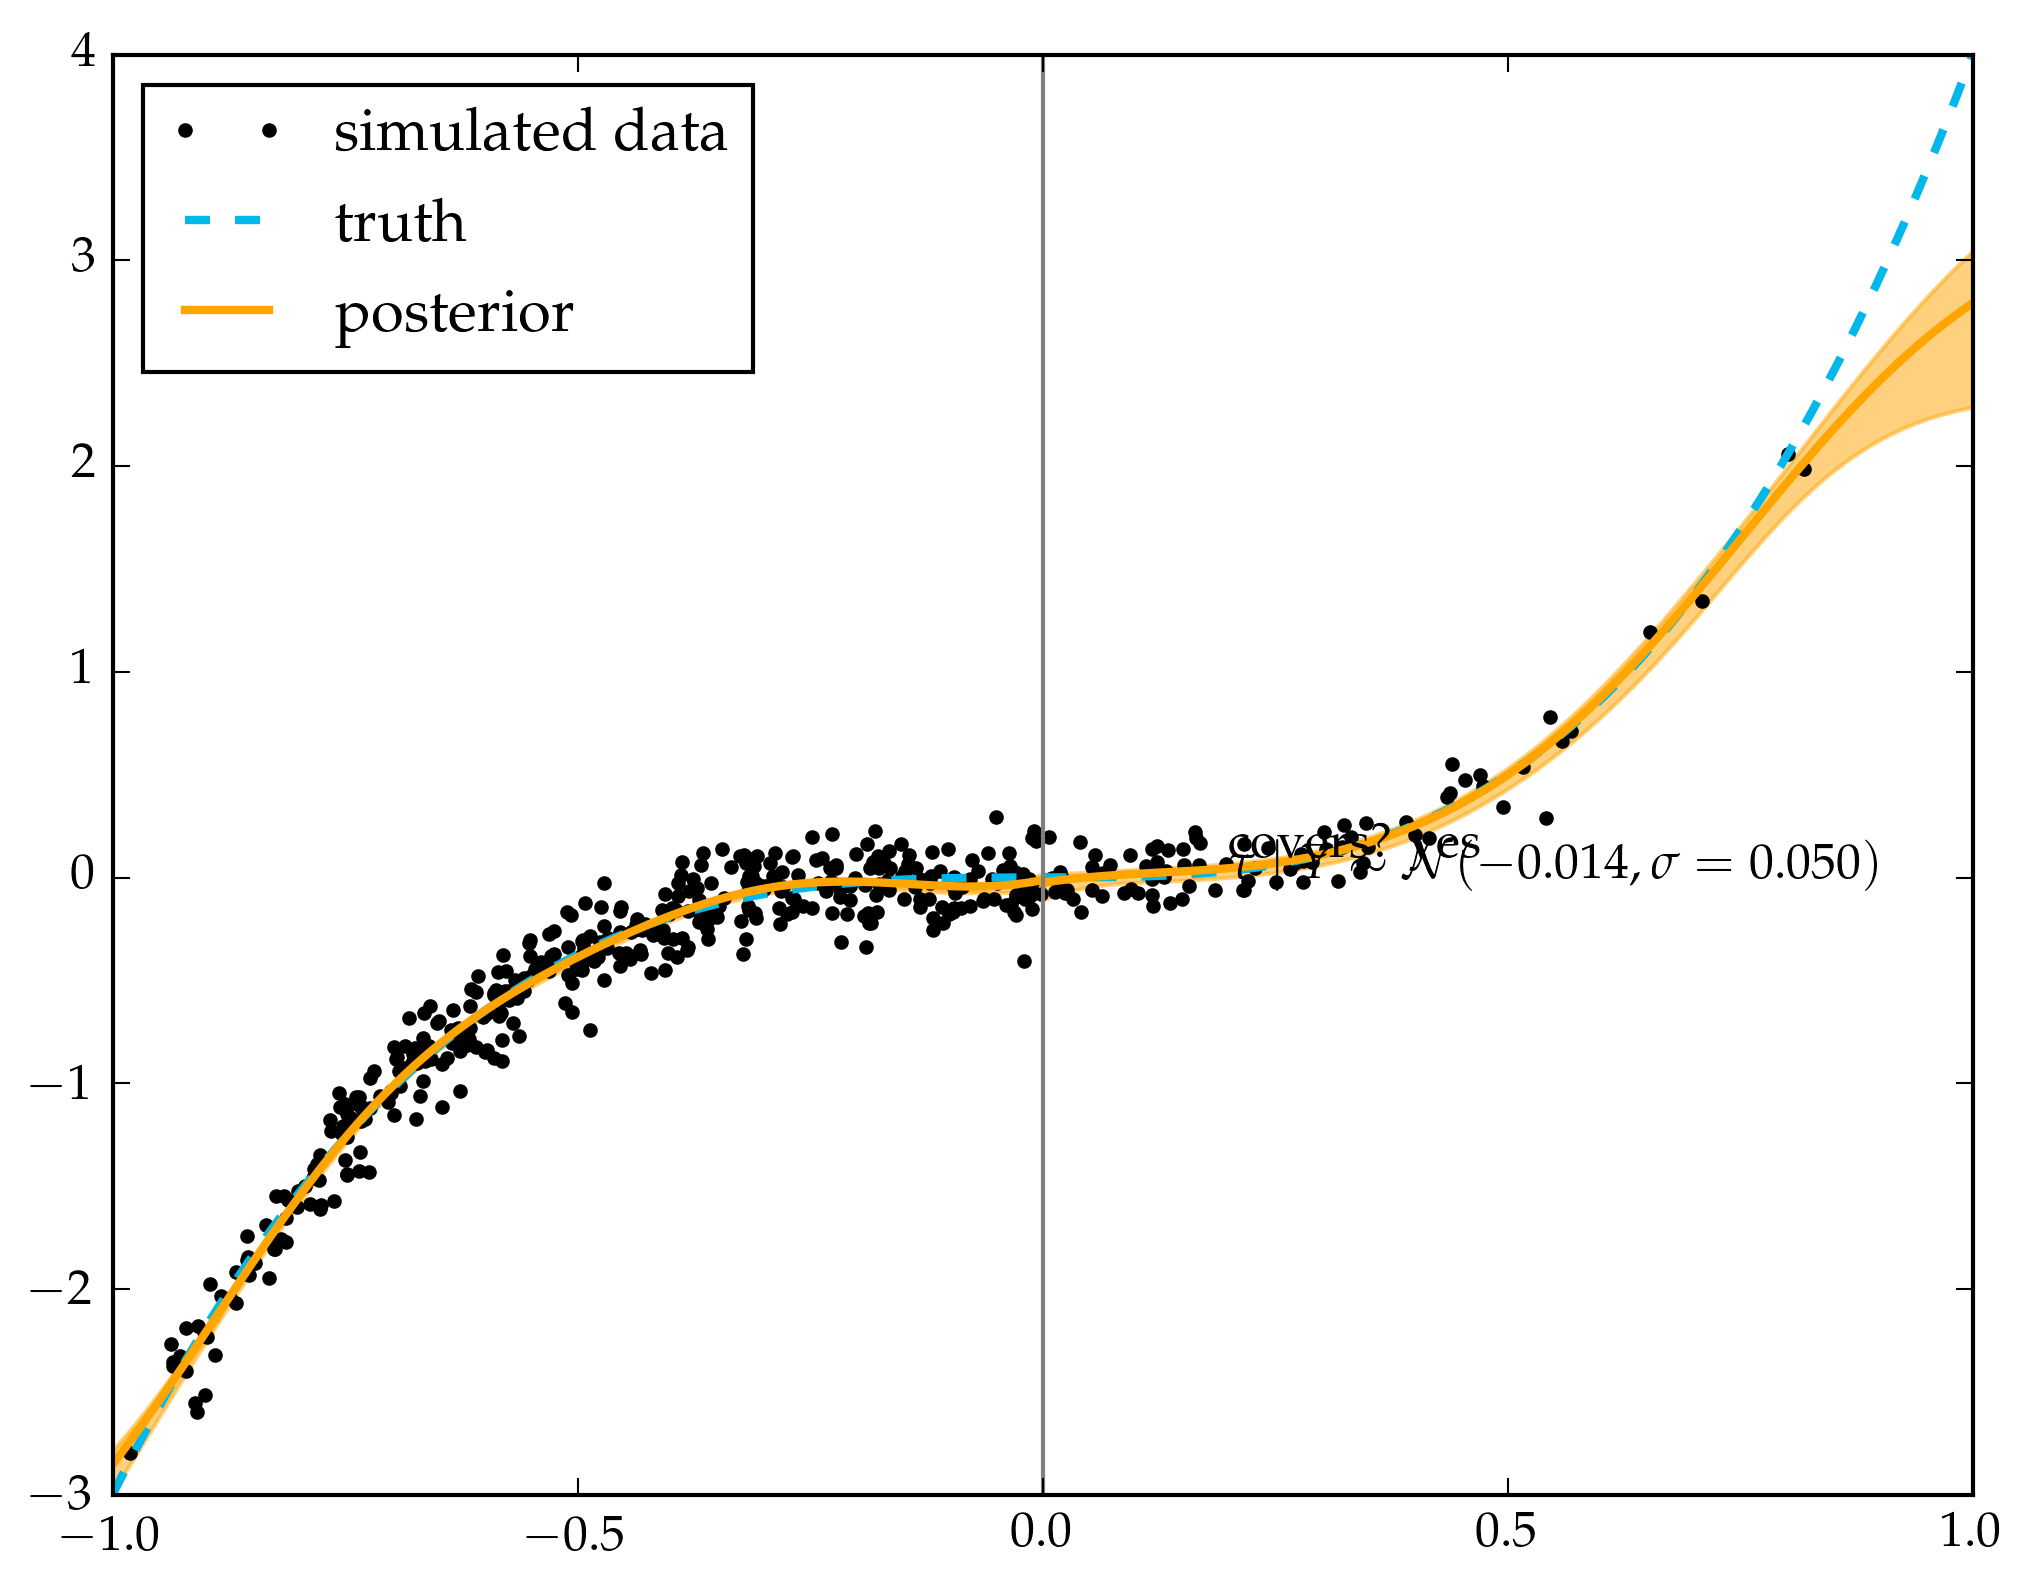

PyObject <matplotlib.text.Text object at 0x322a2a4d0>

In [48]:
plot_sim("cubic", 5, 0.0, :fixedmean, cubic_truth)

In [49]:
@time loops_sims("cubic", 0.0, cubic_left, cubic_right, :fixedmean)

10...
20...
30...
40...
50...
60...
70...
80...
90...
100...
110...
120...
130...
140...
150...
160...
170...
180...
190...
200...
210...
220...
230...
240...
250...
260...
270...
280...
290...
300...
310...
320...
330...
340...
350...
360...
370...
380...
390...
400...
410...
420...
430...
440...
450...
460...
470...
480...
490...
500...
510...
520...
530...
540...
550...
560...
570...
580...
590...
600...
610...
620...
630...
640...
650...
660...
670...
680...
690...
700...
710...
720...
730...
740...
750...
760...
770...
780...
790...
800...
810...
820...
830...
840...
850...
860...
870...
880...
890...
900...
910...
920...
930...
940...
950...
960...
970...
980...
990...
1000...
bias=-0.0272
RMSE=0.057
91.1% coverage
502.545265 seconds (202.47 M allocations: 17.587 GB, 0.61% gc time)


In [50]:
@time loops_sims("cubic", 0.0, cubic_left, cubic_right, :meankern)

10...
20...
30...
40...
50...
60...
70...
80...
90...
100...
110...
120...
130...
140...
150...
160...
170...
180...
190...
200...
210...
220...
230...
240...
250...
260...
270...
280...
290...
300...
310...
320...
330...
340...
350...
360...
370...
380...
390...
400...
410...
420...
430...
440...
450...
460...
470...
480...
490...
500...
510...
520...
530...
540...
550...
560...
570...
580...
590...
600...
610...
620...
630...
640...
650...
660...
670...
680...
690...
700...
710...
720...
730...
740...
750...
760...
770...
780...
790...
800...
810...
820...
830...
840...
850...
860...
870...
880...
890...
900...
910...
920...
930...
940...
950...
960...
970...
980...
990...
1000...
bias=-0.0011
RMSE=0.049
95.3% coverage
909.316299 seconds (129.59 M allocations: 476.185 GB, 5.38% gc time)


## Lee

In [126]:
@time loops_sims("lee", 0.0, lee_left, lee_right, :fixedmean)

10...
20...
30...
40...
50...
60...
70...
80...
90...
100...
110...
120...
130...
140...
150...
160...
170...
180...
190...
200...
210...
220...
230...
240...
250...
260...
270...
280...
290...
300...
310...
320...
330...
340...
350...
360...
370...
380...
390...
400...
410...
420...
430...
440...
450...
460...
470...
480...
490...
500...
510...
520...
530...
540...
550...
560...
570...
580...
590...
600...
610...
620...
630...
640...
650...
660...
670...
680...
690...
700...
710...
720...
730...
740...
750...
760...
770...
780...
790...
800...
810...
820...
830...
840...
850...
860...
870...
880...
890...
900...
910...
920...
930...
940...
950...
960...
970...
980...
990...
1000...
bias=0.0440
RMSE=0.058
76.4% coverage
446.595557 seconds (157.44 M allocations: 15.128 GB, 0.60% gc time)


In [ ]:
@time loops_sims("lee", 0.0, lee_left, lee_right, :meankern)

## Ludwig

In [64]:
ludwig_left(x::Real) = 3.71 + 2.30*x + 3.28*x^2 + 1.45*x^3 + 0.23*x^4 + 0.03*x^5
ludwig_right(x::Real) = 0.36 + 18.49*x - 54.81*x^2 + 74.30*x^3 - 45.02*x^4 + 9.83*x^5
ludwig_truth(x::Real) = x<zero(x) ? ludwig_left(x) : ludwig_right(x)

ludwig_truth (generic function with 1 method)

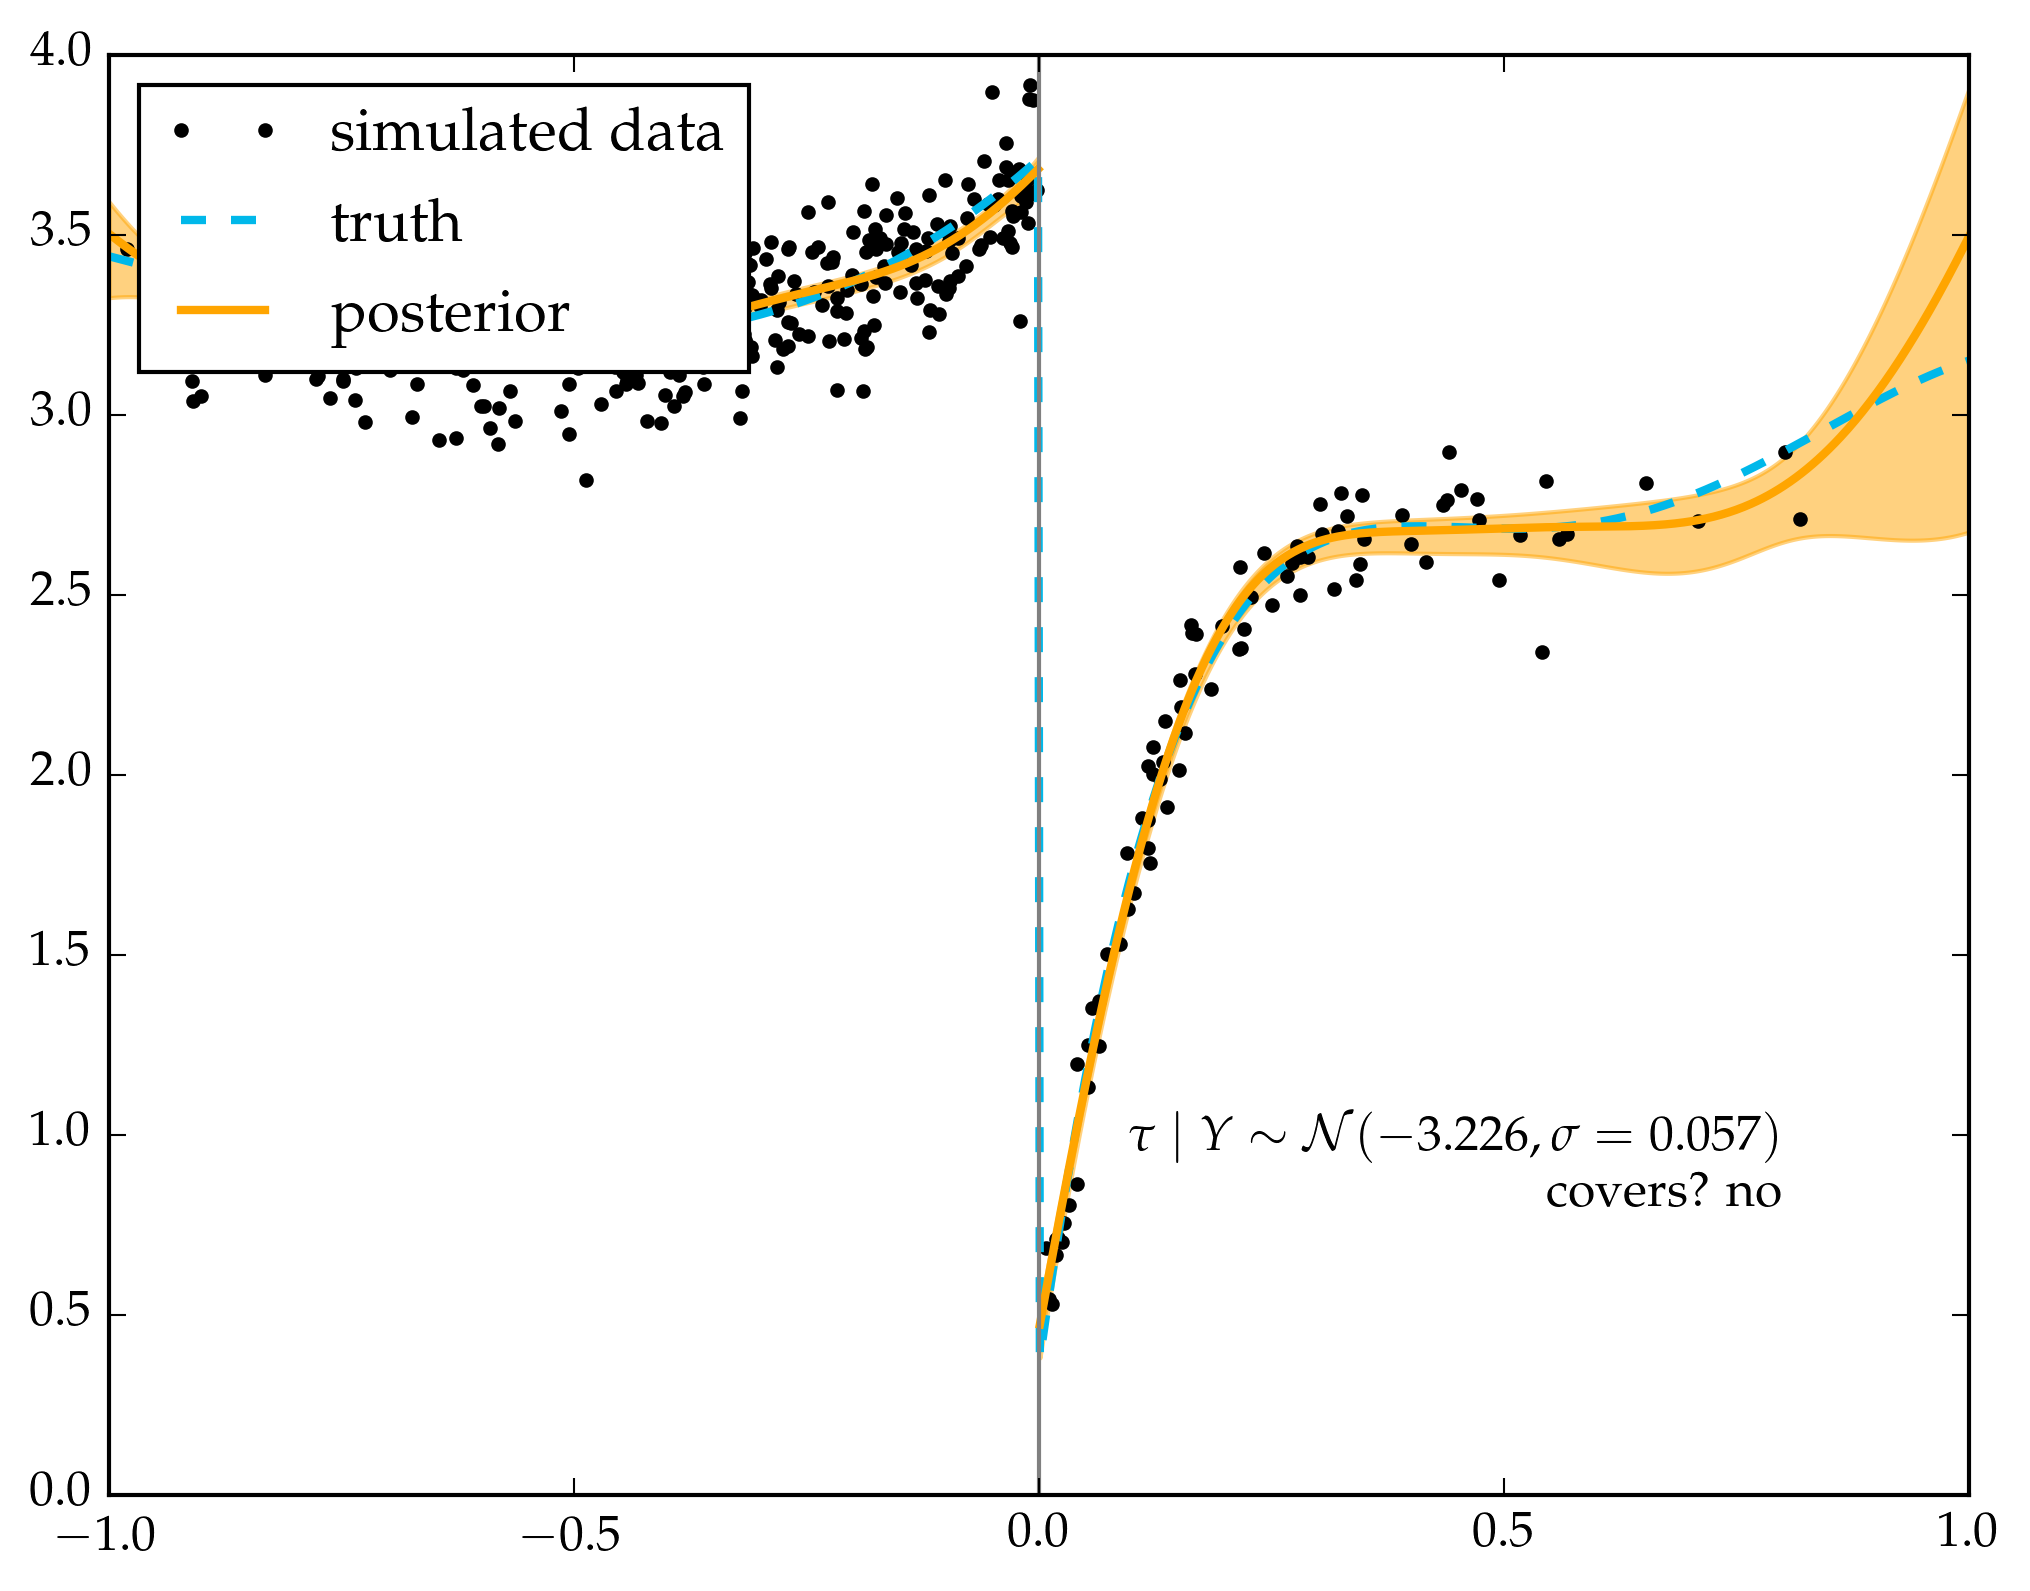

PyObject <matplotlib.text.Text object at 0x3232e93d0>

In [74]:
plot_sim("ludwig", 5, 0.0, :fixedmean, ludwig_truth)

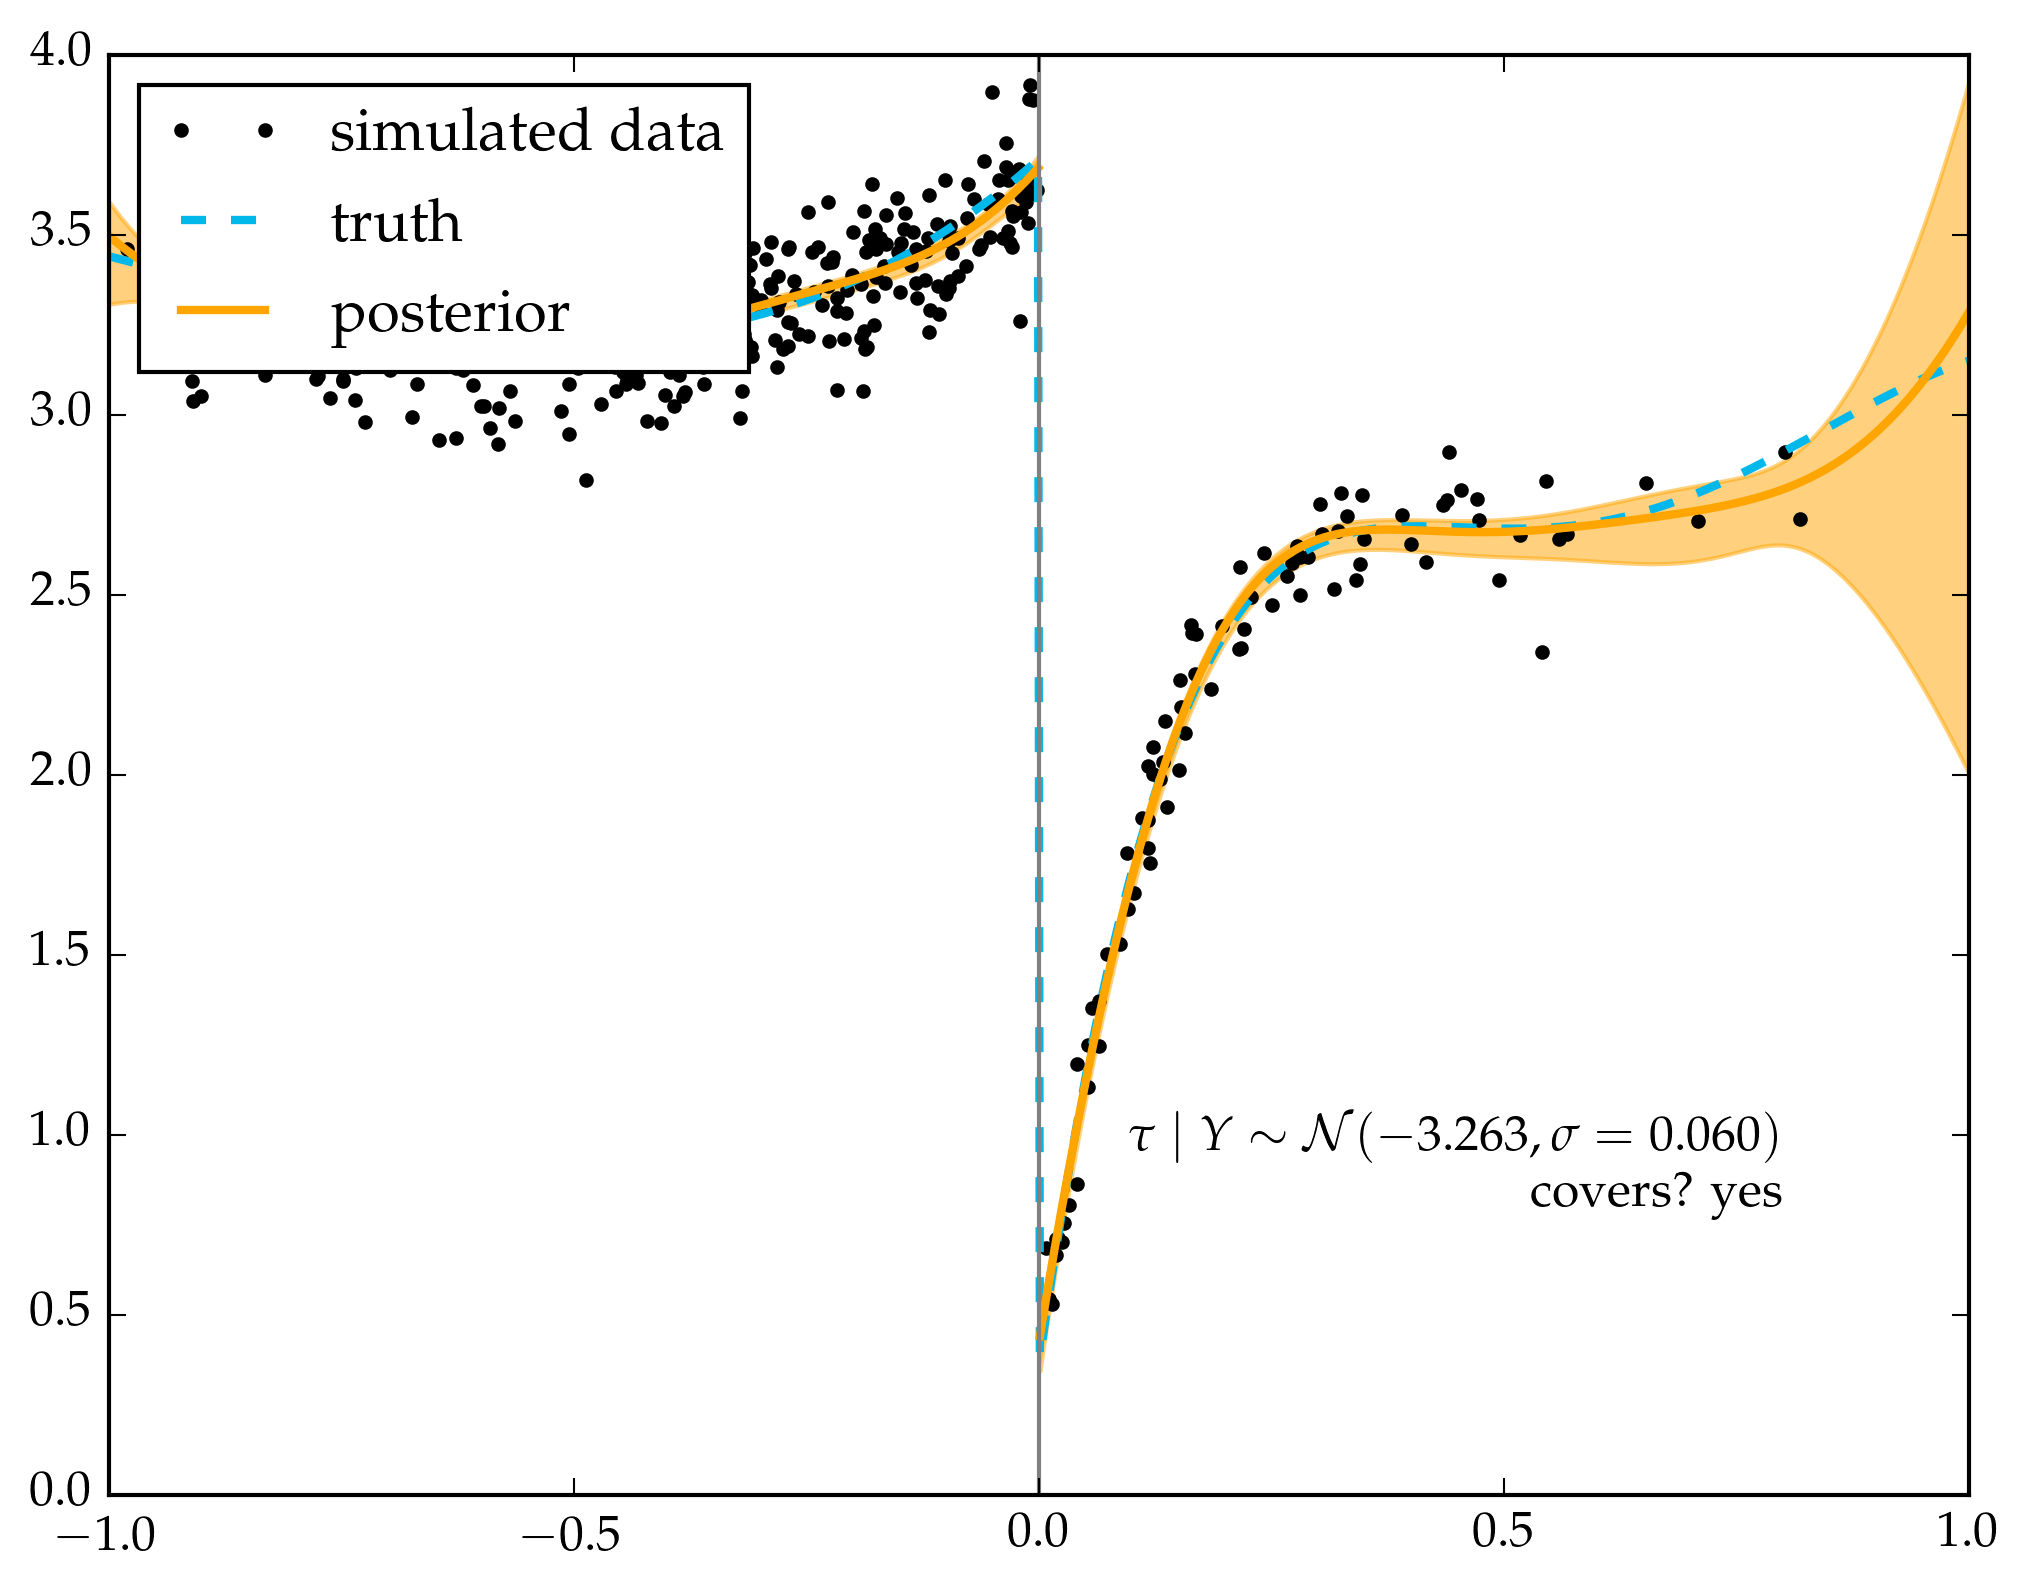

PyObject <matplotlib.text.Text object at 0x326f5d2d0>

In [75]:
plot_sim("ludwig", 5, 0.0, :meankern, ludwig_truth)

In [76]:
@time loops_sims("ludwig", 0.0, ludwig_left, ludwig_right, :fixedmean)

10...
in callback catch
20...
30...
40...
50...
60...
70...
80...
90...
100...
110...
120...
130...
140...
150...
160...
170...
180...
190...
200...
210...
220...
in callback catch
230...
240...
250...
260...
270...
280...
290...
300...
310...
320...
in callback catch
330...
340...
in callback catch
350...
360...
370...
380...
390...
400...
410...
in callback catch
420...
430...
440...
450...
460...
470...
480...
490...
500...
510...
in callback catch
520...
530...
in callback catch
540...
550...
560...
570...
580...
590...
600...
610...
in callback catch
620...
630...
in callback catch
640...
650...
660...
670...
680...
690...
700...
710...
720...
730...
740...
in callback catch
750...
760...
770...
in callback catch
780...
790...
800...
810...
820...
830...
840...
850...
860...
870...
880...
in callback catch
890...
900...
910...
920...
930...
940...
950...
960...
970...
980...
990...
1000...
bias=0.1141
RMSE=0.134
52.0% coverage
563.697387 seconds (211.74 M allocations: 18.105 GB, 0

In [77]:
@time loops_sims("ludwig", 0.0, ludwig_left, ludwig_right, :meankern)

10...
20...
30...
40...
50...
60...
70...
80...
90...
100...
110...
120...
130...
140...
150...
160...
170...
180...
190...
200...
210...
220...
230...
240...
250...
260...
270...
280...
290...
300...
310...
320...
330...
340...
350...
360...
370...
380...
390...
400...
410...
420...
430...
440...
450...
460...
470...
480...
490...
500...
510...
520...
530...
540...
550...
560...
570...
580...
590...
600...
610...
620...
630...
640...
650...
660...
670...
680...
690...
700...
710...
720...
730...
740...
750...
760...
770...
780...
790...
800...
810...
820...
830...
840...
850...
860...
870...
880...
890...
900...
910...
920...
930...
940...
950...
960...
970...
980...
990...
1000...
bias=0.0792
RMSE=0.103
71.2% coverage
700.900529 seconds (93.39 M allocations: 336.794 GB, 6.06% gc time)


## Curvature

In [56]:
curvature_left(x::Real) = 0.48 + 1.27 * x - 0.5*7.18*x^2 + 0.7*20.21*x^3 + 1.1*21.54*x^4 + 1.5*7.33*x^5
curvature_right(x::Real) = 0.52 + 0.84 * x - 0.1*3.00*x^2 - 0.3*7.99*x^3  - 0.1*9.01*x^4 + 3.56*x^5
curvature_truth(x::Real) = x<zero(x) ? curvature_left(x) : curvature_right(x)

curvature_truth (generic function with 1 method)

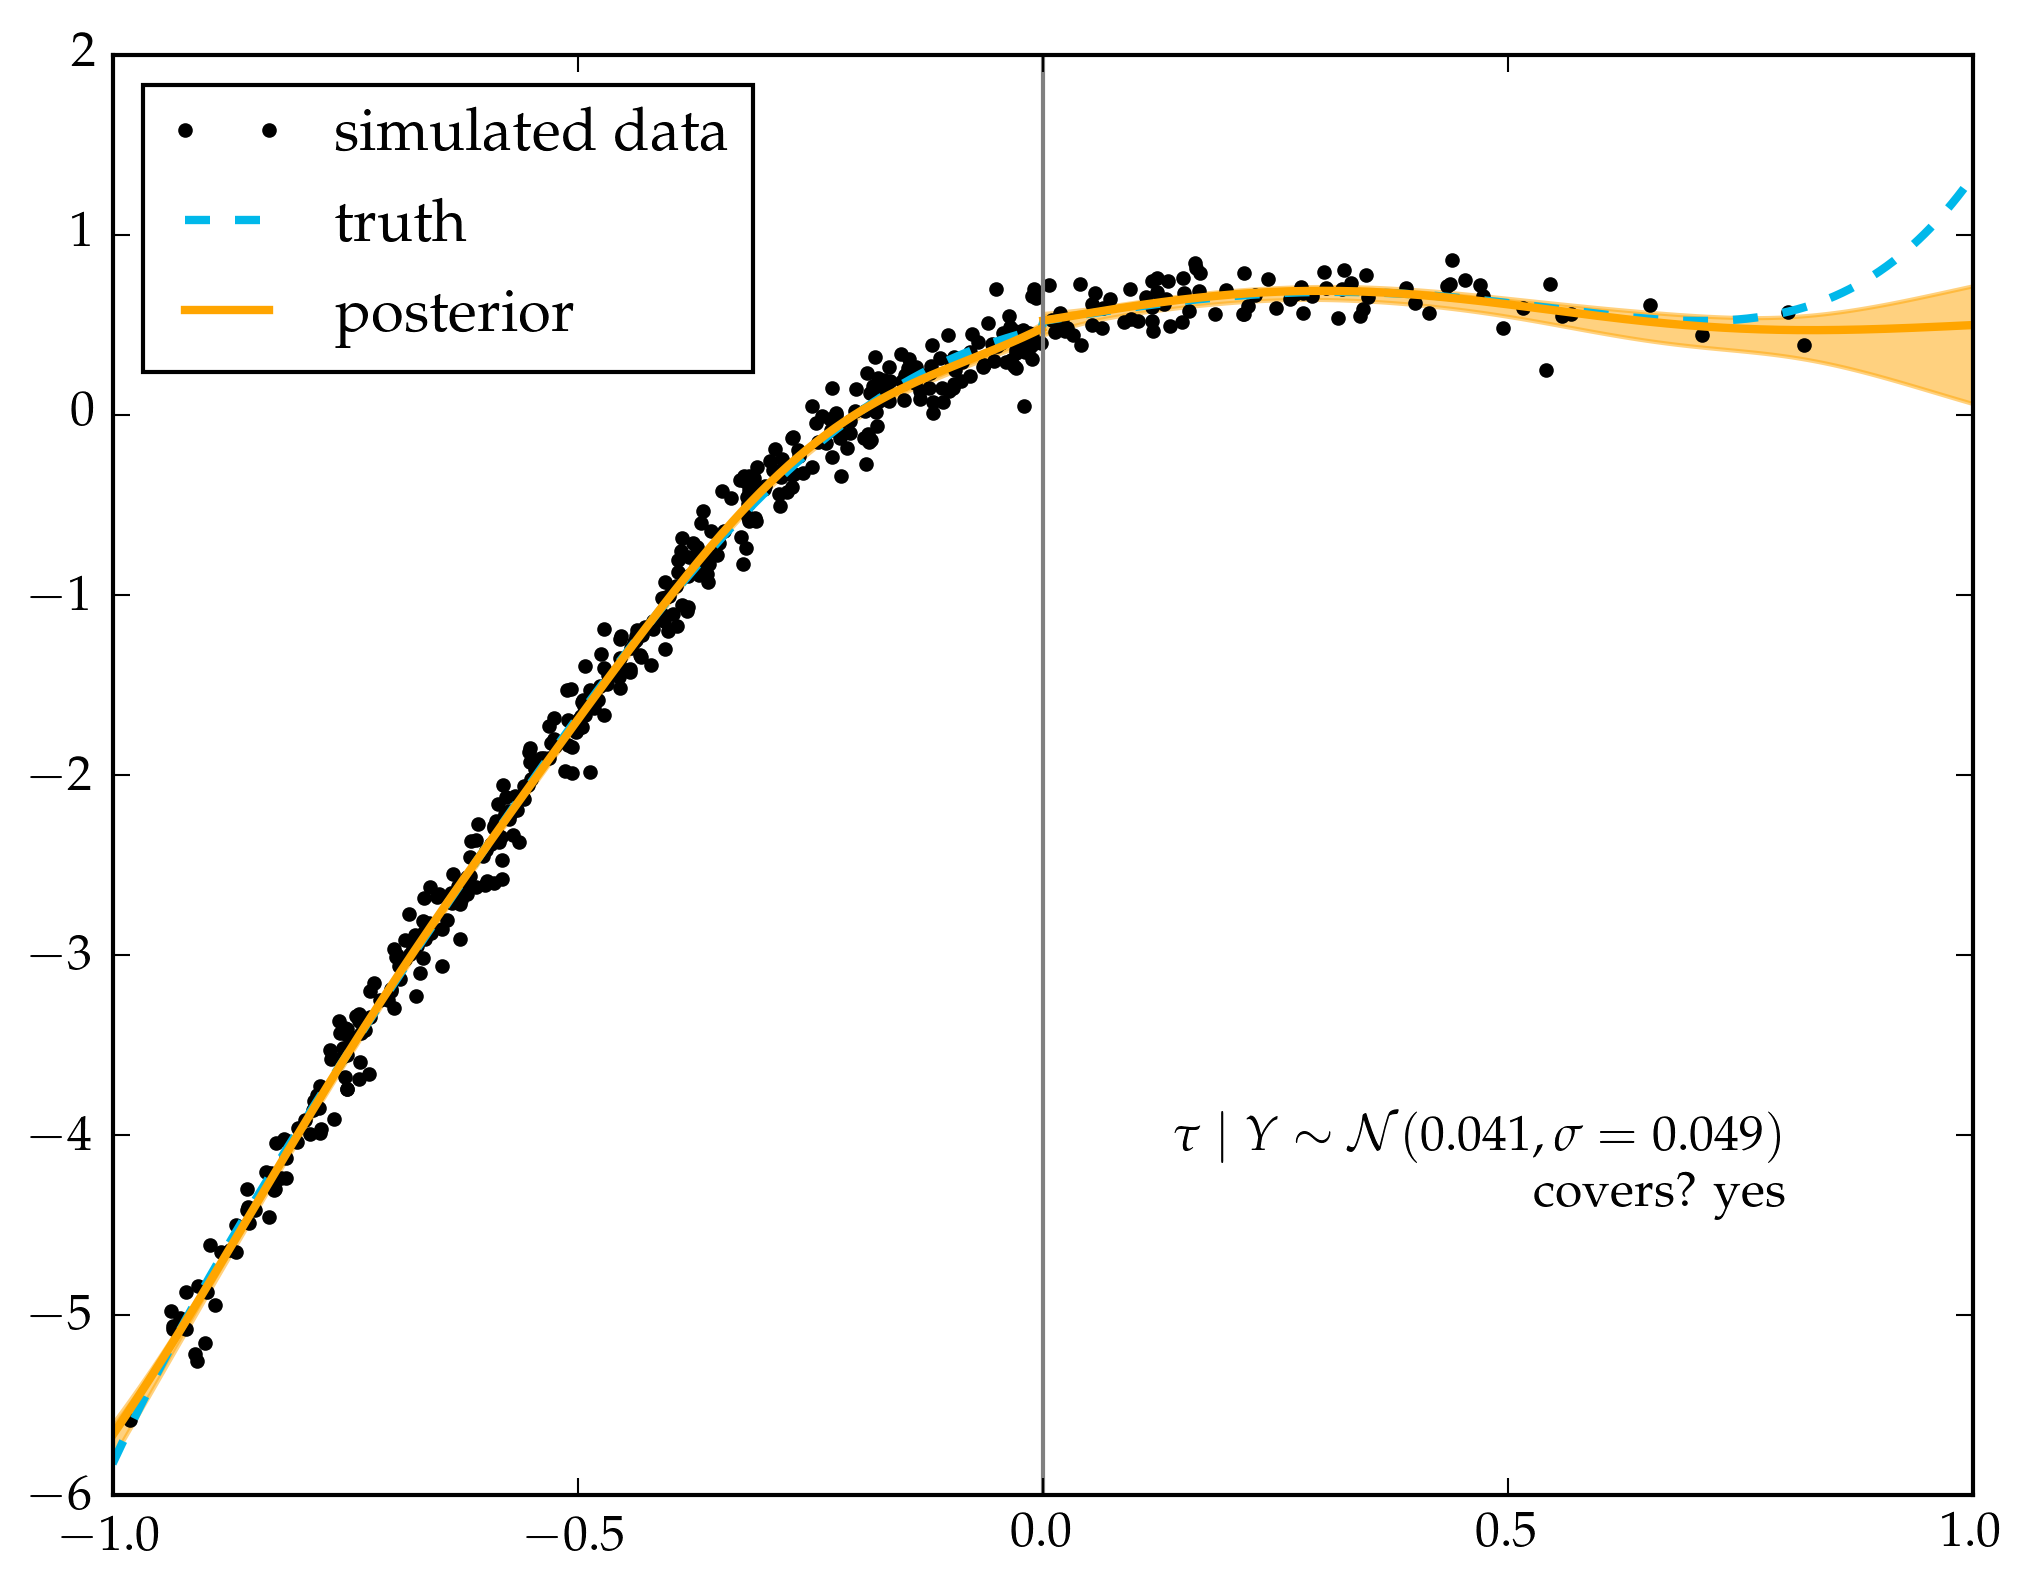

in callback catch


PyObject <matplotlib.text.Text object at 0x3224e7e90>

In [78]:
plot_sim("curvature", 5, 0.0, :fixedmean, curvature_truth)

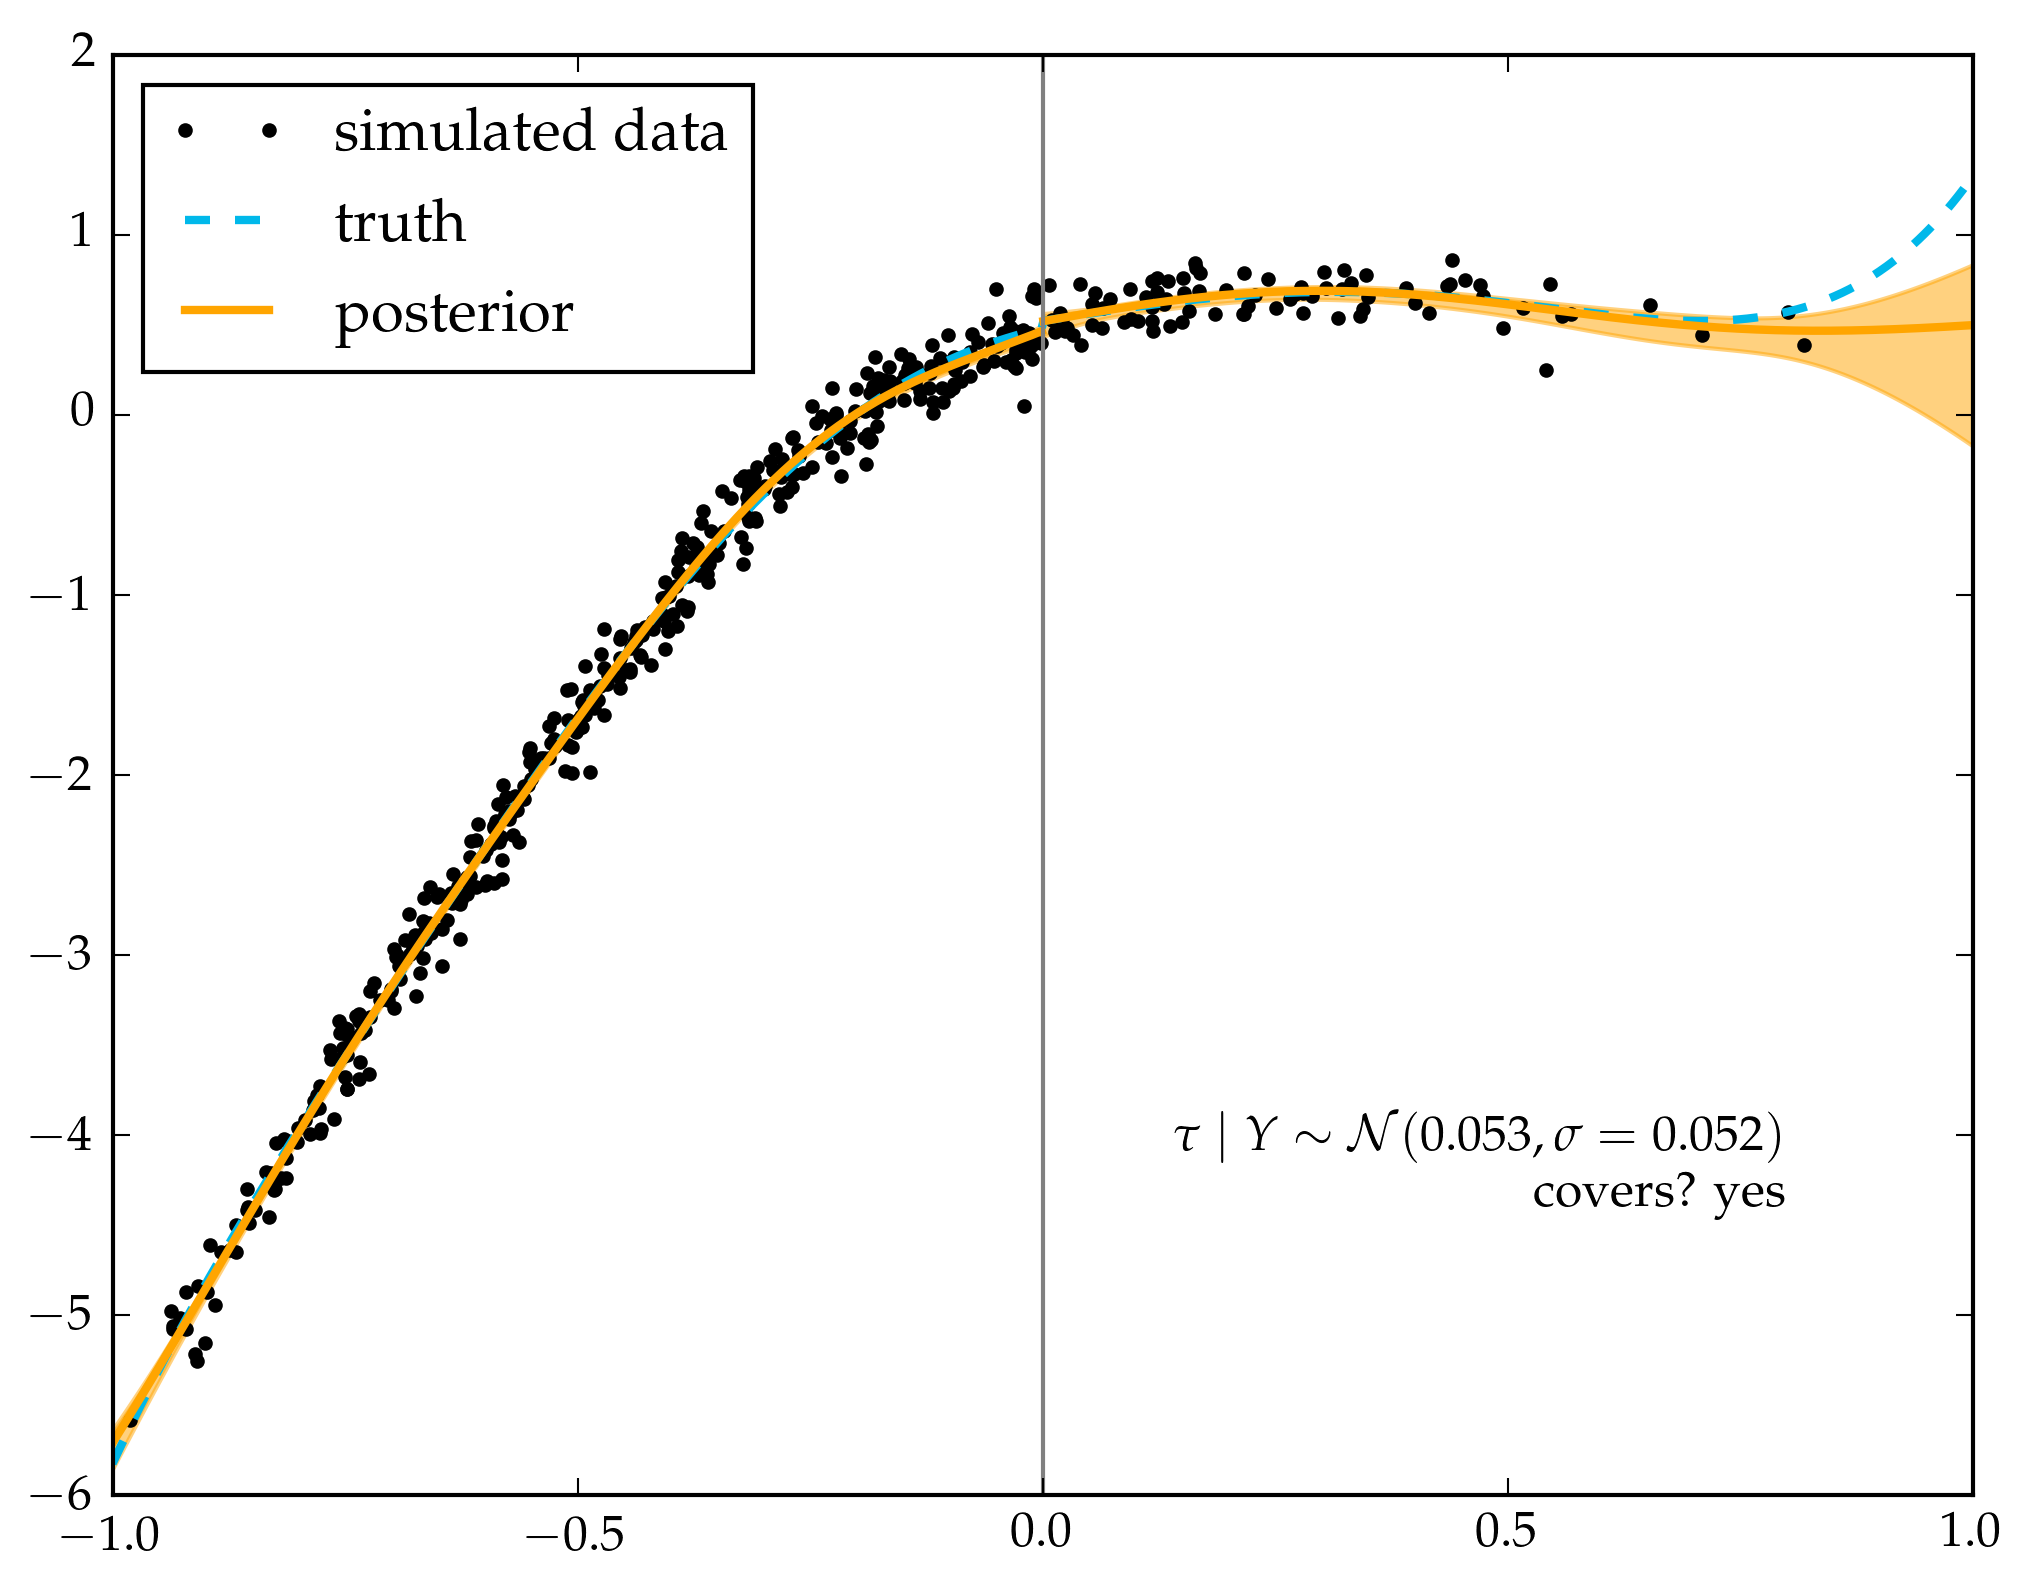

PyObject <matplotlib.text.Text object at 0x3268fd850>

In [79]:
plot_sim("curvature", 5, 0.0, :meankern, curvature_truth)

In [80]:
@time loops_sims("curvature", 0.0, curvature_left, curvature_right, :fixedmean)

in callback catch
in callback catch
in callback catch
in callback catch
in callback catch
in callback catch
in callback catch
in callback catch
in callback catch
10...
in callback catch
in callback catch
in callback catch
in callback catch
in callback catch
in callback catch
in callback catch
in callback catch
in callback catch
in callback catch
20...
in callback catch
in callback catch
in callback catch
in callback catch
in callback catch
in callback catch
in callback catch
in callback catch
in callback catch
in callback catch
30...
in callback catch
in callback catch
in callback catch
in callback catch
in callback catch
in callback catch
in callback catch
in callback catch
in callback catch
in callback catch
40...
in callback catch
in callback catch
in callback catch
in callback catch
in callback catch
in callback catch
in callback catch
in callback catch
in callback catch
in callback catch
50...
in callback catch
in callback catch
in callback catch
in callback catch
in callback catc

In [81]:
@time loops_sims("curvature", 0.0, curvature_left, curvature_right, :meankern)

10...
20...
30...
40...
50...
60...
70...
80...
90...
100...
110...
120...
130...
140...
150...
160...
170...
180...
190...
200...
210...
220...
230...
240...
250...
260...
270...
280...
290...
300...
310...
320...
330...
340...
350...
360...
370...
380...
390...
400...
410...
420...
430...
440...
450...
460...
470...
480...
490...
500...
510...
520...
530...
540...
550...
560...
570...
580...
590...
600...
610...
620...
630...
640...
650...
660...
670...
680...
690...
700...
710...
720...
730...
740...
750...
760...
770...
780...
790...
800...
810...
820...
830...
840...
850...
860...
870...
880...
890...
900...
910...
920...
930...
940...
950...
960...
970...
980...
990...
1000...
bias=-0.0131
RMSE=0.051
95.1% coverage
905.801014 seconds (121.94 M allocations: 446.924 GB, 5.62% gc time)


# Integrate Squared Exponential

In [57]:
include("src/integ_se_kernel.jl")

kernel_data_key (generic function with 11 methods)

In [58]:
function fit_2GP_integse(x::Vector, y::Vector, thresh::Real)
    # specify kernel and mean function
    kern = IntegSE(-3.0, -3.0) + fix(ConstantKernel(3.0)+LinIso(-3.0))
    right = x .> thresh
    meanf_l = MeanZero()
    meanf_r = MeanZero()
    
    # create GPs for left and right
    gp_left  =GP(x[!right]', y[!right], meanf_l, kern, -3.0)
    gp_right =GP(x[right]',  y[right],  meanf_r, kern, -3.0)
    both_gps = GeoRDD.GPRealisations([gp_left, gp_right])
    
    # optimize hyperparameters
    optimize!(both_gps, mean=false)
    return both_gps
end

fit_2GP_integse (generic function with 1 method)

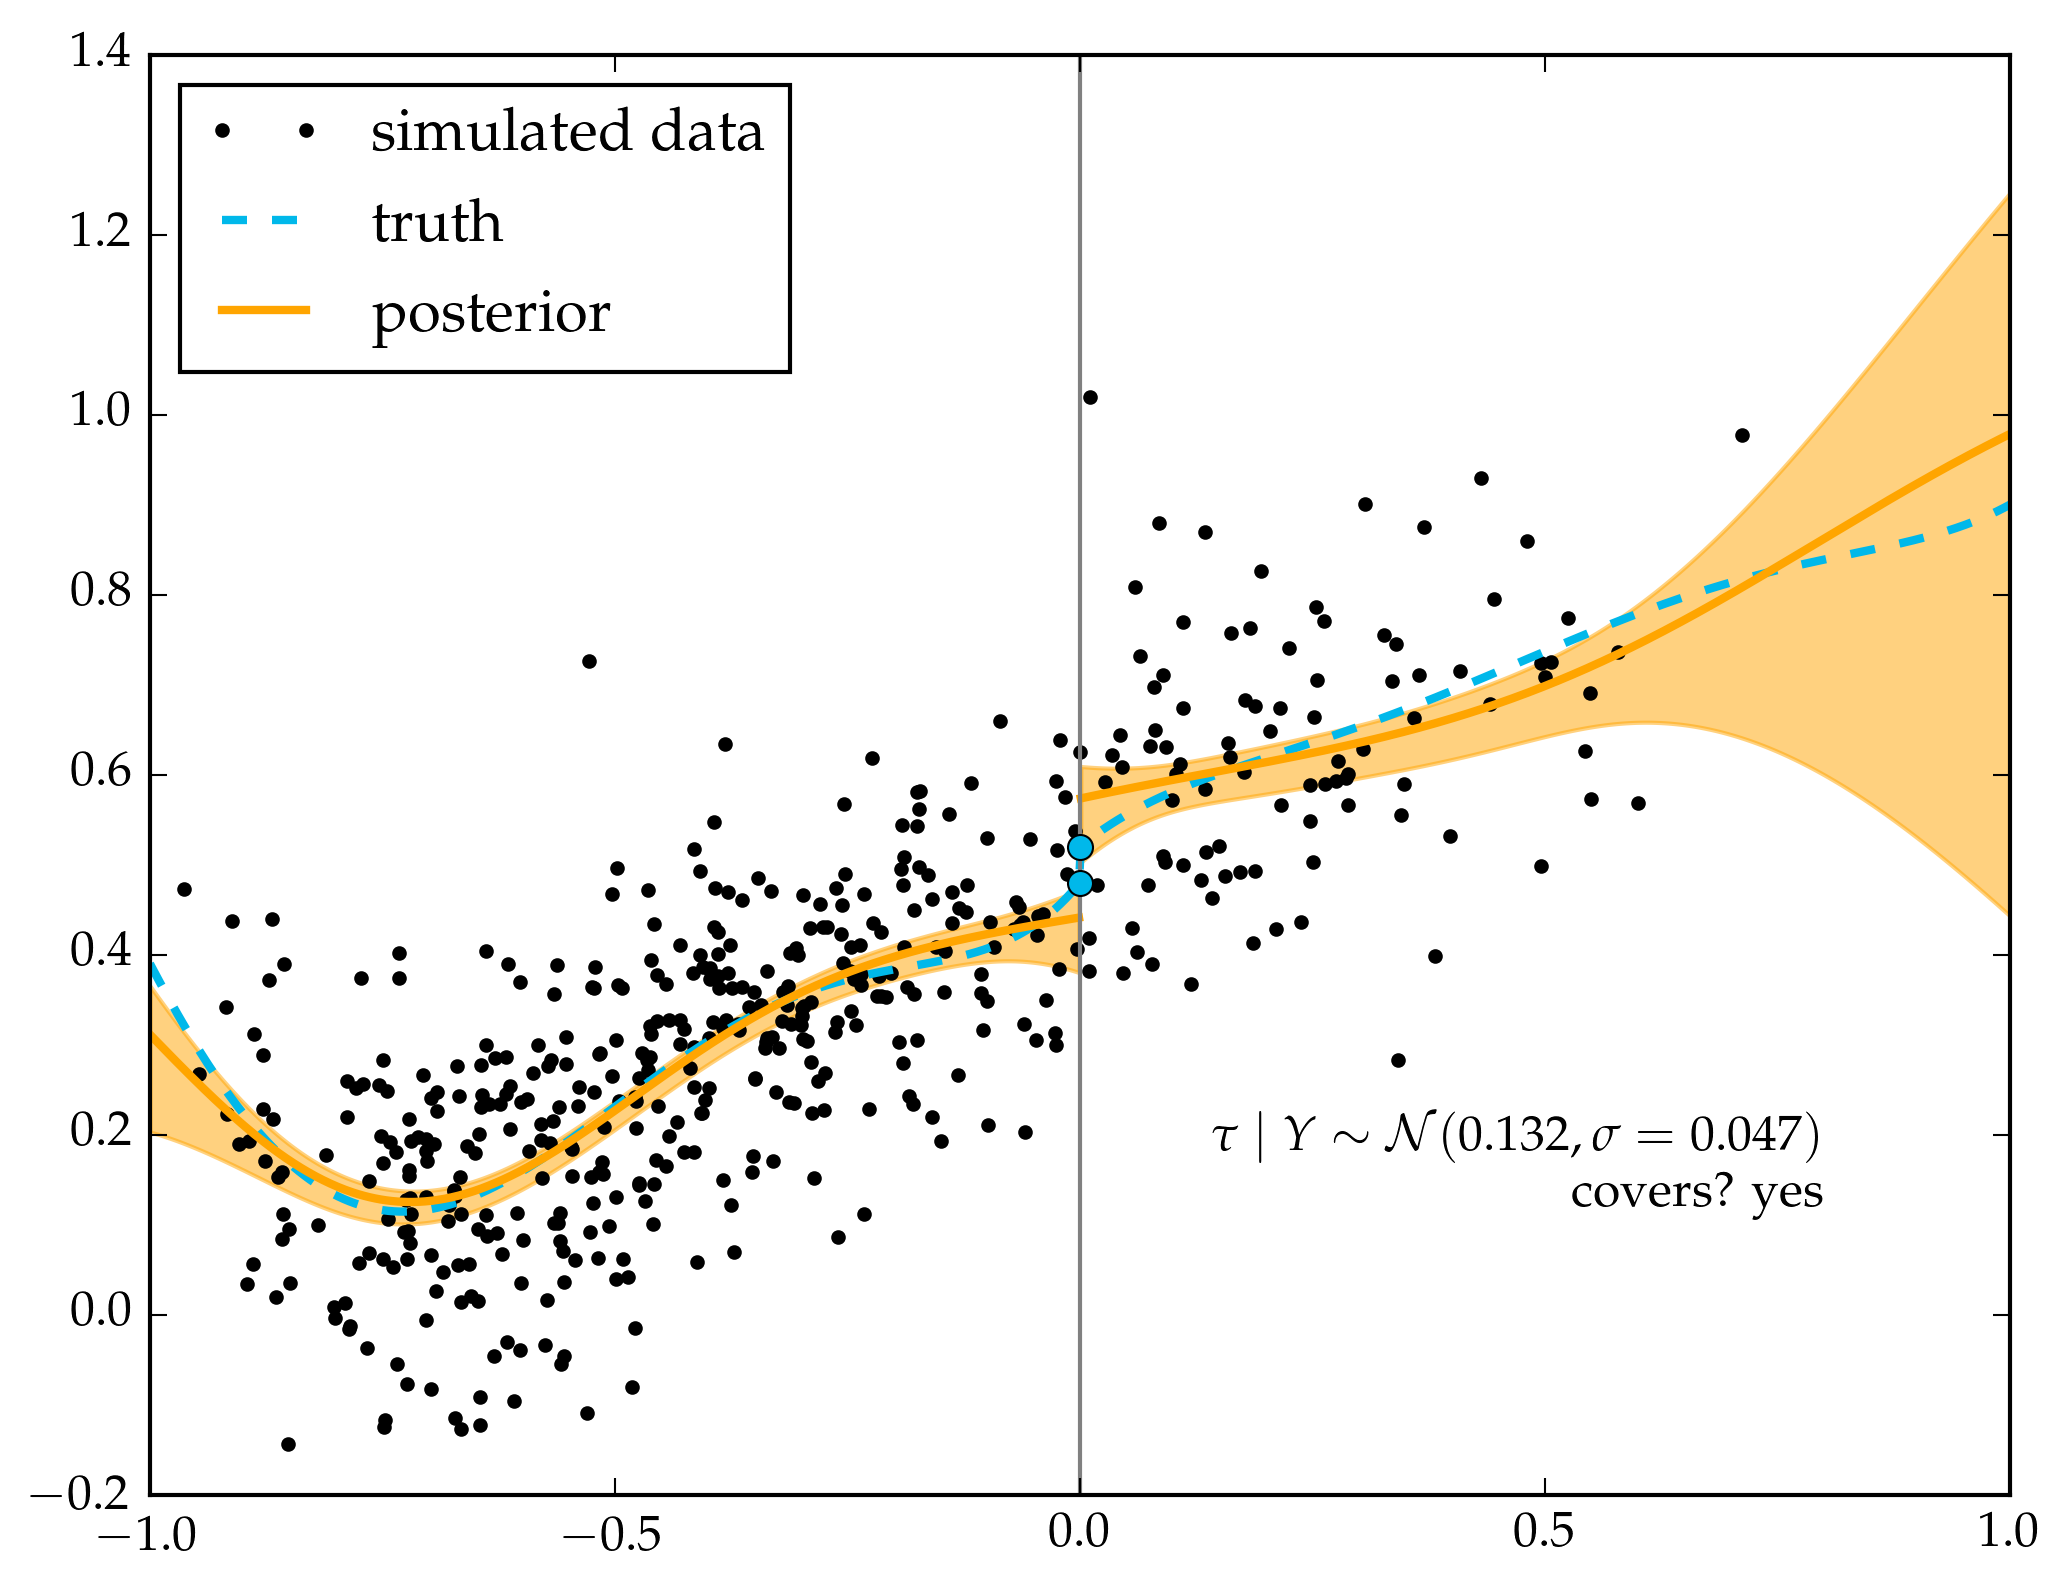

In [66]:
plot_sim("lee", 31, 0.0, :meankern, lee_truth)
;

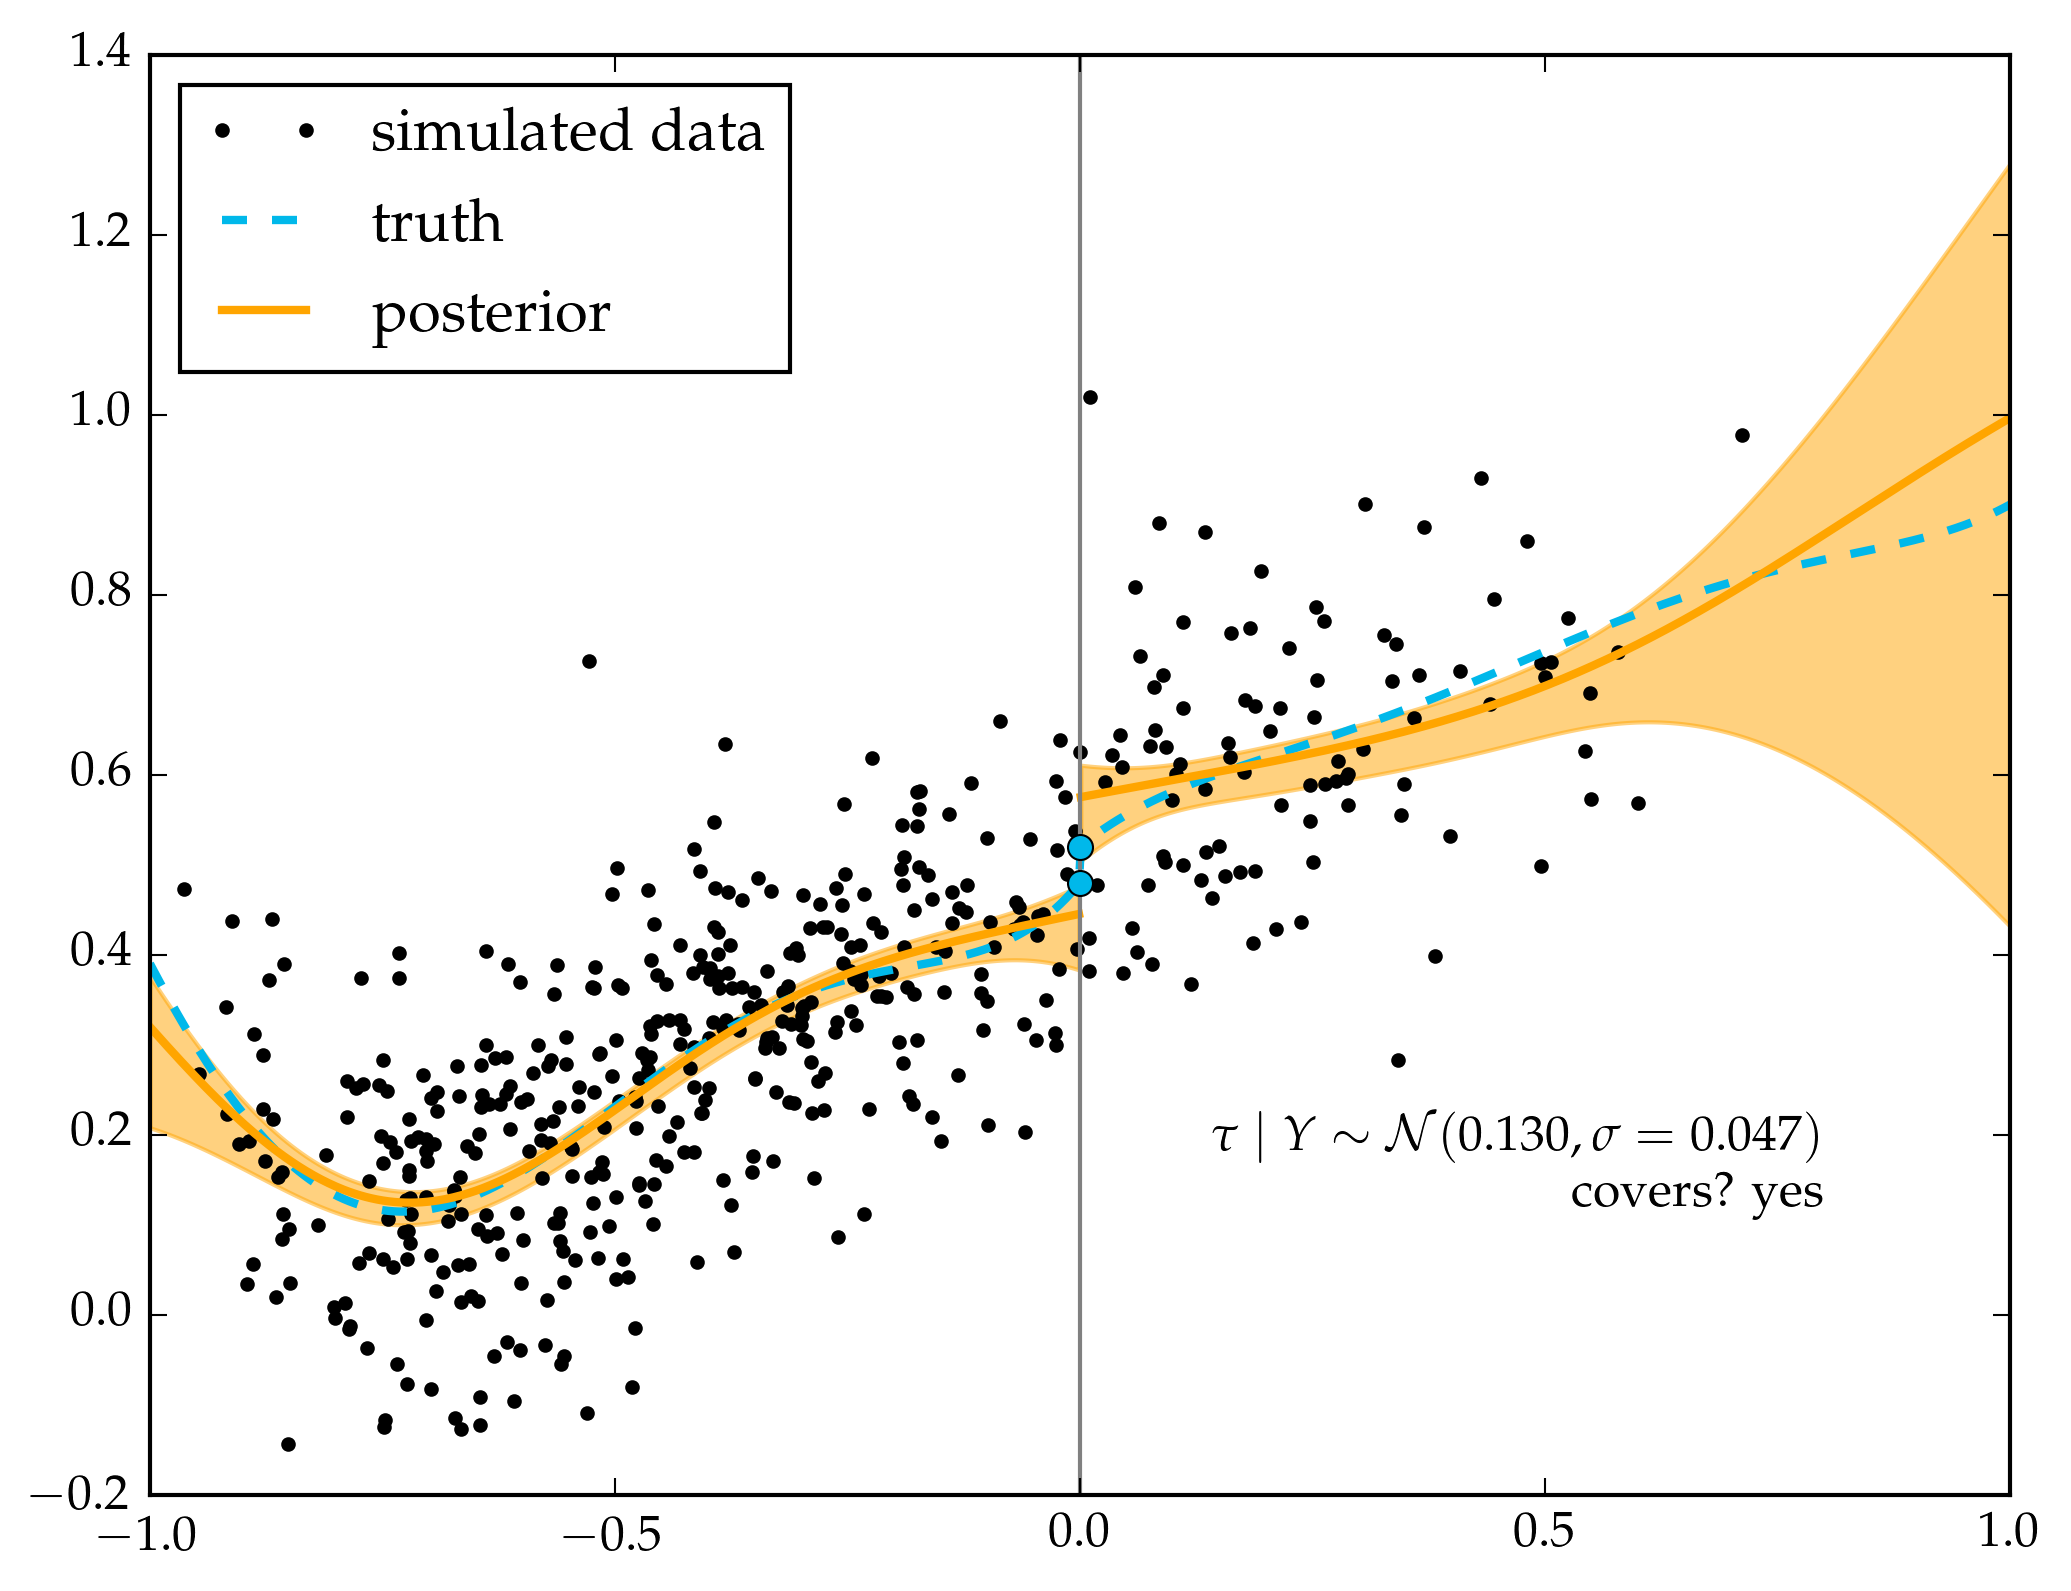

In [67]:
plot_sim("lee", 31, 0.0, :integse, lee_truth)
;

In [76]:
ludwig_right(0)-ludwig_left(0)

-3.35

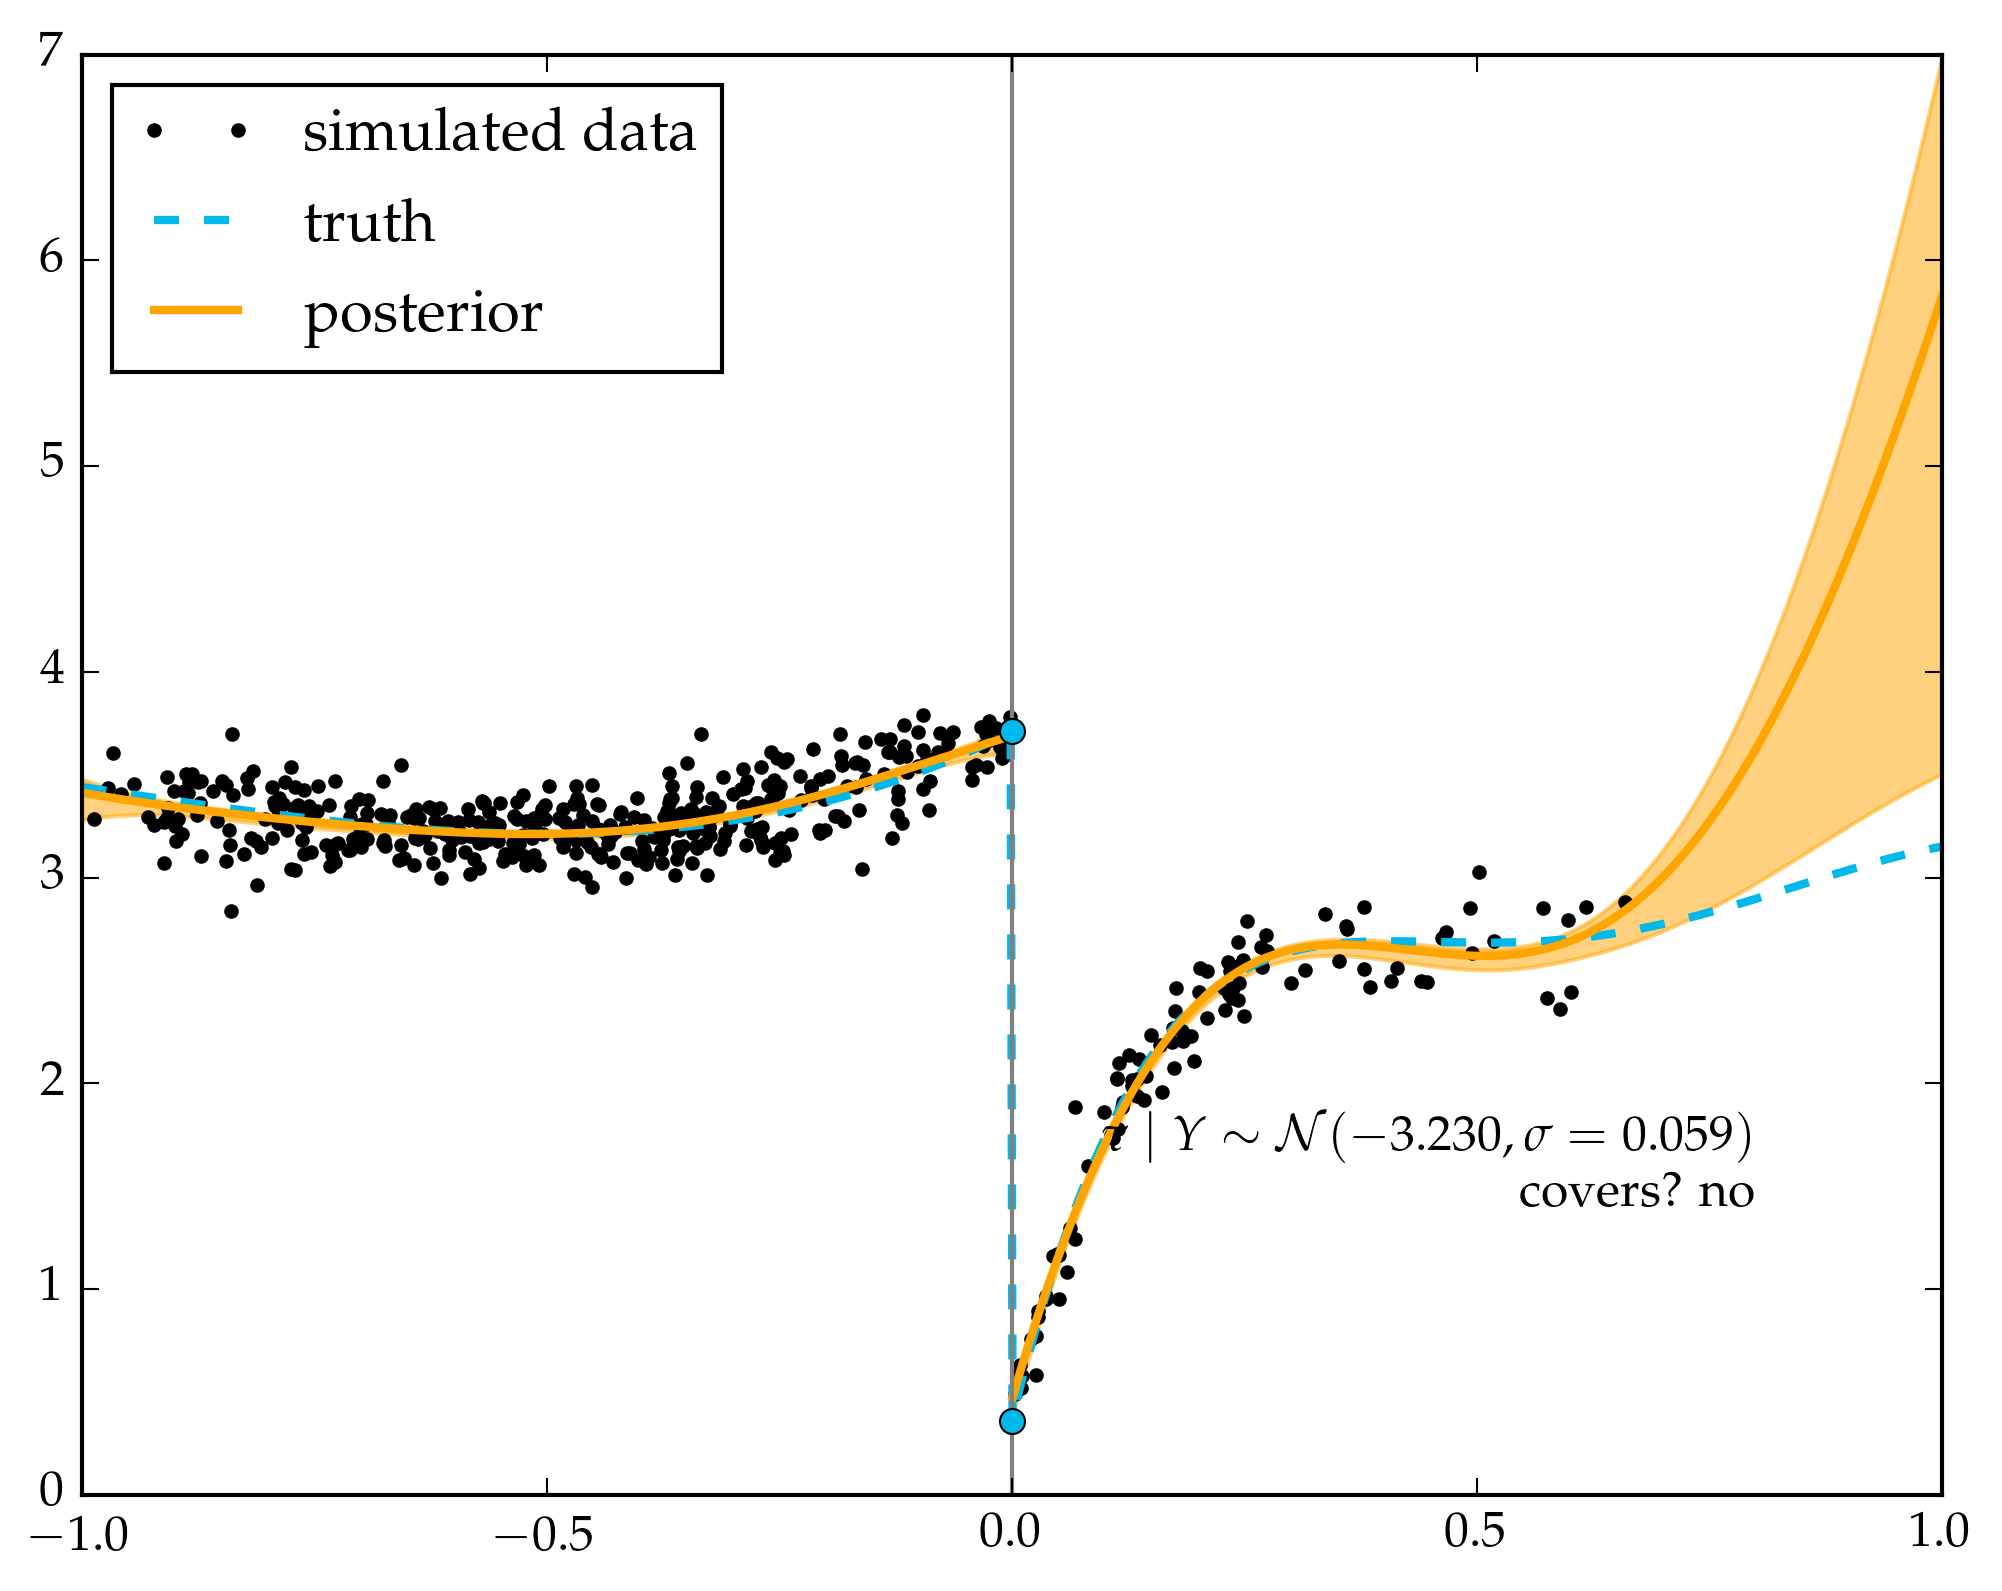

In [90]:
plot_sim("ludwig", 8, 0.0, :meankern, ludwig_truth)
;

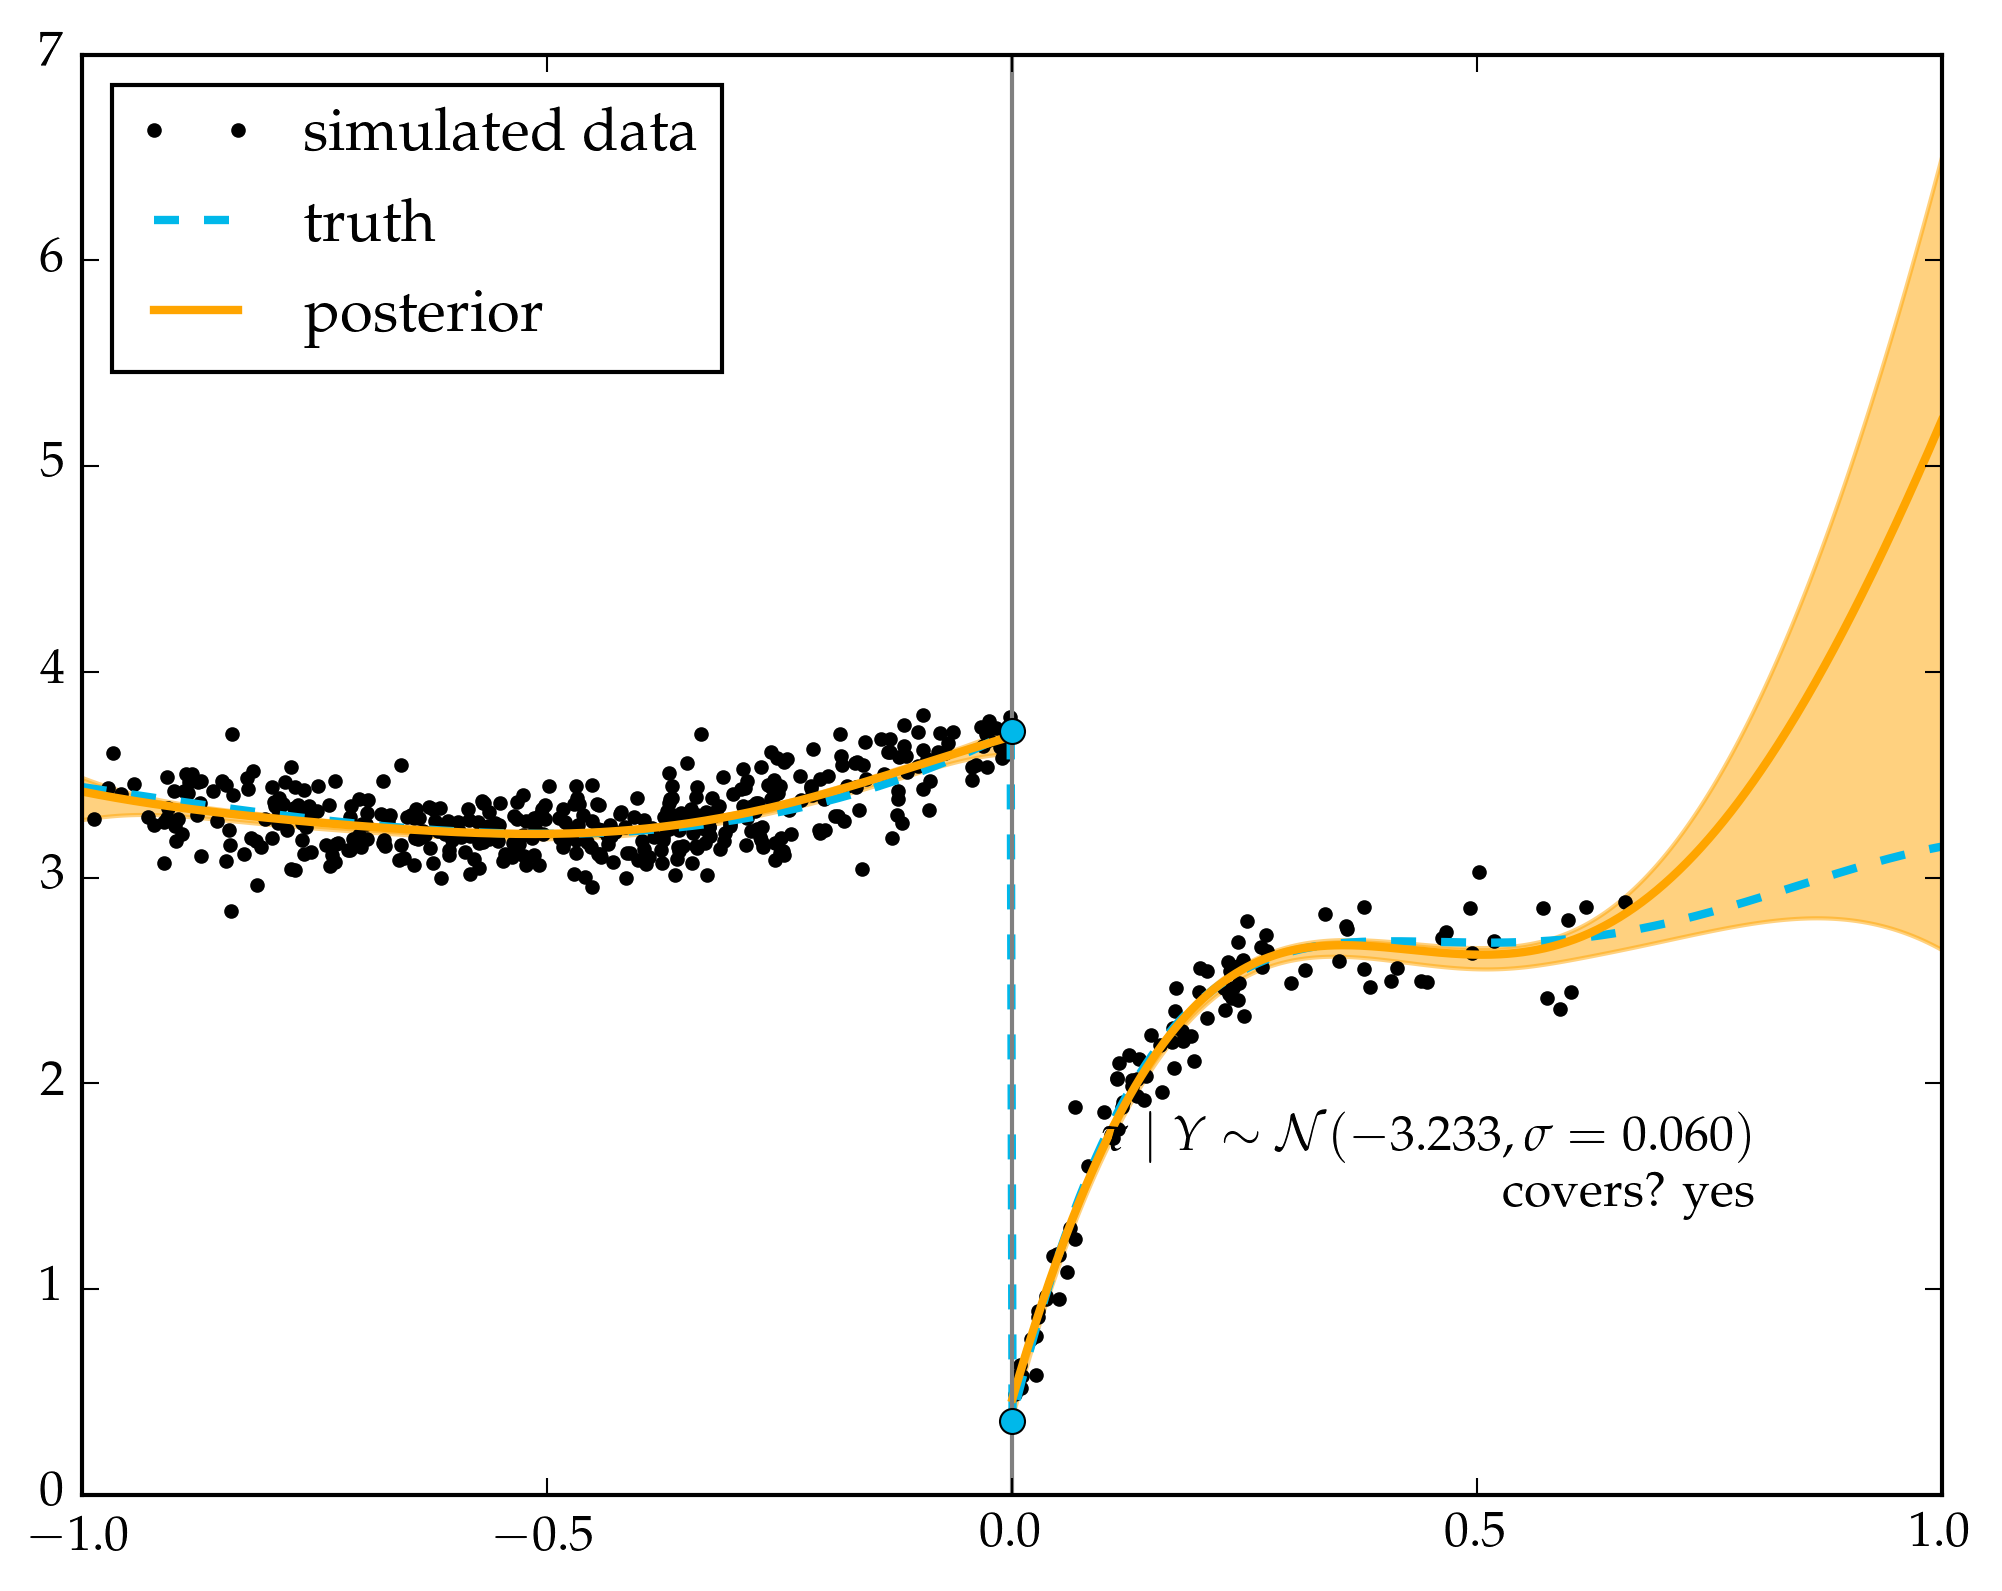

In [91]:
plot_sim("ludwig", 8, 0.0, :integse, ludwig_truth)
;

In [92]:
@time loops_sims("ludwig", 0.0, ludwig_left, ludwig_right, :integse)

10...
20...
30...
40...
50...
60...
70...
80...
90...
100...
110...
120...
130...
140...
150...
160...
170...
180...
190...
in callback catch
200...
210...
220...
230...
240...
250...
260...
270...
280...
290...
300...
310...
320...
330...
340...
350...
360...
370...
380...
390...
400...
410...
420...
430...
440...
450...
460...
470...
480...
490...
500...
510...
520...
in callback catch
530...
540...
in callback catch
550...
560...
570...
580...
590...
600...
610...
620...
630...
640...
650...
660...
670...
in callback catch
680...
in callback catch
690...
700...
710...
720...
730...
740...
750...
760...
770...
in callback catch
780...
790...
800...
810...
820...
830...
840...
850...
860...
870...
880...
890...
900...
910...
920...
930...
940...
950...
960...
970...
in callback catch
980...
990...
1000...
bias=0.0754
RMSE=0.100
73.9% coverage
2818.006760 seconds (92.18 M allocations: 329.735 GB, 1.58% gc time)


In [93]:
@time loops_sims("lee", 0.0, lee_left, lee_right, :integse)

10...
20...
30...
40...
50...
60...
70...
80...
90...
100...
110...
120...
130...
140...
150...
160...
170...
180...
190...
200...
210...
in callback catch
220...
230...
240...
250...
260...
270...
280...
290...
300...
310...
320...
in callback catch
330...
340...
350...
360...
370...
380...
390...
400...
410...
420...
430...
440...
450...
460...
470...
480...
490...
500...
510...
520...
530...
540...
550...
560...
570...
580...
590...
600...
610...
620...
630...
640...
650...
660...
670...
680...
690...
700...
710...
720...
730...
740...
750...
760...
770...
780...
790...
800...
810...
820...
830...
840...
in callback catch
850...
860...
870...
880...
890...
900...
910...
920...
930...
940...
950...
960...
970...
980...
990...
1000...
bias=0.0423
RMSE=0.060
85.5% coverage
3961.675841 seconds (105.31 M allocations: 383.187 GB, 1.31% gc time)
